In [1]:
!ls Fig*

Fig3A_TCGA.png	Fig3C_TCGA.png	    Fig4B_TCGA_CD8.png	  Fig4C_pMMR.png
Fig3B_GSE1.png	Fig4A_GSE1.png	    Fig4C_TCGA_MSI-H.png
Fig3B_TCGA.png	Fig4A_TCGA.png	    Fig4C_TCGA_MSS.png
Fig3C_GSE1.png	Fig4B_GSE1_CD8.png  Fig4C_dMMR.png


## FIGS paper GENS

In [2]:
import firmaIMC_v3 as firmaIMC
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


## Leer datos SET1

In [3]:
#file_SScms_GSE1=pd.read_csv('../Comparacio_Firmes/Comparacio_Rivas_i_GSE17537_v6_cluster/SScms_combat.csv',header=0 , sep=',')
#file_NNet_GSE1=pd.read_csv('../Comparacio_Firmes/Comparacio_Rivas_i_GSE17537_v6_cluster/prediction_NeuralNet_combat.csv',header=0 , sep=',')
#local
file_SScms_GSE1=pd.read_csv('SScms_combat.csv',header=0 , sep=',')
file_NNet_GSE1=pd.read_csv('prediction_NeuralNet_combat.csv',header=0 , sep=',')


print('Shapes: ',file_SScms_GSE1.shape,file_NNet_GSE1.shape)

firmaIMC.Canvia_Nom_NNet_amb_guio(file_NNet_GSE1)   # Canvia els noms a file_NNet
firmaIMC.Check_si_Unamed_son_diferents(file_NNet_GSE1,file_SScms_GSE1)

# Generar dataframe conjunt: CMS i IMC
pd_2Firmas_GSE1 = pd.merge(file_NNet_GSE1, file_SScms_GSE1, on='Unnamed: 0')

#IMC: prediction
#CMS: SSP.predictedCMS
# pd_2Firmas

#pd_gens_GSE1=pd.read_csv("../Comparacio_Firmes/Comparacio_Rivas_i_GSE17537_v6_cluster/input_NeuralNet_combat_MaxVar.csv",skipinitialspace=True)
#local
pd_gens_GSE1=pd.read_csv("GSE1_input_NeuralNet_combat_MaxVar_10gens.csv",skipinitialspace=True)

pd_gens_GSE1_new = pd_gens_GSE1.set_index('Gene.name').transpose()
pd_gens_GSE1_new.index.name = 'Unnamed: 0'      # Per tenir el mateix nom de index per unir

#pd_gens_GSE1_new

selected_gens=['GLS','TGFB1','TWIST1','GOT1','LDHA','GLUL','FAP','ZEB1','ZEB2', 'ENTPD1']
sel_col_firmes=['SSP.predictedCMS','prediction','Cluster_1','Cluster_2','Cluster_3']
pd_2Firmas_GSE1.index=pd_2Firmas_GSE1['Unnamed: 0']
pd_10gens_firmes_GSE1=pd.merge(pd_gens_GSE1_new[selected_gens], pd_2Firmas_GSE1[sel_col_firmes], on='Unnamed: 0')
pd_ALLgens_firmes_GSE1=pd.merge(pd_gens_GSE1_new, pd_2Firmas_GSE1[sel_col_firmes], on='Unnamed: 0')

#pd_10gens_firmes_GSE1

Shapes:  (1328, 15) (1328, 5)
Difefències en Unnamed: 0: []


## Load Characteristics of GSE1

In [4]:
#file_Rivas=pd.read_excel('../Comparacio_Firmes/Comparacio_Rivas_i_GSE17537_v6_cluster/Figures_Paper/12864_2018_5193_MOESM1_ESM.xlsx')
#file_537=pd.read_excel('../Comparacio_Firmes/Comparacio_Rivas_i_GSE17537_v6_cluster/Figures_Paper/Dades_Set_GSE17537.xlsx')
#local
file_Rivas=pd.read_excel('12864_2018_5193_MOESM1_ESM.xlsx')
file_537=pd.read_excel('Dades_Set_GSE17537.xlsx')

/home/smadurga/miniconda3/envs/gsmm/lib/python3.12/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [5]:
file_propietats=pd.concat([file_Rivas,file_537],ignore_index=True)
file_propietats_sorted=file_propietats.sort_values(by=['sampleID_GSM'],ignore_index=True)
#file_propietats_sorted


pd_aux=pd_2Firmas_GSE1.rename(columns={'Unnamed: 0': 'NameCEL'}).sort_values(by=['NameCEL'])
df_props_GSE1= pd.concat([pd_aux.reset_index(drop=True),file_propietats_sorted], axis=1) 

df_props_GSE1

# GLOBAL:
df_allinfo_GSE1=pd.merge(df_props_GSE1,pd_ALLgens_firmes_GSE1)


In [6]:
df_allinfo_GSE1['mmr_status']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
1323    pMMR
1324    pMMR
1325    pMMR
1326    pMMR
1327    pMMR
Name: mmr_status, Length: 1328, dtype: object

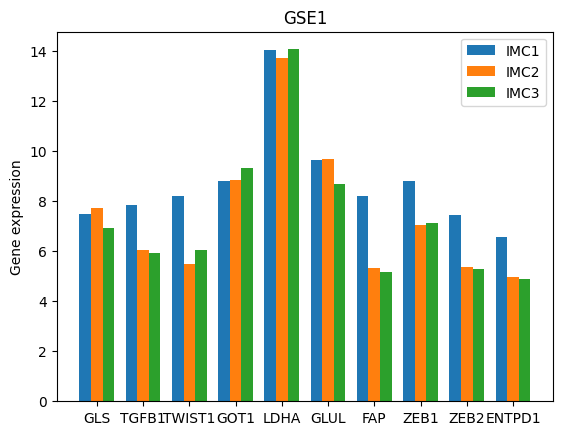

In [7]:
firmaIMC.Plot_gens_IMC(df_allinfo_GSE1,selected_gens,titulo='GSE1')

In [8]:
df_allinfo_GSE1[selected_gens]

GLS     TGFB1     TWIST1       GOT1       LDHA       GLUL  \
0     8.505649  7.323741   5.332268   8.522865  14.121277   9.719537   
1     7.989527  8.785189  10.093812   7.944398  14.068115  10.246917   
2     7.229389  8.245603   7.878940   8.944454  13.957481   8.563576   
3     6.883113  7.419541   6.557552   8.533783  13.450409   9.428052   
4     5.485107  8.389652   7.582071   7.908637  13.690880   8.840789   
...        ...       ...        ...        ...        ...        ...   
1323  5.941078  7.257598   5.852183   9.428009  13.894362   9.408937   
1324  5.240381  7.826467   8.426136   9.009245  14.086360   9.863258   
1325  7.902318  6.181894   7.324801  10.125025  13.970738   8.381842   
1326  6.003001  7.768198   7.553169   7.342055  13.992060   8.113765   
1327  7.695235  7.676570   7.459033   9.020816  13.766852  10.291538   

           FAP       ZEB1      ZEB2    ENTPD1  
0     4.617166   7.441612  6.306018  5.800331  
1     9.822922  10.106705  8.588727  7.744830  
2     6.895914   8.106989  6.809855  6.053665  
3     6.289734   7.694581  7.186461  5.349295  
4     7.641021   7.788288  6.718646  6.330050  
...        ...        ...       ...       ...  
1323  6.363330   6.364109  4.984567  4.685465  
1324  6.747697   6.300064  4.530567  5.667736  
1325  5.903440   7.715283  7.305930  5.991066  
1326  7.951761   9.438947  8.315412  6.131666  
1327  6.605386   7.969559  8.228077  6.941743  

[1328 rows x 10 columns]

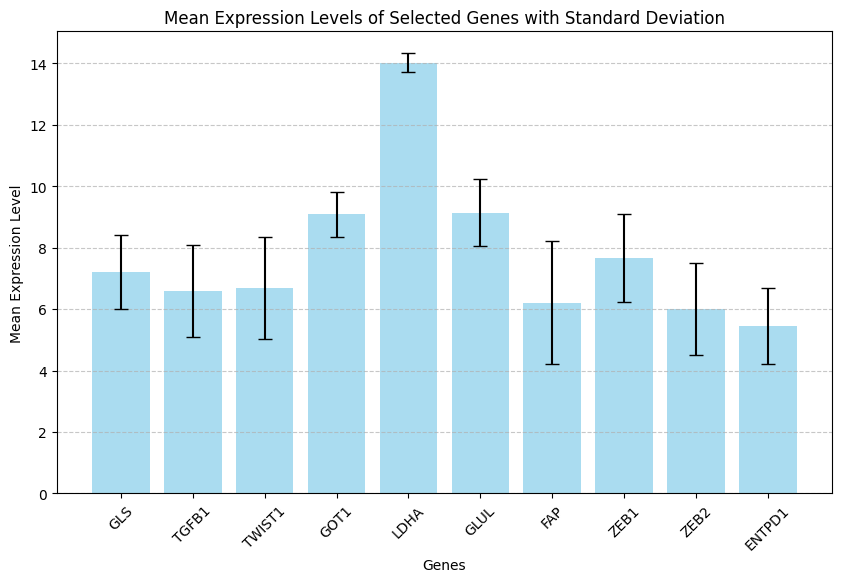

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming df_allinfo_GSE1 is your DataFrame and selected_gens is the list of genes
selected_gens = ['GLS', 'TGFB1', 'TWIST1', 'GOT1', 'LDHA', 'GLUL', 'FAP', 'ZEB1', 'ZEB2', 'ENTPD1']

# Calculate mean and standard deviation for each gene
means = df_allinfo_GSE1[selected_gens].mean()
stds = df_allinfo_GSE1[selected_gens].std()

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(selected_gens, means, yerr=stds, capsize=5, color='skyblue', alpha=0.7)
plt.xlabel('Genes')
plt.ylabel('Mean Expression Level')
plt.title('Mean Expression Levels of Selected Genes with Standard Deviation')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [10]:
cluster1=df_allinfo_GSE1[df_allinfo_GSE1['prediction']=='Cluster_1']
cluster2=df_allinfo_GSE1[df_allinfo_GSE1['prediction']=='Cluster_2']
cluster3=df_allinfo_GSE1[df_allinfo_GSE1['prediction']=='Cluster_3']

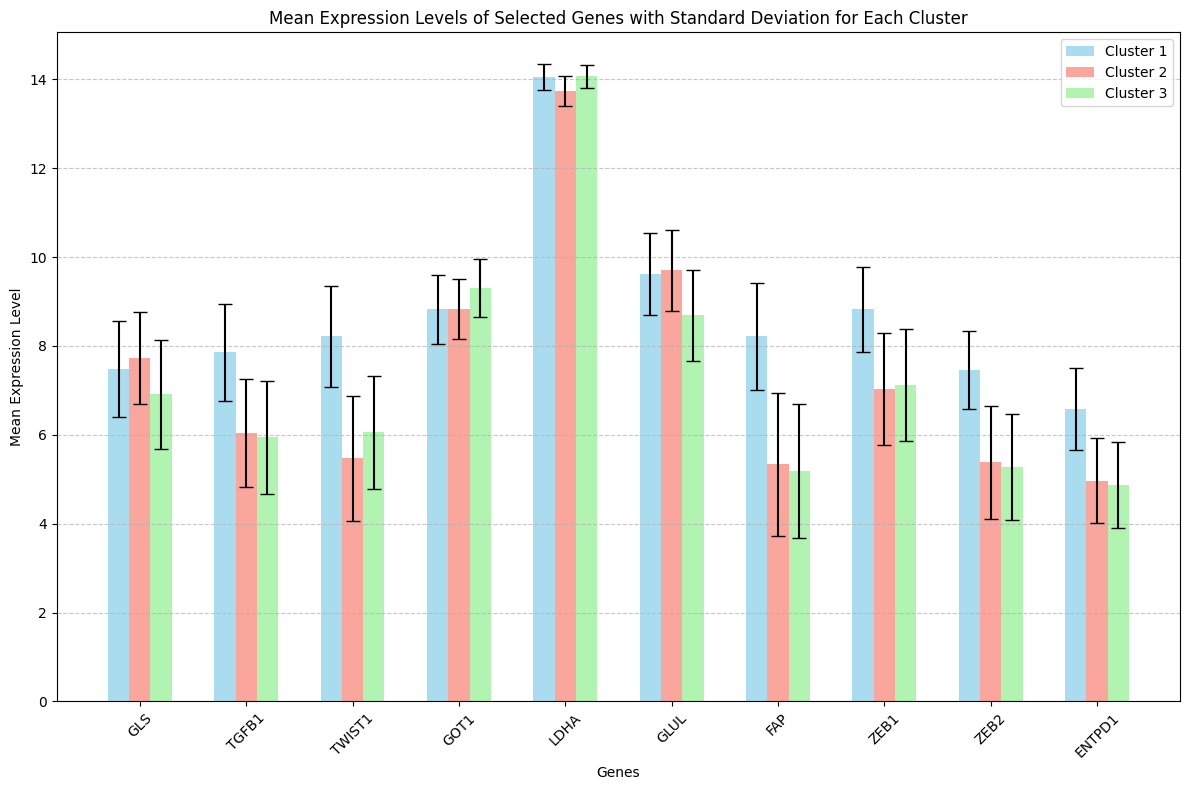

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming df_allinfo_GSE1 is your DataFrame and selected_gens is the list of genes
selected_gens = ['GLS', 'TGFB1', 'TWIST1', 'GOT1', 'LDHA', 'GLUL', 'FAP', 'ZEB1', 'ZEB2', 'ENTPD1']

# Assuming 'prediction' is the column indicating cluster membership
cluster1 = df_allinfo_GSE1[df_allinfo_GSE1['prediction'] == 'Cluster_1']
cluster2 = df_allinfo_GSE1[df_allinfo_GSE1['prediction'] == 'Cluster_2']
cluster3 = df_allinfo_GSE1[df_allinfo_GSE1['prediction'] == 'Cluster_3']

# Calculate mean and standard deviation for each cluster
means_cluster1 = cluster1[selected_gens].mean()
stds_cluster1 = cluster1[selected_gens].std()

means_cluster2 = cluster2[selected_gens].mean()
stds_cluster2 = cluster2[selected_gens].std()

means_cluster3 = cluster3[selected_gens].mean()
stds_cluster3 = cluster3[selected_gens].std()

# Plotting
plt.figure(figsize=(12, 8))

# Plot cluster 1
plt.bar(np.arange(len(selected_gens)) - 0.2, means_cluster1, yerr=stds_cluster1, capsize=5, width=0.2, label='Cluster 1', color='skyblue', alpha=0.7)

# Plot cluster 2
plt.bar(np.arange(len(selected_gens)), means_cluster2, yerr=stds_cluster2, capsize=5, width=0.2, label='Cluster 2', color='salmon', alpha=0.7)

# Plot cluster 3
plt.bar(np.arange(len(selected_gens)) + 0.2, means_cluster3, yerr=stds_cluster3, capsize=5, width=0.2, label='Cluster 3', color='lightgreen', alpha=0.7)

plt.xlabel('Genes')
plt.ylabel('Mean Expression Level')
plt.title('Mean Expression Levels of Selected Genes with Standard Deviation for Each Cluster')
plt.xticks(np.arange(len(selected_gens)), selected_gens, rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Figures dels gens

### Fig3C GSE1

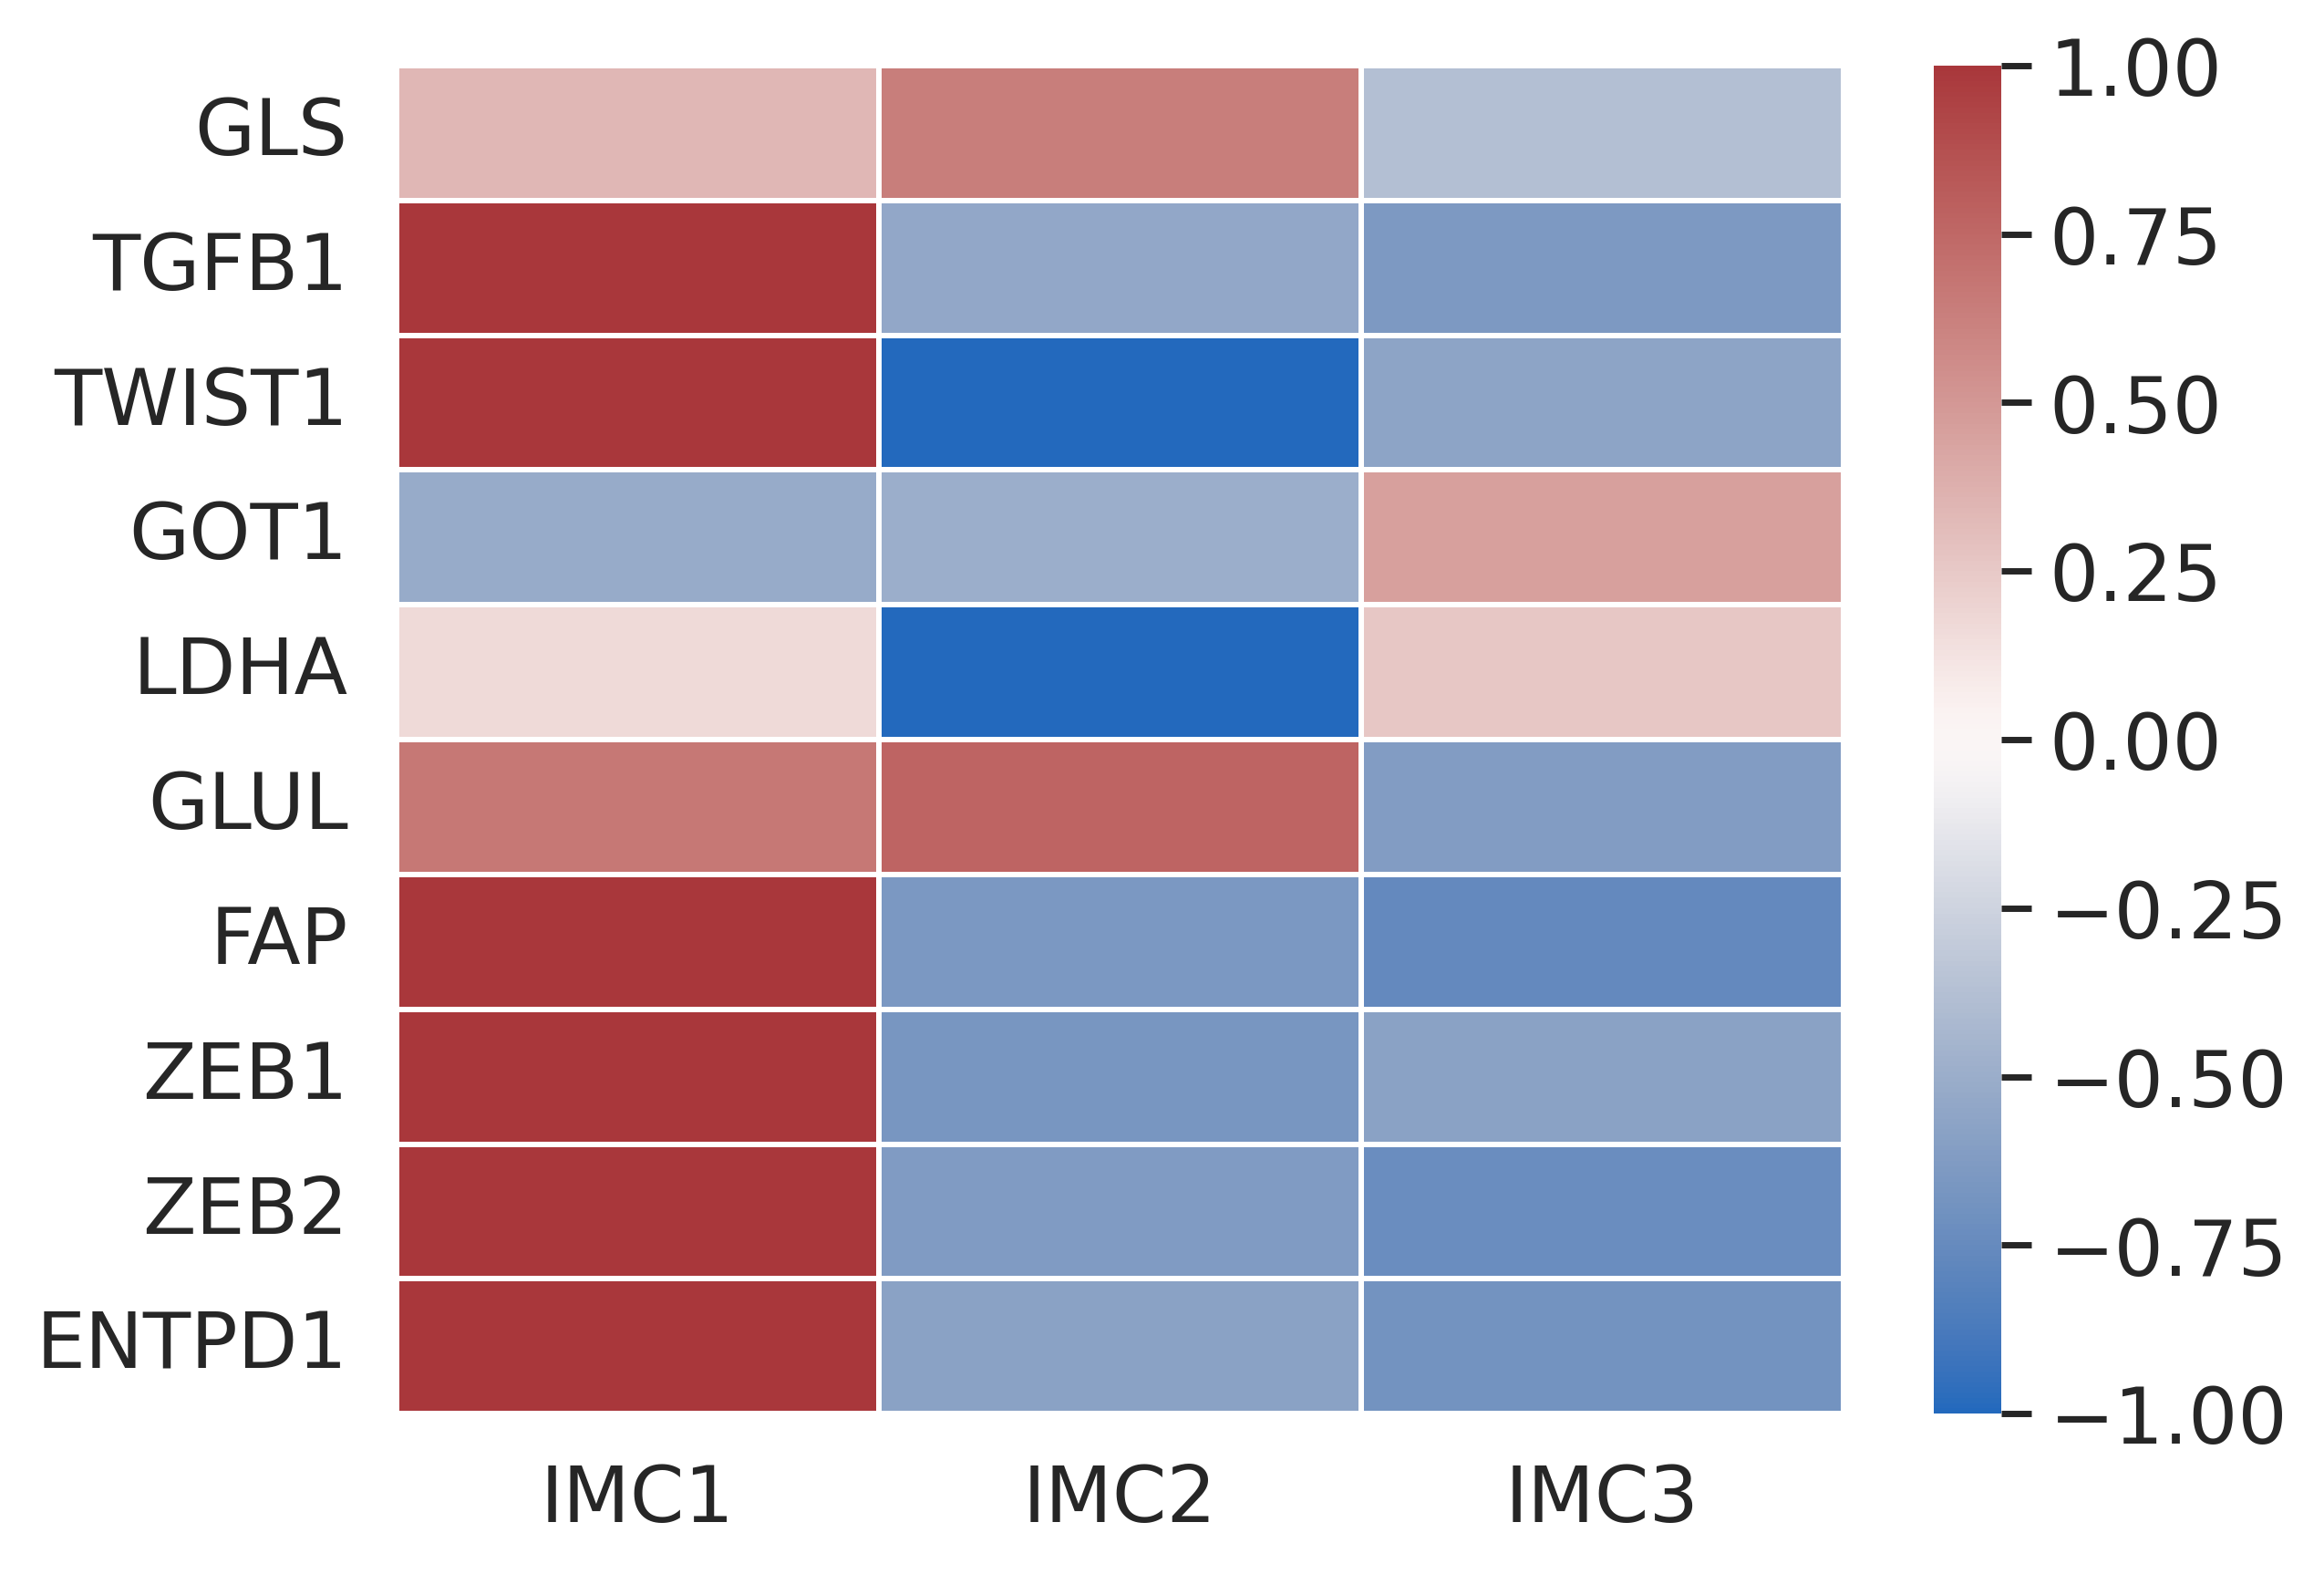

IMC1      IMC2      IMC3
GLS     0.224077  0.426696 -0.250798
TGFB1   0.850116 -0.360251 -0.430090
TWIST1  0.925532 -0.730003 -0.379251
GOT1   -0.348033 -0.332401  0.302506
LDHA    0.113554 -0.937017  0.176736
GLUL    0.447555  0.515406 -0.412180
FAP     1.006078 -0.433069 -0.507222
ZEB1    0.815539 -0.444508 -0.386539
ZEB2    0.962564 -0.417763 -0.484382
ENTPD1  0.911077 -0.388982 -0.460169

In [12]:
#firmaIMC.Plot_HeatMap_IMC(df_allinfo_GSE1,selected_gens)
firmaIMC.Plot_HeatMap_IMC(df_allinfo_GSE1,selected_gens,titulo="",factorAug=1.5,nom_figure='Fig3C_GSE1.png',typeFig='Size')


In [13]:
print(np.sum(df_allinfo_GSE1['prediction']=='Cluster_1'))
print(np.sum(df_allinfo_GSE1['prediction']=='Cluster_2'))
print(np.sum(df_allinfo_GSE1['prediction']=='Cluster_3'))


436
186
706


In [14]:
pd_ANOVA_Fig3C_GSE1=firmaIMC.Tukey_HeadMap_IMC(df_allinfo_GSE1,selected_gens)
print('ANOVA_PATHWAYS')
taula=firmaIMC.print_ANOVA2(pd_ANOVA_Fig3C_GSE1)
taula.to_excel("Anova_Fig3C_GSE1.xlsx",sheet_name='Fig3C_GSE1') 
taula

#Gen:  GLS
F_onewayResult(statistic=np.float64(54.0890890748795), pvalue=np.float64(2.6250981130290098e-23))
   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1    group2  meandiff p-adj   lower   upper  reject
----------------------------------------------------------
Cluster_1 Cluster_2   0.2445 0.0431  0.0059  0.4831   True
Cluster_1 Cluster_3   -0.573    0.0 -0.7389 -0.4071   True
Cluster_2 Cluster_3  -0.8175    0.0  -1.042  -0.593   True
----------------------------------------------------------
Valor medio del cluster_1: 0.22407733456589754
#Gen:  TGFB1
F_onewayResult(statistic=np.float64(363.1272347466213), pvalue=np.float64(1.799176931837586e-126))
   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1    group2  meandiff p-adj   lower   upper  reject
----------------------------------------------------------
Cluster_1 Cluster_2  -1.8086    0.0 -2.0555 -1.5616   True
Cluster_1 Cluster_3  -1.9129    0.0 -2.0847 -1.7412   True
Cluster_2 Cluster_3  -0.

/home/smadurga/RecercaGit/IMMETCOLS_GSE1_GSE2_TCGA/FIGURES_IMMETCOLS_Bioinformatics/firmaIMC_v3.py:416: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pd_Tabla['IMC1']=[pd_ANOVA.loc[0][i] for i in range(num_gens)]
/home/smadurga/RecercaGit/IMMETCOLS_GSE1_GSE2_TCGA/FIGURES_IMMETCOLS_Bioinformatics/firmaIMC_v3.py:417: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pd_Tabla['IMC2']=[pd_ANOVA.loc[1][i] for i in range(num_gens)]
/home/smadurga/RecercaGit/IMMETCOLS_GSE1_GSE2_TCGA/FIGURES_IMMETCOLS_Bioinformatics/firmaIMC_v3.py:418: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future versio

GeneName      IMC1      IMC2      IMC3  F_oneway       P_oneway  p-Tukey12  \
0      GLS  0.224077  0.426696 -0.250798    54.089   2.625098e-23      0.043   
1    TGFB1  0.850116 -0.360251 -0.430090   363.127  1.799177e-126      0.000   
2   TWIST1  0.925532 -0.730003 -0.379251   505.242  8.286791e-164      0.000   
3     GOT1 -0.348033 -0.332401  0.302506    76.873   2.592062e-32      0.981   
4     LDHA  0.113554 -0.937017  0.176736   111.377   1.952634e-45      0.000   
5     GLUL  0.447555  0.515406 -0.412180   158.884   1.409012e-62      0.664   
6      FAP  1.006078 -0.433069 -0.507222   651.284  1.031435e-197      0.000   
7     ZEB1  0.815539 -0.444508 -0.386539   320.020  4.068803e-114      0.000   
8     ZEB2  0.962564 -0.417763 -0.484382   550.229  1.102105e-174      0.000   
9   ENTPD1  0.911077 -0.388982 -0.460169   453.935  7.015138e-151      0.000   

   p-Tukey13  p-Tukey23  compara1  compara2  compara3  
0      0.000      0.000         1         1         1  
1      0.000      0.543         1         0         0  
2      0.000      0.000         1         1         1  
3      0.000      0.000         0         0         1  
4      0.502      0.000         0         1         0  
5      0.000      0.000         0         0         1  
6      0.000      0.415         1         0         0  
7      0.000      0.668         1         0         0  
8      0.000      0.519         1         0         0  
9      0.000      0.502         1         0         0

In [15]:
#firmaIMC.Plot_HeatMap_IMC(df_allinfo_GSE1,selected_gens_Frontiers_GSE1,titulo="",factorAug=1.5,nom_figure='Fig3B_GSE1-ComFrontiers.png',typeFig='Size20')

In [16]:
#Inicial
#selected_gens_fig3=['SLC2A1', 'SLC2A3', 'SLC16A1', 'SLC16A3', 'HK1', 'PGM1', 'PGM2', 'PFKFB3', 'LDHA', 'GFPT2', 'SLC38A1', 'SLC38A2', 
#                     'SLC38A5', 'BCAT1','SLC38A3', 'GLS', 'GLUL', 'SLC5A12', 'SLC13A2', 'SLC27A6',
#                     'HK2', 'PFKM', 'PFKP', 'PFKL', 'G6PD', 'SLC3A2', 'PC', 'IDH2', 'SLC1A5', 'SLC7A5', 'SLC25A1', 'SLC25A22', 'SLC25A18', 'SLC25A13', 'SLC25A11', 
#                     'GOT1', 'NDUFV1', 'NDUFS3', 'NDUFS4', 'NDUFA8', 'NDUFA9', 'CDK1', 'CDK4', 'CCNA2', 'CCNB1', 'CCNB2', 'PLK1'
#                    # els de autofagia:
#                   ,'ULK1','ATG14','NBR1','BECN1','ATG7','ATG5','RUBCN'
#                   ]

In [17]:
selected_gens_fig3=[ 'HK1', 'HK3', 'PFKFB3', 'SLC2A3', 'SLC16A3',    # No està PKM
                    'ALDH1A3','HDAC9','SLC38A2','SLC38A6','GFPT2',  # No està 'POGLUT2','POGLUT3',
                    'ST3GAL1','ST3GAL5',    # Eliminats: 'ST3GAL6','ST8SIA1','ST8SIA4',
                    'BCAT1', 'COL1A1','COL1A2', 'COL5A1','COL5A2','COL6A3', 'LOX',
                    # IMC2
                    'SLC1A5','GLUL', 'GLS','ACSL6', 'PHYH', 'AMACR',  # Eliminats: 'HADHA','ELOVL2',
                    'ALDH3A2','PEX5',  'NBR1','TAX1BP1', 
                    'LAMP1','LAMP2','LMBR1',
                    #IMC3
                    'NDUFA1','NDUFA2', 'NDUFA3', 'NDUFB1','NDUFB2', 'NDUFB3', 
                    'SDHA','SDHB', 'CYC1', 'UQCRB','UQCRC1', 'COX10',
                    'GOT1','GOT2', 'IDH1','IDH2',   # No está 'IDH3',
                    'SHMT2','MTHFD1',    # Eliminat: 'DHFR',
                    'SLC5A1','HK2','PFKL', 'TKT', 'PLK1', 'G6PD',
                    'CCNA2', 'CCNB1', 'CCNB2','CCNE1', 'CDK1'
                   ]

In [18]:
for gen in df_allinfo_GSE1.keys():
    if 'COX10' in gen:
        print(gen)

COX10
COX10-DT


In [19]:
#for gen in df_allinfo_TCGA.keys():
#    if 'COX10' in gen:
#        print(gen)

### Fig3B GSE1

<Figure size 2560x1920 with 0 Axes>

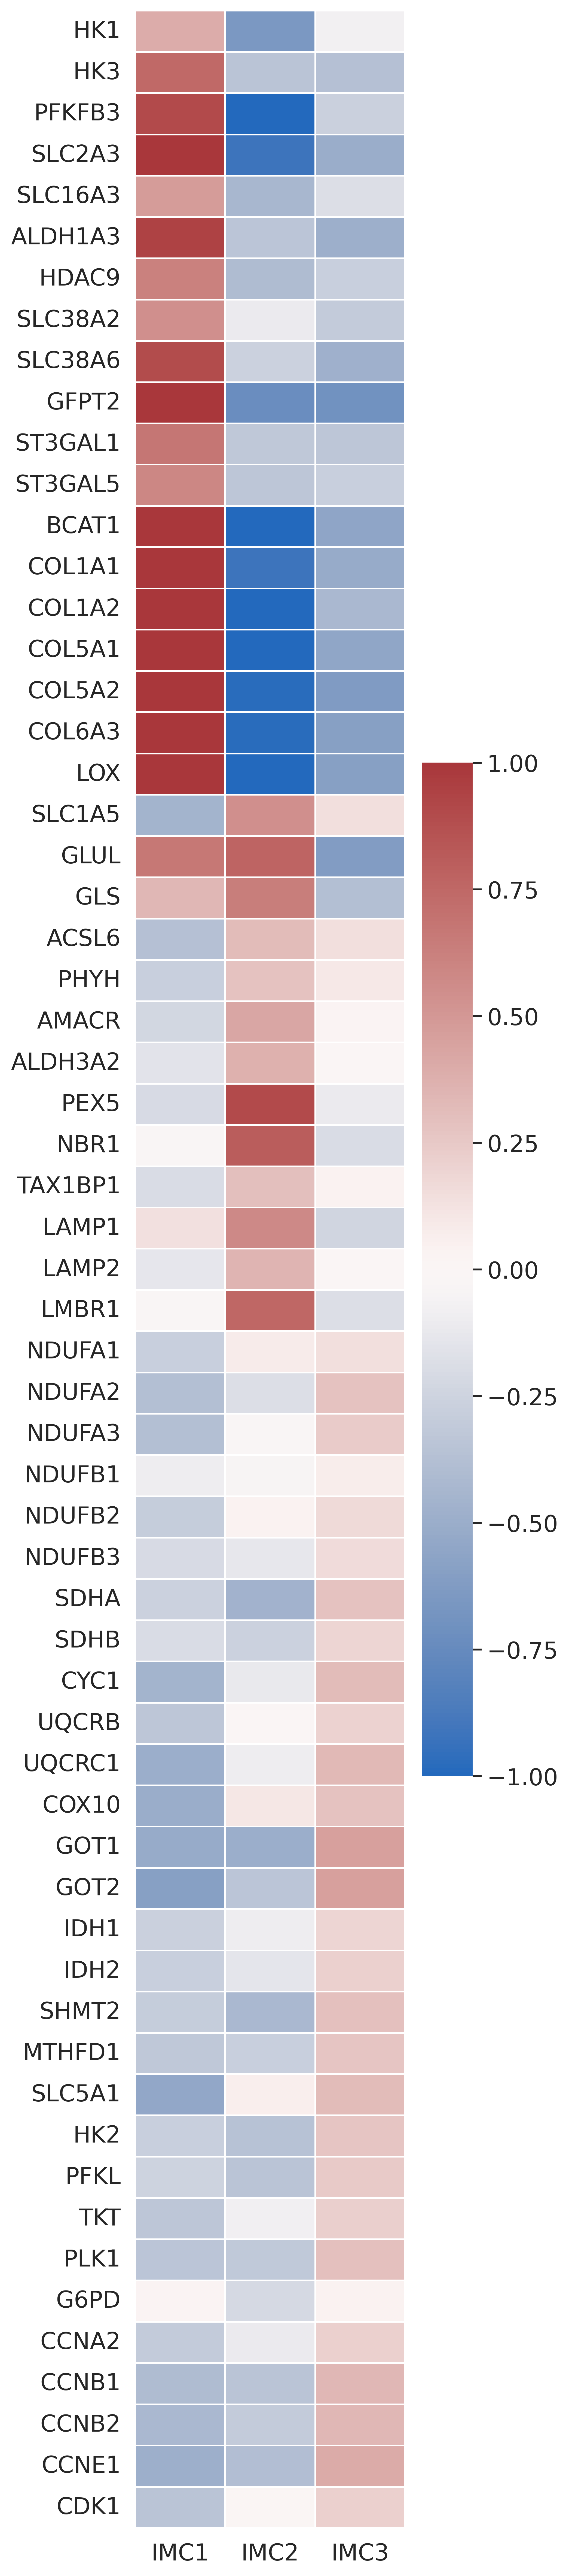

IMC1      IMC2      IMC3
HK1      0.265213 -0.435788 -0.048975
HK3      0.496174 -0.233429 -0.244921
PFKFB3   0.604061 -0.743001 -0.177298
SLC2A3   0.806287 -0.612034 -0.336689
SLC16A3  0.321266 -0.290044 -0.121988
...           ...       ...       ...
CCNA2   -0.198392 -0.076901  0.142779
CCNB1   -0.270330 -0.231215  0.227861
CCNB2   -0.284886 -0.198275  0.228172
CCNE1   -0.323138 -0.255686  0.266921
CDK1    -0.229752  0.003424  0.140984

[61 rows x 3 columns]

In [20]:
firmaIMC.Plot_HeatMap_IMC(df_allinfo_GSE1,selected_gens_fig3,titulo="",factorAug=1.5,nom_figure='Fig3B_GSE1.png',typeFig='Size20')

In [21]:
pd_ANOVA_Fig3B_GSE1=firmaIMC.Tukey_HeadMap_IMC(df_allinfo_GSE1,selected_gens_fig3)
print('ANOVA_PATHWAYS')
taula=firmaIMC.print_ANOVA2(pd_ANOVA_Fig3B_GSE1)
taula.to_excel("Anova_Fig3B_GSE1.xlsx",sheet_name='Fig3B_GSE1') 
taula

#Gen:  HK1
F_onewayResult(statistic=np.float64(35.607308924018234), pvalue=np.float64(8.653657669478403e-16))
   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
  group1    group2  meandiff p-adj  lower   upper  reject
---------------------------------------------------------
Cluster_1 Cluster_2  -0.4033   0.0 -0.5185  -0.288   True
Cluster_1 Cluster_3  -0.1807   0.0 -0.2609 -0.1006   True
Cluster_2 Cluster_3   0.2225   0.0  0.1141   0.331   True
---------------------------------------------------------
Valor medio del cluster_1: 0.2652131769910745
#Gen:  HK3
F_onewayResult(statistic=np.float64(90.71722716937114), pvalue=np.float64(1.1912017200183802e-37))
   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1    group2  meandiff p-adj   lower   upper  reject
----------------------------------------------------------
Cluster_1 Cluster_2  -0.4924    0.0 -0.6226 -0.3623   True
Cluster_1 Cluster_3  -0.5002    0.0 -0.5907 -0.4097   True
Cluster_2 Cluster_3  -0.0078 0.98

/home/smadurga/RecercaGit/IMMETCOLS_GSE1_GSE2_TCGA/FIGURES_IMMETCOLS_Bioinformatics/firmaIMC_v3.py:416: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pd_Tabla['IMC1']=[pd_ANOVA.loc[0][i] for i in range(num_gens)]
/home/smadurga/RecercaGit/IMMETCOLS_GSE1_GSE2_TCGA/FIGURES_IMMETCOLS_Bioinformatics/firmaIMC_v3.py:417: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pd_Tabla['IMC2']=[pd_ANOVA.loc[1][i] for i in range(num_gens)]
/home/smadurga/RecercaGit/IMMETCOLS_GSE1_GSE2_TCGA/FIGURES_IMMETCOLS_Bioinformatics/firmaIMC_v3.py:418: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future versio

GeneName      IMC1      IMC2      IMC3  F_oneway       P_oneway  p-Tukey12  \
0       HK1  0.265213 -0.435788 -0.048975    35.607   8.653658e-16      0.000   
1       HK3  0.496174 -0.233429 -0.244921    90.717   1.191202e-37      0.000   
2    PFKFB3  0.604061 -0.743001 -0.177298   180.366   5.257118e-70      0.000   
3    SLC2A3  0.806287 -0.612034 -0.336689   321.038  2.049117e-114      0.000   
4   SLC16A3  0.321266 -0.290044 -0.121988    37.536   1.391265e-16      0.000   
..      ...       ...       ...       ...       ...            ...        ...   
56    CCNA2 -0.198392 -0.076901  0.142779    16.713   6.785789e-08      0.339   
57    CCNB1 -0.270330 -0.231215  0.227861    41.633   2.912469e-18      0.890   
58    CCNB2 -0.284886 -0.198275  0.228172    42.193   1.719847e-18      0.565   
59    CCNE1 -0.323138 -0.255686  0.266921    58.688   3.790576e-25      0.701   
60     CDK1 -0.229752  0.003424  0.140984    19.028   7.121933e-09      0.019   

    p-Tukey13  p-Tukey23  compara1  compara2  compara3  
0         0.0      0.000         1         1         1  
1         0.0      0.988         1         0         0  
2         0.0      0.000         1         1         1  
3         0.0      0.000         1         1         1  
4         0.0      0.091         1         0         0  
..        ...        ...       ...       ...       ...  
56        0.0      0.019         0         0         1  
57        0.0      0.000         0         0         1  
58        0.0      0.000         0         0         1  
59        0.0      0.000         0         0         1  
60        0.0      0.209         1         0         0  

[61 rows x 12 columns]

### Analisi gens Autofagia

In [22]:
gens_autofagia=['ATG16L1', 'ATG5', 'ATG7', 'ULK1', 'ATG14', 'NBR1', 'RUBCN']

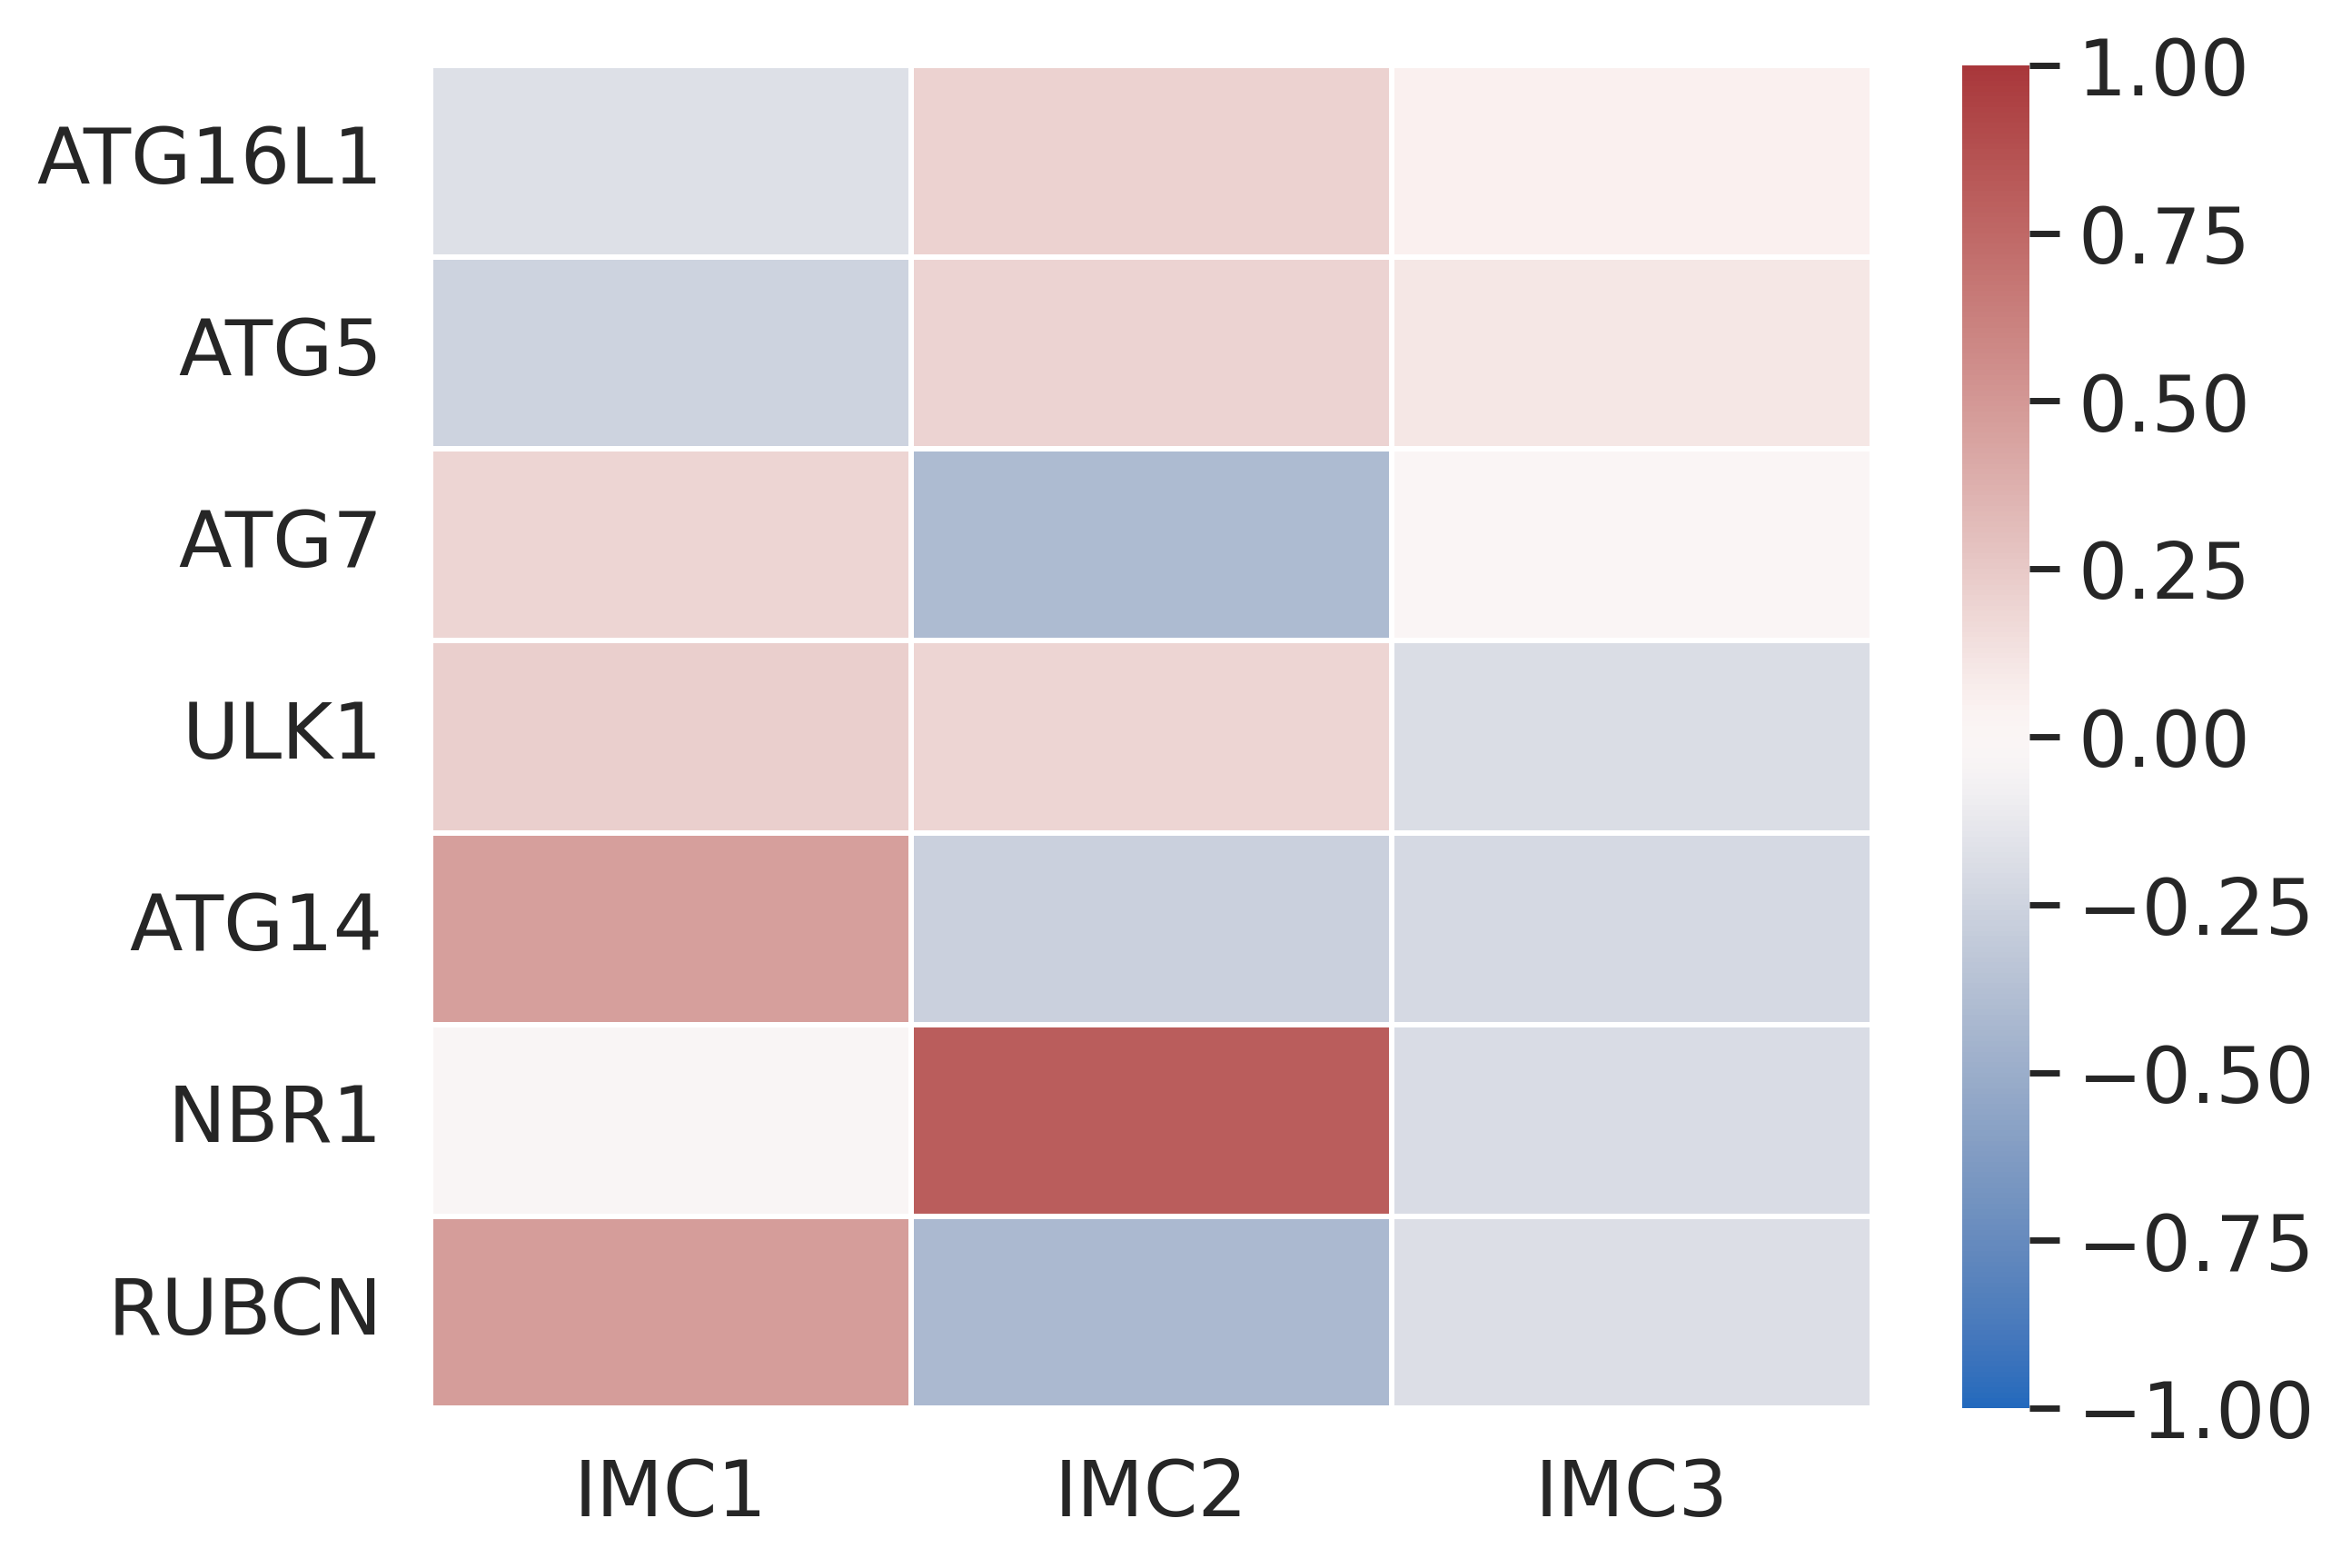

IMC1      IMC2      IMC3
ATG16L1 -0.118339  0.140524  0.036060
ATG5    -0.169693  0.135223  0.069171
ATG7     0.128934 -0.274537 -0.007297
ULK1     0.150292  0.128184 -0.126586
ATG14    0.308210 -0.179557 -0.143034
NBR1    -0.018037  0.539605 -0.131023
RUBCN    0.317496 -0.277649 -0.122926

In [23]:
firmaIMC.Plot_HeatMap_IMC(df_allinfo_GSE1,gens_autofagia,titulo="",factorAug=1.5,nom_figure='figaux_autofagia.png',typeFig='')

## Analisi CD8
### Fig 4B GSE1 CD8

In [24]:
for gen in df_allinfo_GSE1.columns:
    if 'CD274' in gen and 'C' in gen:
        print(gen)

CD274


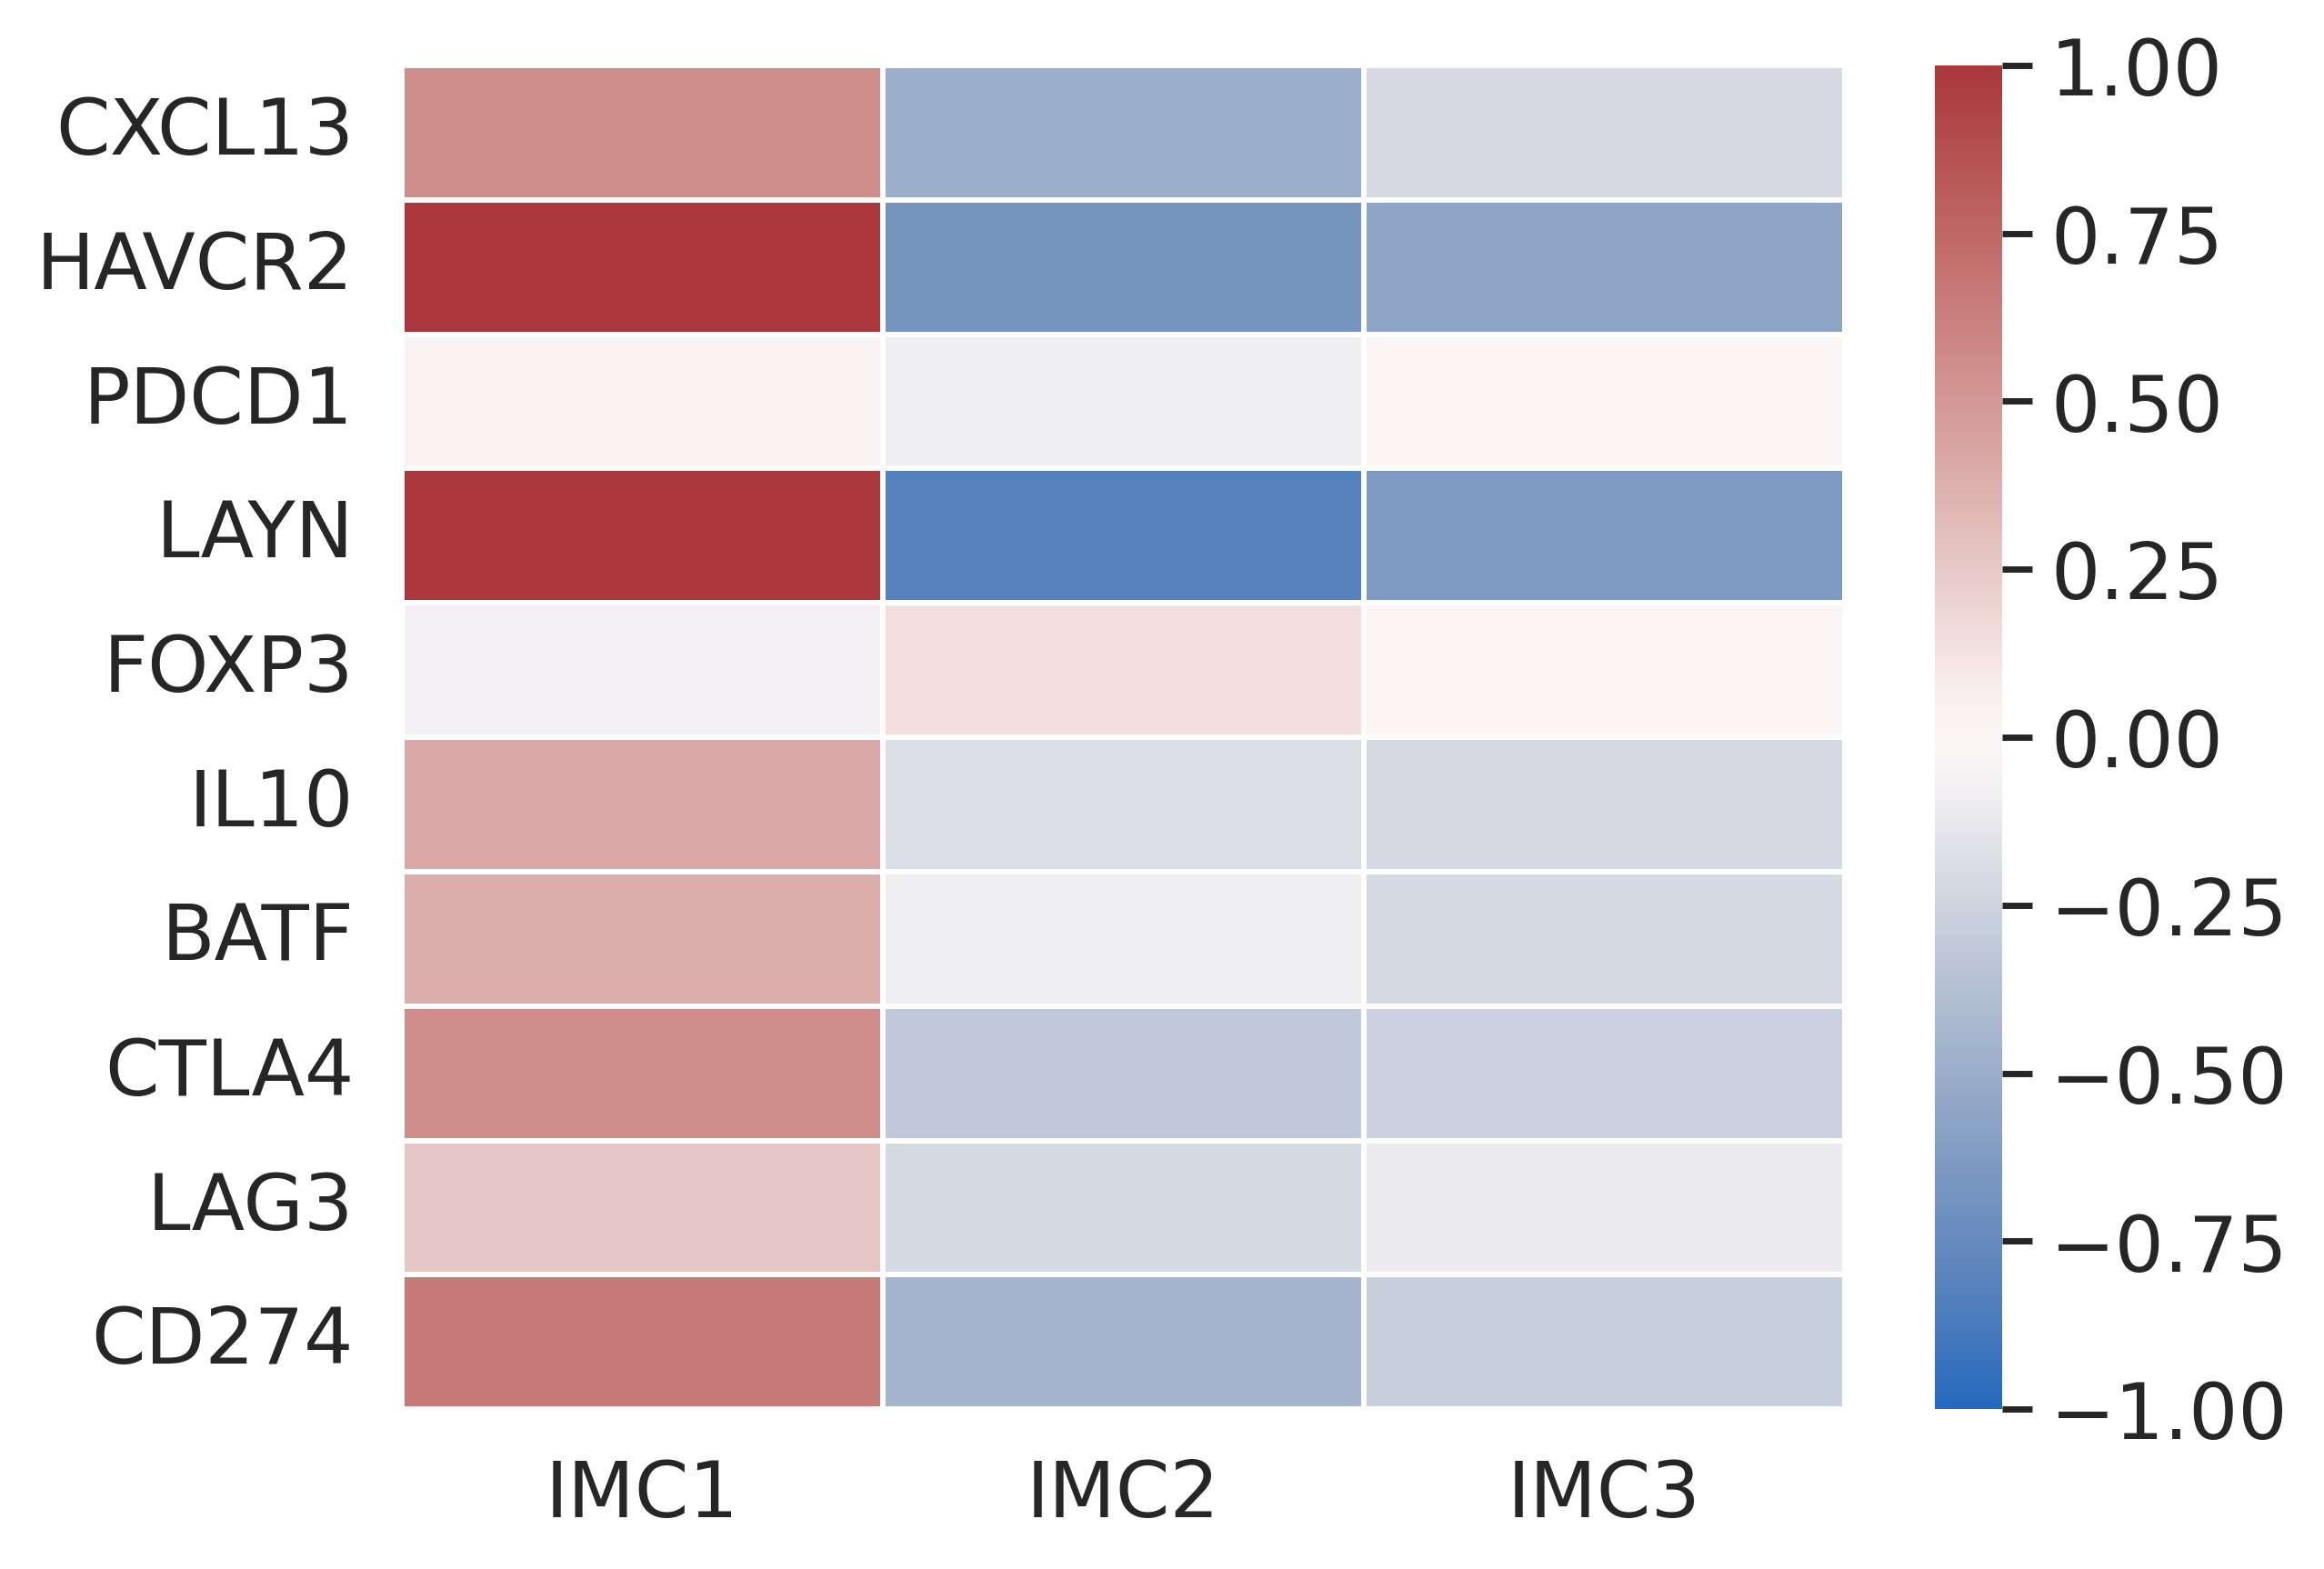

IMC1      IMC2      IMC3
CXCL13  0.367523 -0.329334 -0.140204
HAVCR2  0.796860 -0.449663 -0.373645
PDCD1   0.016965 -0.060556  0.005477
LAYN    0.923749 -0.548862 -0.425873
FOXP3  -0.051430  0.097746  0.006009
IL10    0.274443 -0.122723 -0.137154
BATF    0.258565 -0.061625 -0.143445
CTLA4   0.372315 -0.218557 -0.172348
LAG3    0.176665 -0.140637 -0.072050
CD274   0.433720 -0.297668 -0.189427

In [25]:
#selected_gens_CD8=['CXCL13', 'HAVCR2', 'PDCD1', 'LAYN', 'FOXP3', 'IL10', 'BATF', 'CTLA4' ,'CCR8','LAG3']
# Eliminant el CCR8 del GSE2
#selected_gens_CD8=['CXCL13', 'HAVCR2', 'PDCD1', 'LAYN', 'FOXP3', 'IL10', 'BATF', 'CTLA4', 'LAG3'] #   No en este set,'CCR8']
selected_gens_CD8=['CXCL13', 'HAVCR2', 'PDCD1', 'LAYN', 'FOXP3', 'IL10', 'BATF', 'CTLA4', 'LAG3','CD274'] #   No en este set,'CCR8']


firmaIMC.Plot_HeatMap_IMC(df_allinfo_GSE1,selected_gens_CD8,titulo="",factorAug=1.5,nom_figure='Fig4B_GSE1_CD8.png',typeFig='')

In [26]:
pd_ANOVA_Fig4B_GSE1=firmaIMC.Tukey_HeadMap_IMC(df_allinfo_GSE1,selected_gens_CD8)
print('ANOVA_PATHWAYS')
taula=firmaIMC.print_ANOVA2(pd_ANOVA_Fig4B_GSE1)
taula.to_excel("Anova_Fig4B_GSE1.xlsx",sheet_name='Fig4B_GSE1') 
taula

#Gen:  CXCL13
F_onewayResult(statistic=np.float64(49.89664055465044), pvalue=np.float64(1.2805989052662025e-21))
   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1    group2  meandiff p-adj   lower   upper  reject
----------------------------------------------------------
Cluster_1 Cluster_2  -1.8207    0.0 -2.3389 -1.3026   True
Cluster_1 Cluster_3  -1.3266    0.0 -1.6869 -0.9662   True
Cluster_2 Cluster_3   0.4942 0.0462  0.0065  0.9818   True
----------------------------------------------------------
Valor medio del cluster_1: 0.3675234809112228
#Gen:  HAVCR2
F_onewayResult(statistic=np.float64(299.3864708637396), pvalue=np.float64(5.20138387570037e-108))
   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1    group2  meandiff p-adj   lower   upper  reject
----------------------------------------------------------
Cluster_1 Cluster_2  -1.6911    0.0 -1.9227 -1.4596   True
Cluster_1 Cluster_3   -1.588    0.0  -1.749  -1.427   True
Cluster_2 Cluster_3  

/home/smadurga/RecercaGit/IMMETCOLS_GSE1_GSE2_TCGA/FIGURES_IMMETCOLS_Bioinformatics/firmaIMC_v3.py:416: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pd_Tabla['IMC1']=[pd_ANOVA.loc[0][i] for i in range(num_gens)]
/home/smadurga/RecercaGit/IMMETCOLS_GSE1_GSE2_TCGA/FIGURES_IMMETCOLS_Bioinformatics/firmaIMC_v3.py:417: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pd_Tabla['IMC2']=[pd_ANOVA.loc[1][i] for i in range(num_gens)]
/home/smadurga/RecercaGit/IMMETCOLS_GSE1_GSE2_TCGA/FIGURES_IMMETCOLS_Bioinformatics/firmaIMC_v3.py:418: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future versio

GeneName      IMC1      IMC2      IMC3  F_oneway       P_oneway  p-Tukey12  \
0   CXCL13  0.367523 -0.329334 -0.140204    49.897   1.280599e-21      0.000   
1   HAVCR2  0.796860 -0.449663 -0.373645   299.386  5.201384e-108      0.000   
2    PDCD1  0.016965 -0.060556  0.005477     0.414   6.610857e-01      0.650   
3     LAYN  0.923749 -0.548862 -0.425873   477.937  5.318504e-157      0.000   
4    FOXP3 -0.051430  0.097746  0.006009     1.479   2.282455e-01      0.204   
5     IL10  0.274443 -0.122723 -0.137154    25.358   1.557767e-11      0.000   
6     BATF  0.258565 -0.061625 -0.143445    22.925   1.630676e-10      0.001   
7    CTLA4  0.372315 -0.218557 -0.172348    48.370   5.304739e-21      0.000   
8     LAG3  0.176665 -0.140637 -0.072050    10.628   2.636489e-05      0.001   
9    CD274  0.433720 -0.297668 -0.189427    68.185   6.522499e-29      0.000   

   p-Tukey13  p-Tukey23  compara1  compara2  compara3  
0      0.000      0.046         1         1         1  
1      0.000      0.508         1         0         0  
2      0.981      0.703         0         0         0  
3      0.000      0.124         1         0         0  
4      0.613      0.506         0         0         0  
5      0.000      0.983         1         0         0  
6      0.000      0.571         1         0         0  
7      0.000      0.831         1         0         0  
8      0.000      0.679         1         0         0  
9      0.000      0.353         1         0         0

### Lectura Dades Paths de fitxers

In [27]:
#dict_gens_inicial={}  # Sense treure gens que no estan al set
#dict_label_path={}

In [28]:
def add_path_gmt(dir_pathways,nom_path,label_path,dict_gens):
    info_gens=firmaIMC.leer_gens_gmt(dir_pathways,nom_path)
    dict_gens[label_path]=info_gens[2:]
    #dict_label_path[label_path]=nom_path

### Fig3A GSE1

In [29]:
!pwd
!ls /disc/Recerca2/Firma_Cancer_Colonorectal_HD/Gene_Pathways/


/home/smadurga/RecercaGit/IMMETCOLS_GSE1_GSE2_TCGA/FIGURES_IMMETCOLS_Bioinformatics
ls: cannot access '/disc/Recerca2/Firma_Cancer_Colonorectal_HD/Gene_Pathways/': No such file or directory


#Añadir
GOBP_COLLAGEN_BIOSYNTHETIC_PROCESS
KEGG_AMINO_SUGAR_AND_NUCLEOTIDE_SUGAR_METABOLISM

In [30]:
dict_gens_inicial_metabol={}
dict_path_metabol={   # Versió ordenada
#IMC1
'GOBP_COLLAGEN_BIOSYNTHETIC_PROCESS':'Collagen biosynthesis',             # NOU
'GOBP_REGULATION_OF_PHAGOCYTOSIS':'Phagocytosis',
'GOBP_FRUCTOSE_6_PHOSPHATE_METABOLIC_PROCESS':'Fructose-6P metabolic',      # NOU    # OKK
'GOBP_AMINO_SUGAR_METABOLIC_PROCESS':'Amino sugar metabolic',               # NOU
'GOBP_REGULATION_OF_GLYCOLYTIC_PROCESS':'Regulation Glycolysis',
'GOBP_LACTATE_TRANSMEMBRANE_TRANSPORT':'Lactate transport',
'GOBP_GLUTAMINE_TRANSPORT':'Glutamine transport',
    
#'REACTOME_REGULATION_OF_GLYCOLYSIS_BY_FRUCTOSE_2_6_BISPHOSPHATE_METABOLISM':'React Regu Gly',
#'REACTOME_GLYCOLYSIS':'React Gly',
#'REACTOME_GLUCOSE_METABOLISM':'REAC_GLUCOSE_MET',
#'GOBP_MONOSACCHARIDE_METABOLIC_PROCESS':'GOBP_MONOSACCHARIDE_MET',
#'KEGG_FRUCTOSE_AND_MANNOSE_METABOLISM':'KEGG_FRUCTOSE_AND_MANNOSE_MET',    # NOU 2
#'KEGG_GLYCOLYSIS_GLUCONEOGENESIS':'Glycolysis',   
    
#IMC2

    
'GOBP_AUTOPHAGY_OF_PEROXISOME':'Autophagy of peroxisome',
'HP_ELEVATED_CIRCULATING_LONG_CHAIN_FATTY_ACID_CONCENTRATION':'Long Chain Fatty Acs.', 
'GOBP_GLUTAMINE_FAMILY_AMINO_ACID_CATABOLIC_PROCESS':'Glutamine catabolic',    
'GOBP_GLUTAMINE_FAMILY_AMINO_ACID_BIOSYNTHETIC_PROCESS':'Glutamine biosynthesis',

    
#IMC3
'WP_ELECTRON_TRANSPORT_CHAIN_OXPHOS_SYSTEM_IN_MITOCHONDRIA':'Oxphos',
'HALLMARK_G2M_CHECKPOINT':'G2M checkpoint',
'HALLMARK_E2F_TARGETS':'E2F targets',
'KEGG_PENTOSE_PHOSPHATE_PATHWAY':'Pentose Phosphate',
'KEGG_ONE_CARBON_POOL_BY_FOLATE':'Folate metabolism'
#'GOBP_TETRAHYDROFOLATE_BIOSYNTHETIC_PROCESS':'Folate biosynthesis'
##
        
#'GOBP_POSITIVE_REGULATION_OF_FATTY_ACID_OXIDATION':'Fatty Acid Oxidation',
#'GOBP_GLUTAMINE_FAMILY_AMINO_ACID_METABOLIC_PROCESS':'Glutamine metabolic',
#'HALLMARK_MYC_TARGETS_V1':'MYC targets',
#'HALLMARK_REACTIVE_OXYGEN_SPECIES_PATHWAY':'ROS Pathway',
#'HALLMARK_MTORC1_SIGNALING':'MTORC1 signaling',
#"REACTOME_HISTIDINE_CATABOLISM":"Histidine catabolism",
#'WP_AUTOPHAGY':'Autophagy',
#'REACTOME_PEXOPHAGY':'Pexophagy',
#'GOCC_RIBOSE_PHOSPHATE_DIPHOSPHOKINASE_COMPLEX':'Ribose Phosphate diphosphokinase',
#'REACTOME_MITOPHAGY':'Mitophagy',
#'GOBP_PURINE_DEOXYRIBONUCLEOSIDE_METABOLIC_PROCESS':'purine metabolic',
#'GOBP_PYRIMIDINE_NUCLEOBASE_BIOSYNTHETIC_PROCESS':'pyrimidine biosynthesis',
#'GOBP_CYSTEINE_METABOLIC_PROCESS':'cysteine metabolic',
#'WP_GLYOXYLATE_METABOLISM':'glyoxylate metabolic'    
}


#Inicialitzar
#dict_gens_inicial={}  # Sense treure gens que no estan al set

#dir_GSEA='../Gene_Pathways/GSEA/msigdb_v2022.1.Hs_files_to_download_locally/msigdb_v2022.1.Hs_GMTs/'
# Para g3:
#dir_GSEA='/disc/Recerca2/Firma_Cancer_Colonorectal_HD/Gene_Pathways/GSEA/msigdb_v2022.1.Hs_files_to_download_locally/msigdb_v2022.1.Hs_GMTs/'

dir_GSEA=""
nom_file_GSEA=dir_GSEA+'msigdb.v2022.1.Hs.symbols.gmt'

for ele in dict_path_metabol.keys():
    if ele in dict_gens_inicial_metabol.keys():
        print("WARNING",ele,"ja en el diccionari")
    else:
        nom_pathway=dict_path_metabol[ele]
        add_path_gmt(nom_file_GSEA,ele,nom_pathway,dict_gens_inicial_metabol)



In [31]:
print('FULL NAME OF PATHWAYS')
print('---------------------')
for ele in dict_path_metabol.keys():
    print(ele,':  ',dict_path_metabol[ele])

FULL NAME OF PATHWAYS
---------------------
GOBP_COLLAGEN_BIOSYNTHETIC_PROCESS :   Collagen biosynthesis
GOBP_REGULATION_OF_PHAGOCYTOSIS :   Phagocytosis
GOBP_FRUCTOSE_6_PHOSPHATE_METABOLIC_PROCESS :   Fructose-6P metabolic
GOBP_AMINO_SUGAR_METABOLIC_PROCESS :   Amino sugar metabolic
GOBP_REGULATION_OF_GLYCOLYTIC_PROCESS :   Regulation Glycolysis
GOBP_LACTATE_TRANSMEMBRANE_TRANSPORT :   Lactate transport
GOBP_GLUTAMINE_TRANSPORT :   Glutamine transport
GOBP_AUTOPHAGY_OF_PEROXISOME :   Autophagy of peroxisome
HP_ELEVATED_CIRCULATING_LONG_CHAIN_FATTY_ACID_CONCENTRATION :   Long Chain Fatty Acs.
GOBP_GLUTAMINE_FAMILY_AMINO_ACID_CATABOLIC_PROCESS :   Glutamine catabolic
GOBP_GLUTAMINE_FAMILY_AMINO_ACID_BIOSYNTHETIC_PROCESS :   Glutamine biosynthesis
WP_ELECTRON_TRANSPORT_CHAIN_OXPHOS_SYSTEM_IN_MITOCHONDRIA :   Oxphos
HALLMARK_G2M_CHECKPOINT :   G2M checkpoint
HALLMARK_E2F_TARGETS :   E2F targets
KEGG_PENTOSE_PHOSPHATE_PATHWAY :   Pentose Phosphate
KEGG_ONE_CARBON_POOL_BY_FOLATE :   Folate 

In [32]:
print("% of coincident gens")
dict_gens_Coincidents_metabol_GSE1={}
for ele in dict_gens_inicial_metabol.keys():
    print(ele,' ')
    dict_gens_Coincidents_metabol_GSE1[ele]=firmaIMC.Commom_genes(dict_gens_inicial_metabol[ele],list(pd_gens_GSE1['Gene.name']))

% of coincident gens
Collagen biosynthesis  
Num. gens: 3 de 50  6.00 % 
Phagocytosis  
Num. gens: 1 de 104  0.96 % 
Fructose-6P metabolic  
Num. gens: 5 de 11  45.45 % 
Amino sugar metabolic  
Num. gens: 2 de 41  4.88 % 
Regulation Glycolysis  
Num. gens: 0 de 47  0.00 % 
Lactate transport  
Num. gens: 1 de 7  14.29 % 
Glutamine transport  
Num. gens: 3 de 9  33.33 % 
Autophagy of peroxisome  
Num. gens: 0 de 6  0.00 % 
Long Chain Fatty Acs.  
Num. gens: 1 de 5  20.00 % 
Glutamine catabolic  
Num. gens: 4 de 27  14.81 % 
Glutamine biosynthesis  
Num. gens: 2 de 18  11.11 % 
Oxphos  
Num. gens: 10 de 103  9.71 % 
G2M checkpoint  
Num. gens: 5 de 200  2.50 % 
E2F targets  
Num. gens: 4 de 200  2.00 % 
Pentose Phosphate  
Num. gens: 3 de 27  11.11 % 
Folate metabolism  
Num. gens: 2 de 17  11.76 % 


In [33]:
dict_gens_inicial_metabol['Long Chain Fatty Acs.']

['CPT2', 'ABCD1', 'PEX19', 'PEX5', 'PEX1']

In [34]:
# Addició manual
#dict_gens_Coincidents_metabol_GSE1['Hexosamine']=['GFPT2','GNPNAT1','GPI','OGA','OGT','PGM3','UAP1']

In [35]:
#dict_gens_Coincidents_metabol_GSE1.keys()

Nom path: Collagen biosynthesis, num. gens:3
Nom path: Phagocytosis, num. gens:1
Nom path: Fructose-6P metabolic, num. gens:5
Nom path: Amino sugar metabolic, num. gens:2
Nom path: Regulation Glycolysis, num. gens:0
Nom path: Lactate transport, num. gens:1
Nom path: Glutamine transport, num. gens:3
Nom path: Autophagy of peroxisome, num. gens:0
Nom path: Long Chain Fatty Acs., num. gens:1
Nom path: Glutamine catabolic, num. gens:4
Nom path: Glutamine biosynthesis, num. gens:2
Nom path: Oxphos, num. gens:10
Nom path: G2M checkpoint, num. gens:5
Nom path: E2F targets, num. gens:4
Nom path: Pentose Phosphate, num. gens:3
Nom path: Folate metabolism, num. gens:2


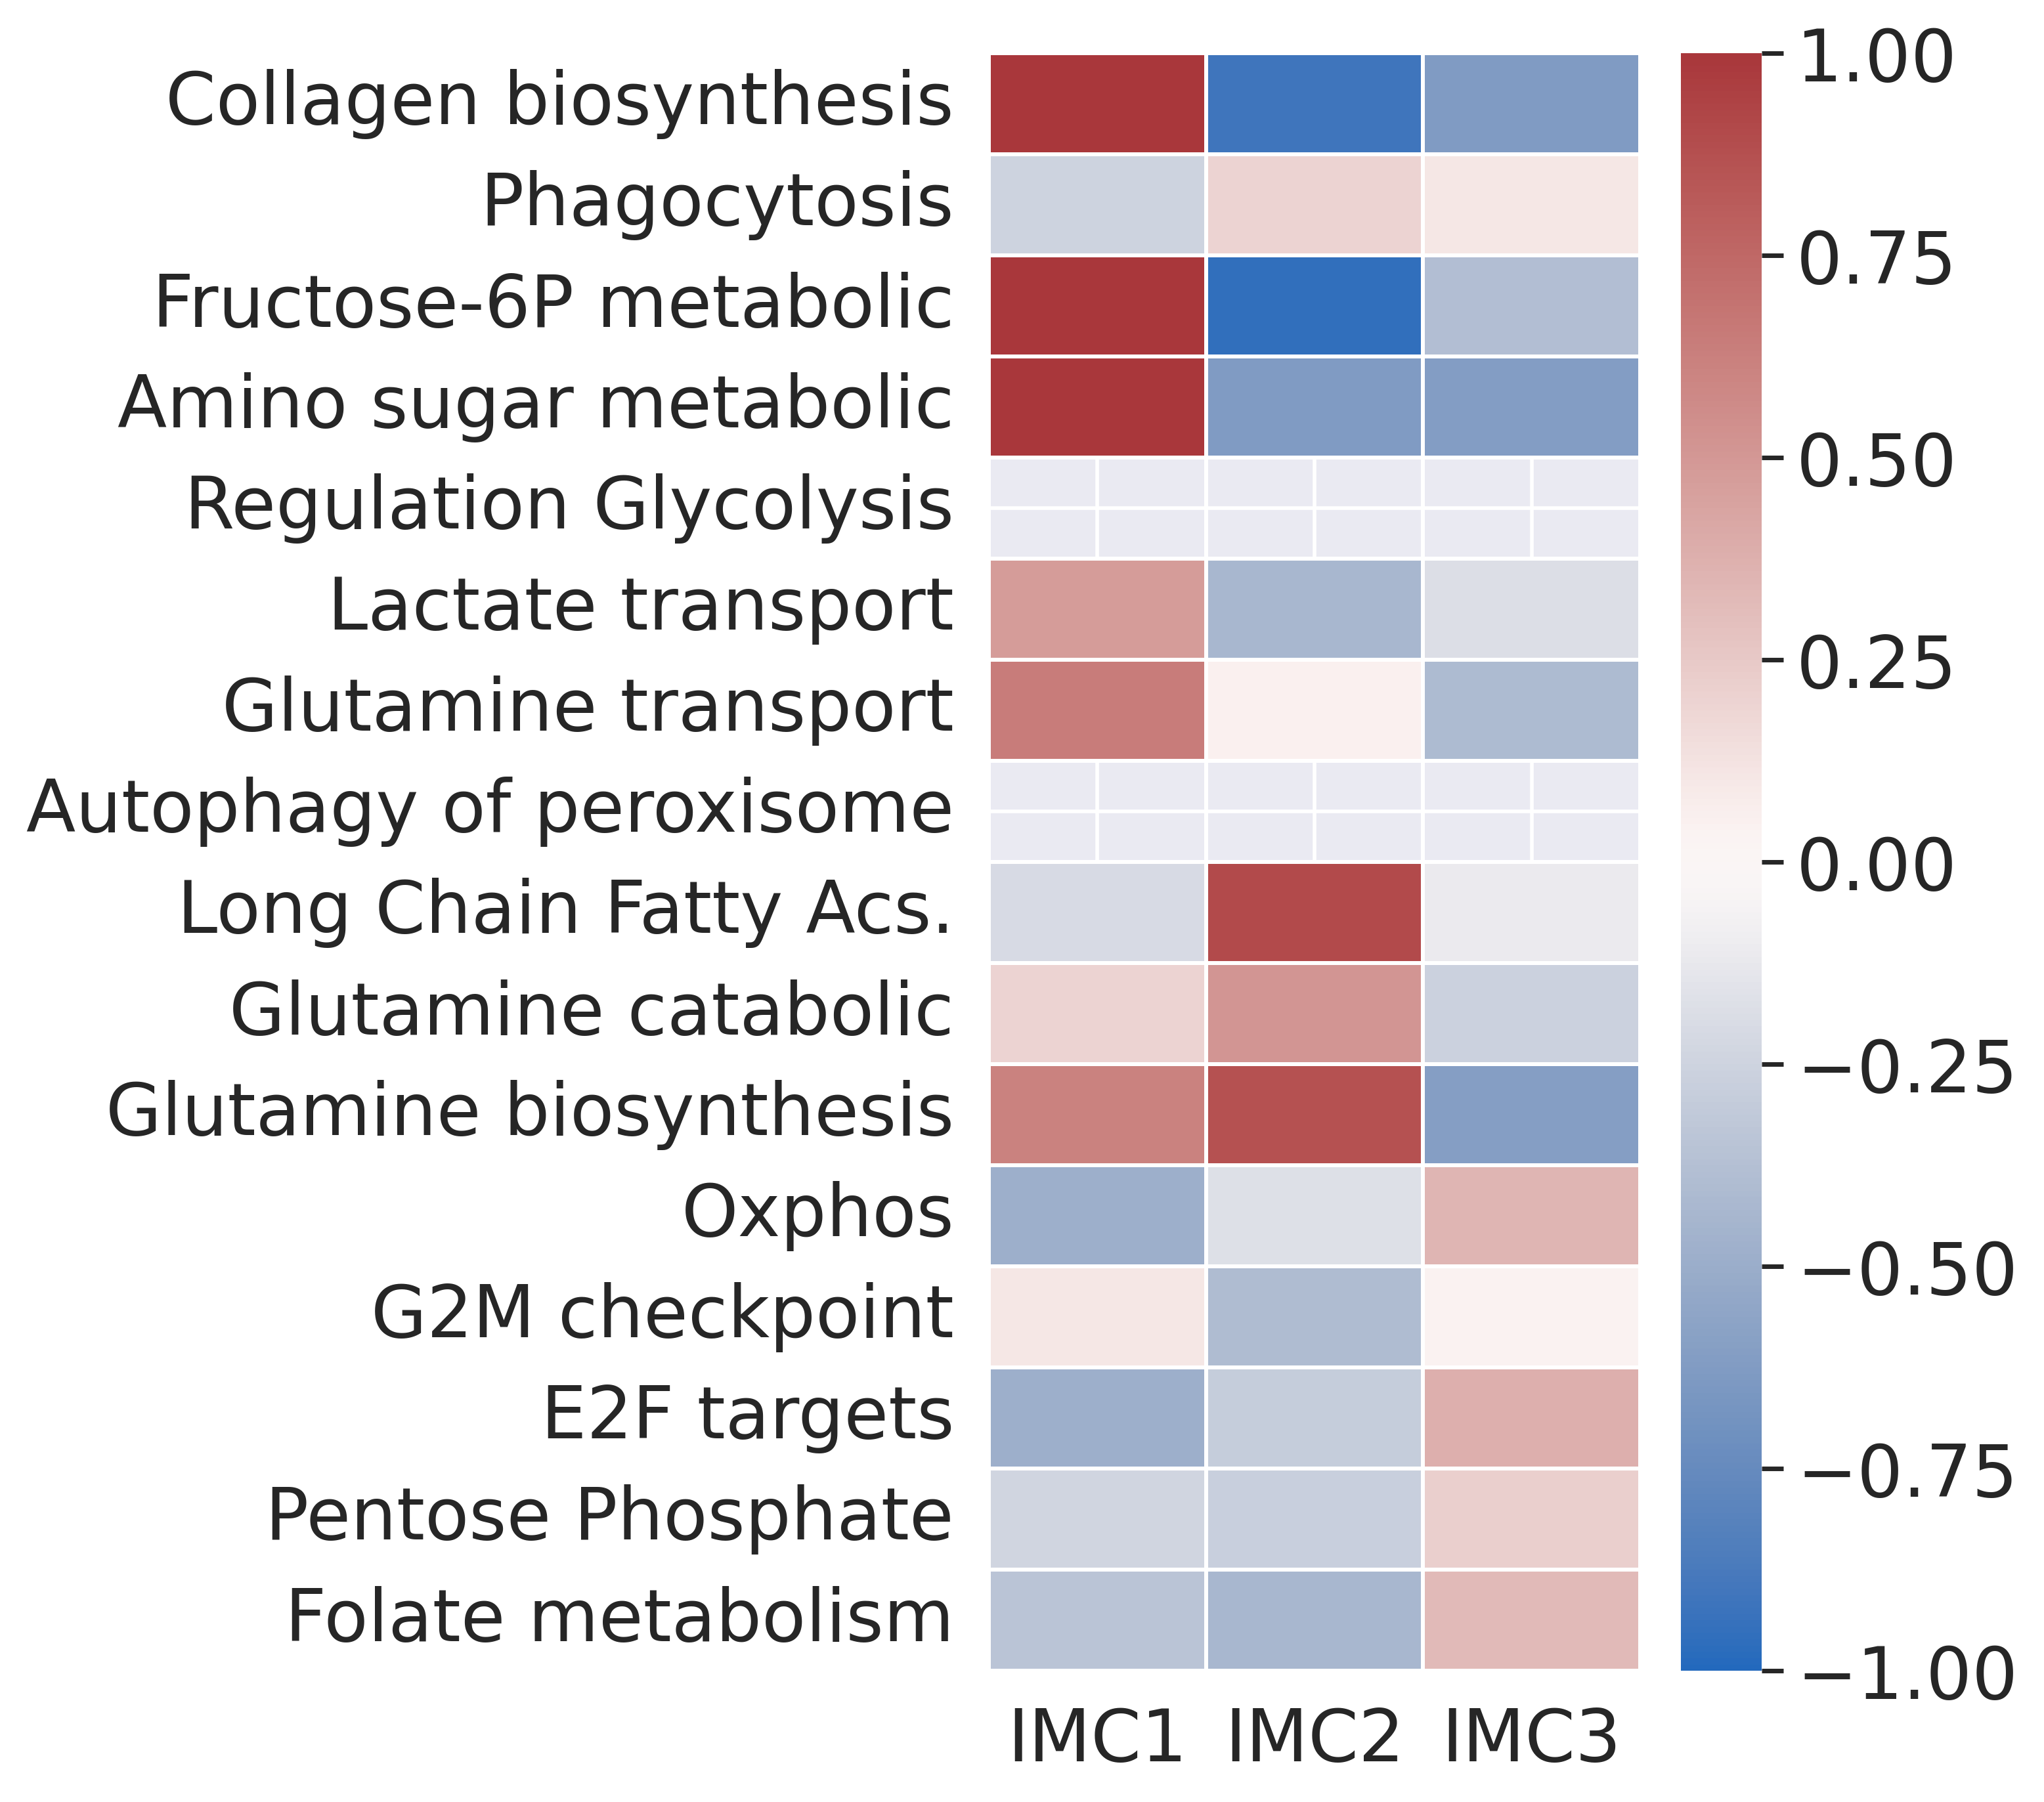

IMC1      IMC2      IMC3    avgIMC1    avgIMC2  \
Collagen biosynthesis    0.937561 -0.607467 -0.418963   9.634207   7.392494   
Phagocytosis            -0.169757  0.135274  0.069197   7.384920   7.670394   
Fructose-6P metabolic    0.686369 -0.638264 -0.255722   7.199516   6.621704   
Amino sugar metabolic    0.838095 -0.416741 -0.407784   5.034497   3.612048   
Regulation Glycolysis         NaN       NaN       NaN        NaN        NaN   
Lactate transport        0.321387 -0.290153 -0.122034   6.635395   5.741674   
Glutamine transport      0.429485  0.033516 -0.274064   9.072486   8.906307   
Autophagy of peroxisome       NaN       NaN       NaN        NaN        NaN   
Long Chain Fatty Acs.   -0.138461  0.601806 -0.073041   4.194904   4.666802   
Glutamine catabolic      0.133984  0.340979 -0.172576   8.813415   8.919886   
Glutamine biosynthesis   0.408959  0.580944 -0.405611   8.554240   8.713345   
Oxphos                  -0.323611 -0.117499  0.230806  10.394005  10.461040   
G2M checkpoint           0.071155 -0.267539  0.026542   7.655539   7.395411   
E2F targets             -0.326298 -0.195696  0.253067   7.228406   7.335860   
Pentose Phosphate       -0.160070 -0.187085  0.148142   5.680724   5.666698   
Folate metabolism       -0.230239 -0.288343  0.218153   8.222722   8.179040   

                           avgIMC3   stdIMC1   stdIMC2   stdIMC3    stdALL  
Collagen biosynthesis     7.665999  0.825968  1.345146  1.159684  1.450920  
Phagocytosis              7.608554  0.854699  0.983226  0.957982  0.935889  
Fructose-6P metabolic     6.788571  0.468892  0.344415  0.320406  0.436206  
Amino sugar metabolic     3.622201  1.146283  0.749688  0.792268  1.133574  
Regulation Glycolysis          NaN       NaN       NaN       NaN       NaN  
Lactate transport         5.987367  1.410694  1.356740  1.445015  1.461427  
Glutamine transport       8.777223  0.371393  0.444056  0.401029  0.419677  
Autophagy of peroxisome        NaN       NaN       NaN       NaN       NaN  
Long Chain Fatty Acs.     4.236608  0.595178  0.649618  0.623449  0.637470  
Glutamine catabolic       8.655732  0.484182  0.428186  0.534476  0.514363  
Glutamine biosynthesis    7.800673  0.798142  0.643880  0.895491  0.925109  
Oxphos                   10.574320  0.323957  0.307794  0.310381  0.325233  
G2M checkpoint            7.621274  0.836553  0.778895  0.710042  0.768031  
E2F targets               7.705085  0.897958  0.809119  0.712882  0.822761  
Pentose Phosphate         5.840746  0.438703  0.488980  0.559052  0.519196  
Folate metabolism         8.559813  0.761794  0.738146  0.709493  0.751778

In [36]:
res2=firmaIMC.Plot_HeatMap_PATHS_IMC_stat(df_allinfo_GSE1,dict_gens_Coincidents_metabol_GSE1,nom_figure='figaux.png',factorAug=1.5,typeFig='Llarga2')
res2

In [37]:
pd_ANOVA_PATHWAY_Fig3A_GSE1=firmaIMC.Tukey_HeadMap_PATHS_IMC(df_allinfo_GSE1,dict_gens_Coincidents_metabol_GSE1)
print('ANOVA_PATHWAYS')
taula=firmaIMC.print_ANOVA2(pd_ANOVA_PATHWAY_Fig3A_GSE1)
taula.to_excel("Anova_Fig3A_GSE1.xlsx",sheet_name='Fig3A_GSE1') 
taula

Nom path: Collagen biosynthesis, num. gens:3
F_onewayResult(statistic=np.float64(507.1580820828685), pvalue=np.float64(2.796460706556704e-164))
   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1    group2  meandiff p-adj   lower   upper  reject
----------------------------------------------------------
Cluster_1 Cluster_2  -2.2417    0.0 -2.4664 -2.0171   True
Cluster_1 Cluster_3  -1.9682    0.0 -2.1244  -1.812   True
Cluster_2 Cluster_3   0.2735 0.0069  0.0621  0.4849   True
----------------------------------------------------------
Nom path: Phagocytosis, num. gens:1
F_onewayResult(statistic=np.float64(9.795059881690948), pvalue=np.float64(5.9868754315628396e-05))
   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
  group1    group2  meandiff p-adj   lower  upper  reject
---------------------------------------------------------
Cluster_1 Cluster_2   0.2855 0.0014  0.0944 0.4766   True
Cluster_1 Cluster_3   0.2236 0.0002  0.0907 0.3566   True
Cluster_2 Cluster_

/home/smadurga/RecercaGit/IMMETCOLS_GSE1_GSE2_TCGA/FIGURES_IMMETCOLS_Bioinformatics/firmaIMC_v3.py:416: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pd_Tabla['IMC1']=[pd_ANOVA.loc[0][i] for i in range(num_gens)]
/home/smadurga/RecercaGit/IMMETCOLS_GSE1_GSE2_TCGA/FIGURES_IMMETCOLS_Bioinformatics/firmaIMC_v3.py:417: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pd_Tabla['IMC2']=[pd_ANOVA.loc[1][i] for i in range(num_gens)]
/home/smadurga/RecercaGit/IMMETCOLS_GSE1_GSE2_TCGA/FIGURES_IMMETCOLS_Bioinformatics/firmaIMC_v3.py:418: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future versio

GeneName      IMC1      IMC2      IMC3  F_oneway  \
0     Collagen biosynthesis  0.937561 -0.607467 -0.418963   507.158   
1              Phagocytosis -0.169757  0.135274  0.069197     9.795   
2     Fructose-6P metabolic  0.686369 -0.638264 -0.255722   216.721   
3     Amino sugar metabolic  0.838095 -0.416741 -0.407784   346.388   
4     Regulation Glycolysis       NaN       NaN       NaN       NaN   
5         Lactate transport  0.321387 -0.290153 -0.122034    37.536   
6       Glutamine transport  0.429485  0.033516 -0.274064    74.142   
7   Autophagy of peroxisome       NaN       NaN       NaN       NaN   
8     Long Chain Fatty Acs. -0.138461  0.601806 -0.073041    42.179   
9       Glutamine catabolic  0.133984  0.340979 -0.172576    26.178   
10   Glutamine biosynthesis  0.408959  0.580944 -0.405611   155.041   
11                   Oxphos -0.323611 -0.117499  0.230806    45.781   
12           G2M checkpoint  0.071155 -0.267539  0.026542     8.089   
13              E2F targets -0.326298 -0.195696  0.253067    53.226   
14        Pentose Phosphate -0.160070 -0.187085  0.148142    16.974   
15        Folate metabolism -0.230239 -0.288343  0.218153    38.076   

         P_oneway  p-Tukey12  p-Tukey13  p-Tukey23  compara1  compara2  \
0   2.796461e-164      0.000      0.000      0.007         1         1   
1    5.986875e-05      0.001      0.000      0.699         1         0   
2    3.721902e-82      0.000      0.000      0.000         1         1   
3   9.768021e-122      0.000      0.000      0.990         1         0   
4             NaN        NaN        NaN        NaN         0         0   
5    1.391265e-16      0.000      0.000      0.091         1         0   
6    3.008456e-31      0.000      0.000      0.000         1         1   
7             NaN        NaN        NaN        NaN         0         0   
8    1.742832e-18      0.000      0.510      0.000         0         1   
9    7.081336e-12      0.043      0.000      0.000         1         1   
10   3.148974e-61      0.075      0.000      0.000         0         0   
11   5.950366e-20      0.040      0.000      0.000         1         1   
12   3.224383e-04      0.000      0.742      0.001         0         1   
13   5.832922e-23      0.269      0.000      0.000         0         0   
14   5.260115e-08      0.948      0.000      0.000         0         0   
15   8.349614e-17      0.774      0.000      0.000         0         0   

    compara3  
0          1  
1          0  
2          1  
3          0  
4          0  
5          0  
6          1  
7          0  
8          0  
9          1  
10         1  
11         1  
12         0  
13         1  
14         1  
15         1

### Fig 4A   GSE1

In [38]:
dict_gens_inicial_estroma={}
dict_path_estroma={
#### Microambient
#nom_file=dir_Frontiers+'CAFv2.txt'
'CAF':'CAF',
'HALLMARK_HYPOXIA':'Hypoxia',
'GOMF_HEXOSAMINIDASE_ACTIVITY':'Hexosaminidase',
'FOROUTAN_TGFB_EMT_UP':'EMT',
'WP_TGFBETA_SIGNALING_PATHWAY':'TGFbeta signaling',                  
'HALLMARK_ANGIOGENESIS':'Angiogenesis',
'REACTOME_NON_INTEGRIN_MEMBRANE_ECM_INTERACTIONS':'ECM interactions',
#### Inmune    
'KOINUMA_COLON_CANCER_MSI_UP':'Colon cancer MSI up',
'WP_INFLAMMATORY_RESPONSE_PATHWAY':'Imflammatory resp.',
'DER_IFN_GAMMA_RESPONSE_UP':'IFN gamma resp.',
'WP_IL6_SIGNALING_PATHWAY':'IL6 signaling',
'BIOCARTA_TCYTOTOXIC_PATHWAY':'T-cytotoxic pathway',
'GSE24026_PD1_LIGATION_VS_CTRL_IN_ACT_TCELL_LINE_UP':'PD1'
}
    
    
    
    
  


#Inicialitzar
#dict_gens_inicial={}  # Sense treure gens que no estan al set

#dir_GSEA='../Gene_Pathways/GSEA/msigdb_v2022.1.Hs_files_to_download_locally/msigdb_v2022.1.Hs_GMTs/'
#dir_Frontiers='../Gene_Pathways/Llista_Frontiers/'

# En g3
#dir_GSEA='/disc/Recerca2/Firma_Cancer_Colonorectal_HD/Gene_Pathways/GSEA/msigdb_v2022.1.Hs_files_to_download_locally/msigdb_v2022.1.Hs_GMTs/'
#dir_Frontiers='/disc/Recerca2/Firma_Cancer_Colonorectal_HD/Gene_Pathways/Llista_Frontiers/'

dir_GSEA=""
dir_Frontiers="Llista_Frontiers/"

nom_file_GSEA=dir_GSEA+'msigdb.v2022.1.Hs.symbols.gmt'

for ele in dict_path_estroma.keys():
    if ele in dict_gens_inicial_estroma.keys():
        print("WARNING",ele,"ja en el diccionari")
    elif ele == 'CAF':    # pels que no estan en msigdb
        nom_file=dir_Frontiers+'CAFv2.txt'
        label_path='CAF'
        nom_path='CAF'
        info_gens=firmaIMC.leer_gens_columna(nom_file)
        dict_gens_inicial_estroma[label_path]=info_gens[1:]        
    else:
        nom_pathway=dict_path_estroma[ele]
        add_path_gmt(nom_file_GSEA,ele,nom_pathway,dict_gens_inicial_estroma)



In [39]:
print('FULL NAME OF PATHWAYS')
print('---------------------')
for ele in dict_path_estroma.keys():
    print(ele,':  ',dict_path_estroma[ele])

FULL NAME OF PATHWAYS
---------------------
CAF :   CAF
HALLMARK_HYPOXIA :   Hypoxia
GOMF_HEXOSAMINIDASE_ACTIVITY :   Hexosaminidase
FOROUTAN_TGFB_EMT_UP :   EMT
WP_TGFBETA_SIGNALING_PATHWAY :   TGFbeta signaling
HALLMARK_ANGIOGENESIS :   Angiogenesis
REACTOME_NON_INTEGRIN_MEMBRANE_ECM_INTERACTIONS :   ECM interactions
KOINUMA_COLON_CANCER_MSI_UP :   Colon cancer MSI up
WP_INFLAMMATORY_RESPONSE_PATHWAY :   Imflammatory resp.
DER_IFN_GAMMA_RESPONSE_UP :   IFN gamma resp.
WP_IL6_SIGNALING_PATHWAY :   IL6 signaling
BIOCARTA_TCYTOTOXIC_PATHWAY :   T-cytotoxic pathway
GSE24026_PD1_LIGATION_VS_CTRL_IN_ACT_TCELL_LINE_UP :   PD1


In [40]:
print("% of coincident gens")
dict_gens_Coincidents_estroma_GSE1={}
for ele in dict_gens_inicial_estroma.keys():
    print(ele,' ')
    dict_gens_Coincidents_estroma_GSE1[ele]=firmaIMC.Commom_genes(dict_gens_inicial_estroma[ele],list(pd_gens_GSE1['Gene.name']))

% of coincident gens
CAF  
Num. gens: 1 de 7  14.29 % 
Hypoxia  
Num. gens: 8 de 200  4.00 % 
Hexosaminidase  
Num. gens: 0 de 15  0.00 % 
EMT  
Num. gens: 7 de 192  3.65 % 
TGFbeta signaling  
Num. gens: 7 de 132  5.30 % 
Angiogenesis  
Num. gens: 1 de 36  2.78 % 
ECM interactions  
Num. gens: 5 de 59  8.47 % 
Colon cancer MSI up  
Num. gens: 0 de 16  0.00 % 
Imflammatory resp.  
Num. gens: 2 de 30  6.67 % 
IFN gamma resp.  
Num. gens: 0 de 71  0.00 % 
IL6 signaling  
Num. gens: 0 de 43  0.00 % 
T-cytotoxic pathway  
Num. gens: 0 de 12  0.00 % 
PD1  
Num. gens: 1 de 198  0.51 % 


Nom path: CAF, num. gens:1
Nom path: Hypoxia, num. gens:8
Nom path: Hexosaminidase, num. gens:0
Nom path: EMT, num. gens:7
Nom path: TGFbeta signaling, num. gens:7
Nom path: Angiogenesis, num. gens:1
Nom path: ECM interactions, num. gens:5
Nom path: Colon cancer MSI up, num. gens:0
Nom path: Imflammatory resp., num. gens:2
Nom path: IFN gamma resp., num. gens:0
Nom path: IL6 signaling, num. gens:0
Nom path: T-cytotoxic pathway, num. gens:0
Nom path: PD1, num. gens:1


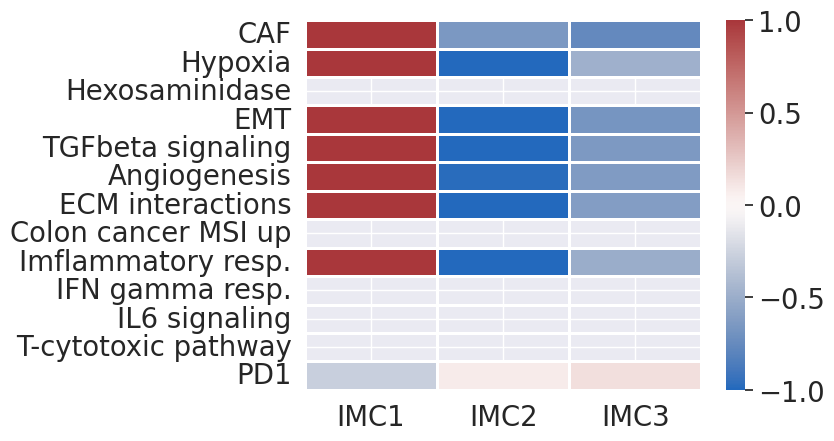

IMC1      IMC2      IMC3    avgIMC1    avgIMC2  \
CAF                  1.006457 -0.433232 -0.507414   8.218569   5.335783   
Hypoxia              0.888419 -0.864535 -0.320888   9.869778   8.620113   
Hexosaminidase            NaN       NaN       NaN        NaN        NaN   
EMT                  1.016534 -0.664570 -0.452689   9.563742   7.290344   
TGFbeta signaling    0.978433 -0.665380 -0.428947   7.757107   6.573485   
Angiogenesis         0.961651 -0.653576 -0.421692  11.172219   8.888391   
ECM interactions     0.951191 -0.674313 -0.409769   9.879046   7.480797   
Colon cancer MSI up       NaN       NaN       NaN        NaN        NaN   
Imflammatory resp.   0.837488 -0.689336 -0.335593  10.173476   7.474772   
IFN gamma resp.           NaN       NaN       NaN        NaN        NaN   
IL6 signaling             NaN       NaN       NaN        NaN        NaN   
T-cytotoxic pathway       NaN       NaN       NaN        NaN        NaN   
PD1                 -0.182418  0.055332  0.098077  11.871062  11.980671   

                       avgIMC3   stdIMC1   stdIMC2   stdIMC3    stdALL  
CAF                   5.187245  1.198557  1.599635  1.497281  2.002367  
Hypoxia               9.007674  0.471143  0.647091  0.555368  0.712891  
Hexosaminidase             NaN       NaN       NaN       NaN       NaN  
EMT                   7.576875  0.811491  1.122859  0.972897  1.352325  
TGFbeta signaling     6.743728  0.370852  0.617221  0.572321  0.720047  
Angiogenesis          9.216259  0.845461  1.314047  1.068623  1.413937  
ECM interactions      7.871101  0.860936  1.327449  1.153268  1.475388  
Colon cancer MSI up        NaN       NaN       NaN       NaN       NaN  
Imflammatory resp.    8.100023  1.137489  1.662119  1.501172  1.767528  
IFN gamma resp.            NaN       NaN       NaN       NaN       NaN  
IL6 signaling              NaN       NaN       NaN       NaN       NaN  
T-cytotoxic pathway        NaN       NaN       NaN       NaN       NaN  
PD1                  12.000379  0.450422  0.490423  0.452291  0.461029

In [41]:
res=firmaIMC.Plot_HeatMap_PATHS_IMC_stat(df_allinfo_GSE1,dict_gens_Coincidents_estroma_GSE1,nom_figure='Fig4A_GSE1',factorAug=1.5,typeFig='')
res

In [42]:
pd_ANOVA_PATHWAY_Fig4A_GSE1=firmaIMC.Tukey_HeadMap_PATHS_IMC(df_allinfo_GSE1,dict_gens_Coincidents_estroma_GSE1)
print('ANOVA_PATHWAYS')
taula=firmaIMC.print_ANOVA2(pd_ANOVA_PATHWAY_Fig4A_GSE1)
taula.to_excel("Anova_Fig4A_GSE1.xlsx",sheet_name='Fig4A_GSE1') 
taula

Nom path: CAF, num. gens:1
F_onewayResult(statistic=np.float64(651.2843477378467), pvalue=np.float64(1.0314352136473921e-197))
   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1    group2  meandiff p-adj   lower   upper  reject
----------------------------------------------------------
Cluster_1 Cluster_2  -2.8828    0.0 -3.1753 -2.5903   True
Cluster_1 Cluster_3  -3.0313    0.0 -3.2348 -2.8279   True
Cluster_2 Cluster_3  -0.1485 0.4147 -0.4238  0.1267  False
----------------------------------------------------------
Nom path: Hypoxia, num. gens:8
F_onewayResult(statistic=np.float64(476.9102097104161), pvalue=np.float64(9.66221233198601e-157))
   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
  group1    group2  meandiff p-adj  lower   upper  reject
---------------------------------------------------------
Cluster_1 Cluster_2  -1.2497   0.0 -1.3615 -1.1378   True
Cluster_1 Cluster_3  -0.8621   0.0 -0.9399 -0.7843   True
Cluster_2 Cluster_3   0.3876   0.0  0.282

/home/smadurga/RecercaGit/IMMETCOLS_GSE1_GSE2_TCGA/FIGURES_IMMETCOLS_Bioinformatics/firmaIMC_v3.py:416: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pd_Tabla['IMC1']=[pd_ANOVA.loc[0][i] for i in range(num_gens)]
/home/smadurga/RecercaGit/IMMETCOLS_GSE1_GSE2_TCGA/FIGURES_IMMETCOLS_Bioinformatics/firmaIMC_v3.py:417: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pd_Tabla['IMC2']=[pd_ANOVA.loc[1][i] for i in range(num_gens)]
/home/smadurga/RecercaGit/IMMETCOLS_GSE1_GSE2_TCGA/FIGURES_IMMETCOLS_Bioinformatics/firmaIMC_v3.py:418: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future versio

GeneName      IMC1      IMC2      IMC3  F_oneway  \
0                   CAF  1.006457 -0.433232 -0.507414   651.284   
1               Hypoxia  0.888419 -0.864535 -0.320888   476.910   
2        Hexosaminidase       NaN       NaN       NaN       NaN   
3                   EMT  1.016534 -0.664570 -0.452689   689.713   
4     TGFbeta signaling  0.978433 -0.665380 -0.428947   597.318   
5          Angiogenesis  0.961651 -0.653576 -0.421692   559.778   
6      ECM interactions  0.951191 -0.674313 -0.409769   542.039   
7   Colon cancer MSI up       NaN       NaN       NaN       NaN   
8    Imflammatory resp.  0.837488 -0.689336 -0.335593   367.349   
9       IFN gamma resp.       NaN       NaN       NaN       NaN   
10        IL6 signaling       NaN       NaN       NaN       NaN   
11  T-cytotoxic pathway       NaN       NaN       NaN       NaN   
12                  PD1 -0.182418  0.055332  0.098077    11.092   

         P_oneway  p-Tukey12  p-Tukey13  p-Tukey23  compara1  compara2  \
0   1.031435e-197      0.000        0.0      0.415         1         0   
1   9.662212e-157      0.000        0.0      0.000         1         1   
2             NaN        NaN        NaN        NaN         0         0   
3   5.226450e-206      0.000        0.0      0.001         1         1   
4   1.207031e-185      0.000        0.0      0.000         1         1   
5   6.103522e-177      0.000        0.0      0.000         1         1   
6   9.814444e-173      0.000        0.0      0.000         1         1   
7             NaN        NaN        NaN        NaN         0         0   
8   1.183529e-127      0.000        0.0      0.000         1         1   
9             NaN        NaN        NaN        NaN         0         0   
10            NaN        NaN        NaN        NaN         0         0   
11            NaN        NaN        NaN        NaN         0         0   
12   1.669073e-05      0.017        0.0      0.860         1         0   

    compara3  
0          0  
1          1  
2          0  
3          1  
4          1  
5          1  
6          1  
7          0  
8          1  
9          0  
10         0  
11         0  
12         0

## Analisis pathways per IMC3

In [43]:
dict_gens_inicial_IMC3={}
dict_path_IMC3={
#### Microambient
#nom_file=dir_Frontiers+'CAFv2.txt'
'GOBP_TETRAHYDROFOLATE_INTERCONVERSION':'GOBP_TETRAHYDROFOLATE_INTERCONVERSION',
'GOBP_TETRAHYDROFOLATE_BIOSYNTHETIC_PROCESS':'GOBP_TETRAHYDROFOLATE_BIOSYNTHETIC_PROCESS',    
'KEGG_ONE_CARBON_POOL_BY_FOLATE':'KEGG_ONE_CARBON_POOL_BY_FOLATE',
'WP_DISORDERS_OF_FOLATE_METABOLISM_AND_TRANSPORT':'WP_DISORDERS_OF_FOLATE_METABOLISM_AND_TRANSPORT',
'GOBP_TETRAHYDROFOLATE_METABOLIC_PROCESS':'GOBP_TETRAHYDROFOLATE_METABOLIC_PROCESS',
'GOBP_PURINE_DEOXYRIBONUCLEOSIDE_METABOLIC_PROCESS':'GOBP_PURINE_DEOXYRIBONUCLEOSIDE_METABOLIC_PROCESS',
'GOBP_PURINE_DEOXYRIBONUCLEOSIDE_MONOPHOSPHATE_CATABOLIC_PROCESS':'GOBP_PURINE_DEOXYRIBONUCLEOSIDE_MONOPHOSPHATE_CATABOLIC_PROCESS',
'GOBP_PURINE_DEOXYRIBONUCLEOSIDE_MONOPHOSPHATE_METABOLIC_PROCESS':'GOBP_PURINE_DEOXYRIBONUCLEOSIDE_MONOPHOSPHATE_METABOLIC_PROCESS',
'REACTOME_PURINE_RIBONUCLEOSIDE_MONOPHOSPHATE_BIOSYNTHESIS':'REACTOME_PURINE_RIBONUCLEOSIDE_MONOPHOSPHATE_BIOSYNTHESIS',
'GOBP_DE_NOVO_PYRIMIDINE_NUCLEOBASE_BIOSYNTHETIC_PROCESS':'GOBP_DE_NOVO_PYRIMIDINE_NUCLEOBASE_BIOSYNTHETIC_PROCESS',
'GOBP_PYRIMIDINE_NUCLEOBASE_BIOSYNTHETIC_PROCESS':'GOBP_PYRIMIDINE_NUCLEOBASE_BIOSYNTHETIC_PROCESS',
'REACTOME_DEGRADATION_OF_CYSTEINE_AND_HOMOCYSTEINE':'REACTOME_DEGRADATION_OF_CYSTEINE_AND_HOMOCYSTEINE',
'GOBP_CYSTEINE_METABOLIC_PROCESS':'GOBP_CYSTEINE_METABOLIC_PROCESS',
'WP_CYSTEINE_AND_METHIONINE_CATABOLISM':'WP_CYSTEINE_AND_METHIONINE_CATABOLISM',
'KEGG_GLYOXYLATE_AND_DICARBOXYLATE_METABOLISM':'KEGG_GLYOXYLATE_AND_DICARBOXYLATE_METABOLISM',
'WP_GLYOXYLATE_METABOLISM':'WP_GLYOXYLATE_METABOLISM'
}
    
    
    
    
#dir_GSEA='../Gene_Pathways/GSEA/msigdb_v2022.1.Hs_files_to_download_locally/msigdb_v2022.1.Hs_GMTs/'

#En g3
#dir_GSEA='/disc/Recerca2/Firma_Cancer_Colonorectal_HD/Gene_Pathways/GSEA/msigdb_v2022.1.Hs_files_to_download_locally/msigdb_v2022.1.Hs_GMTs/'

dir_GSEA=""
nom_file_GSEA=dir_GSEA+'msigdb.v2022.1.Hs.symbols.gmt'

for ele in dict_path_IMC3.keys():
    if ele in dict_gens_inicial_IMC3.keys():
        print("WARNING",ele,"ja en el diccionari")
    else:
        nom_pathway=dict_path_IMC3[ele]
        add_path_gmt(nom_file_GSEA,ele,nom_pathway,dict_gens_inicial_IMC3)



In [44]:
print("% of coincident gens")
dict_gens_Coincidents_IMC3={}
for ele in dict_gens_inicial_IMC3.keys():
    print(ele,' ')
    dict_gens_Coincidents_IMC3[ele]=firmaIMC.Commom_genes(dict_gens_inicial_IMC3[ele],list(pd_gens_GSE1['Gene.name']))

% of coincident gens
GOBP_TETRAHYDROFOLATE_INTERCONVERSION  
Num. gens: 2 de 9  22.22 % 
GOBP_TETRAHYDROFOLATE_BIOSYNTHETIC_PROCESS  
Num. gens: 1 de 8  12.50 % 
KEGG_ONE_CARBON_POOL_BY_FOLATE  
Num. gens: 2 de 17  11.76 % 
WP_DISORDERS_OF_FOLATE_METABOLISM_AND_TRANSPORT  
Num. gens: 2 de 13  15.38 % 
GOBP_TETRAHYDROFOLATE_METABOLIC_PROCESS  
Num. gens: 2 de 18  11.11 % 
GOBP_PURINE_DEOXYRIBONUCLEOSIDE_METABOLIC_PROCESS  
Num. gens: 0 de 5  0.00 % 
GOBP_PURINE_DEOXYRIBONUCLEOSIDE_MONOPHOSPHATE_CATABOLIC_PROCESS  
Num. gens: 0 de 6  0.00 % 
GOBP_PURINE_DEOXYRIBONUCLEOSIDE_MONOPHOSPHATE_METABOLIC_PROCESS  
Num. gens: 0 de 10  0.00 % 
REACTOME_PURINE_RIBONUCLEOSIDE_MONOPHOSPHATE_BIOSYNTHESIS  
Num. gens: 0 de 11  0.00 % 
GOBP_DE_NOVO_PYRIMIDINE_NUCLEOBASE_BIOSYNTHETIC_PROCESS  
Num. gens: 0 de 6  0.00 % 
GOBP_PYRIMIDINE_NUCLEOBASE_BIOSYNTHETIC_PROCESS  
Num. gens: 0 de 8  0.00 % 
REACTOME_DEGRADATION_OF_CYSTEINE_AND_HOMOCYSTEINE  
Num. gens: 1 de 14  7.14 % 
GOBP_CYSTEINE_METABOLIC_PROCES

Nom path: GOBP_TETRAHYDROFOLATE_INTERCONVERSION, num. gens:2
Nom path: GOBP_TETRAHYDROFOLATE_BIOSYNTHETIC_PROCESS, num. gens:1
Nom path: KEGG_ONE_CARBON_POOL_BY_FOLATE, num. gens:2
Nom path: WP_DISORDERS_OF_FOLATE_METABOLISM_AND_TRANSPORT, num. gens:2
Nom path: GOBP_TETRAHYDROFOLATE_METABOLIC_PROCESS, num. gens:2
Nom path: GOBP_PURINE_DEOXYRIBONUCLEOSIDE_METABOLIC_PROCESS, num. gens:0
Nom path: GOBP_PURINE_DEOXYRIBONUCLEOSIDE_MONOPHOSPHATE_CATABOLIC_PROCESS, num. gens:0
Nom path: GOBP_PURINE_DEOXYRIBONUCLEOSIDE_MONOPHOSPHATE_METABOLIC_PROCESS, num. gens:0
Nom path: REACTOME_PURINE_RIBONUCLEOSIDE_MONOPHOSPHATE_BIOSYNTHESIS, num. gens:0
Nom path: GOBP_DE_NOVO_PYRIMIDINE_NUCLEOBASE_BIOSYNTHETIC_PROCESS, num. gens:0
Nom path: GOBP_PYRIMIDINE_NUCLEOBASE_BIOSYNTHETIC_PROCESS, num. gens:0
Nom path: REACTOME_DEGRADATION_OF_CYSTEINE_AND_HOMOCYSTEINE, num. gens:1
Nom path: GOBP_CYSTEINE_METABOLIC_PROCESS, num. gens:1
Nom path: WP_CYSTEINE_AND_METHIONINE_CATABOLISM, num. gens:1
Nom path: KEGG_GLY

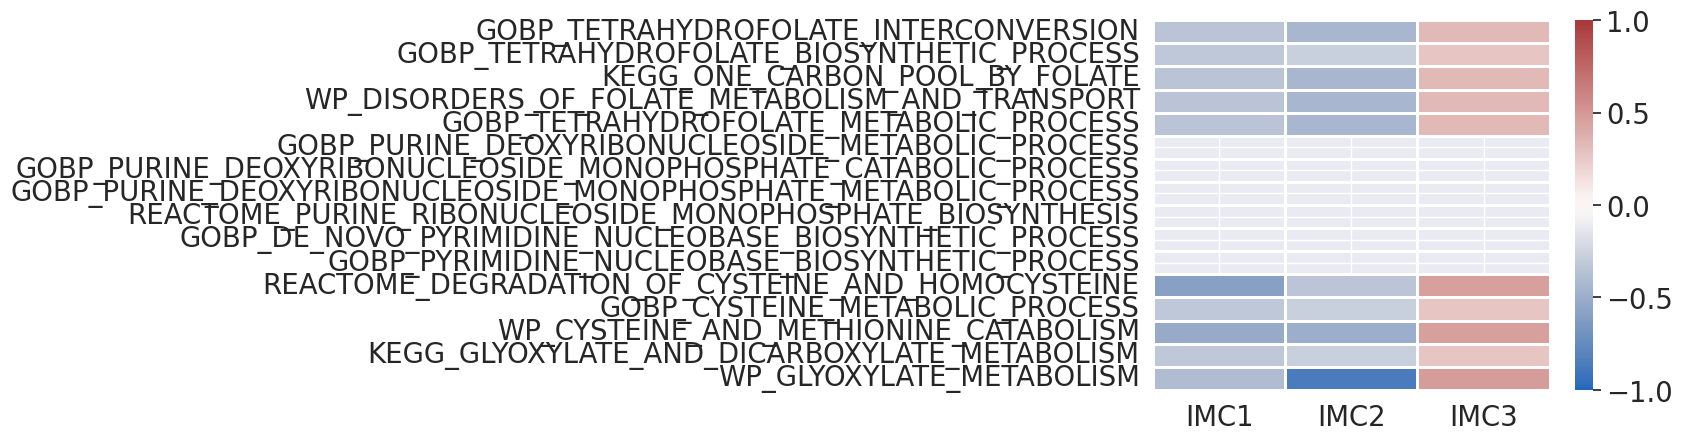

IMC1      IMC2  \
GOBP_TETRAHYDROFOLATE_INTERCONVERSION              -0.230239 -0.288343   
GOBP_TETRAHYDROFOLATE_BIOSYNTHETIC_PROCESS         -0.213923 -0.184099   
KEGG_ONE_CARBON_POOL_BY_FOLATE                     -0.230239 -0.288343   
WP_DISORDERS_OF_FOLATE_METABOLISM_AND_TRANSPORT    -0.230239 -0.288343   
GOBP_TETRAHYDROFOLATE_METABOLIC_PROCESS            -0.230239 -0.288343   
GOBP_PURINE_DEOXYRIBONUCLEOSIDE_METABOLIC_PROCESS        NaN       NaN   
GOBP_PURINE_DEOXYRIBONUCLEOSIDE_MONOPHOSPHATE_C...       NaN       NaN   
GOBP_PURINE_DEOXYRIBONUCLEOSIDE_MONOPHOSPHATE_M...       NaN       NaN   
REACTOME_PURINE_RIBONUCLEOSIDE_MONOPHOSPHATE_BI...       NaN       NaN   
GOBP_DE_NOVO_PYRIMIDINE_NUCLEOBASE_BIOSYNTHETIC...       NaN       NaN   
GOBP_PYRIMIDINE_NUCLEOBASE_BIOSYNTHETIC_PROCESS          NaN       NaN   
REACTOME_DEGRADATION_OF_CYSTEINE_AND_HOMOCYSTEINE  -0.399369 -0.226651   
GOBP_CYSTEINE_METABOLIC_PROCESS                    -0.213923 -0.184099   
WP_CYSTEINE_AND_METHIONINE_CATABOLISM              -0.348164 -0.332526   
KEGG_GLYOXYLATE_AND_DICARBOXYLATE_METABOLISM       -0.213923 -0.184099   
WP_GLYOXYLATE_METABOLISM                           -0.267830 -0.581802   

                                                        IMC3    avgIMC1  \
GOBP_TETRAHYDROFOLATE_INTERCONVERSION               0.218153   8.222722   
GOBP_TETRAHYDROFOLATE_BIOSYNTHETIC_PROCESS          0.180613  10.468982   
KEGG_ONE_CARBON_POOL_BY_FOLATE                      0.218153   8.222722   
WP_DISORDERS_OF_FOLATE_METABOLISM_AND_TRANSPORT     0.218153   8.222722   
GOBP_TETRAHYDROFOLATE_METABOLIC_PROCESS             0.218153   8.222722   
GOBP_PURINE_DEOXYRIBONUCLEOSIDE_METABOLIC_PROCESS        NaN        NaN   
GOBP_PURINE_DEOXYRIBONUCLEOSIDE_MONOPHOSPHATE_C...       NaN        NaN   
GOBP_PURINE_DEOXYRIBONUCLEOSIDE_MONOPHOSPHATE_M...       NaN        NaN   
REACTOME_PURINE_RIBONUCLEOSIDE_MONOPHOSPHATE_BI...       NaN        NaN   
GOBP_DE_NOVO_PYRIMIDINE_NUCLEOBASE_BIOSYNTHETIC...       NaN        NaN   
GOBP_PYRIMIDINE_NUCLEOBASE_BIOSYNTHETIC_PROCESS          NaN        NaN   
REACTOME_DEGRADATION_OF_CYSTEINE_AND_HOMOCYSTEINE   0.306348   9.321508   
GOBP_CYSTEINE_METABOLIC_PROCESS                     0.180613  10.468982   
WP_CYSTEINE_AND_METHIONINE_CATABOLISM               0.302620   8.823672   
KEGG_GLYOXYLATE_AND_DICARBOXYLATE_METABOLISM        0.180613  10.468982   
WP_GLYOXYLATE_METABOLISM                            0.318682  11.687823   

                                                      avgIMC2    avgIMC3  \
GOBP_TETRAHYDROFOLATE_INTERCONVERSION                8.179040   8.559813   
GOBP_TETRAHYDROFOLATE_BIOSYNTHETIC_PROCESS          10.486137  10.695923   
KEGG_ONE_CARBON_POOL_BY_FOLATE                       8.179040   8.559813   
WP_DISORDERS_OF_FOLATE_METABOLISM_AND_TRANSPORT      8.179040   8.559813   
GOBP_TETRAHYDROFOLATE_METABOLIC_PROCESS              8.179040   8.559813   
GOBP_PURINE_DEOXYRIBONUCLEOSIDE_METABOLIC_PROCESS         NaN        NaN   
GOBP_PURINE_DEOXYRIBONUCLEOSIDE_MONOPHOSPHATE_C...        NaN        NaN   
GOBP_PURINE_DEOXYRIBONUCLEOSIDE_MONOPHOSPHATE_M...        NaN        NaN   
REACTOME_PURINE_RIBONUCLEOSIDE_MONOPHOSPHATE_BI...        NaN        NaN   
GOBP_DE_NOVO_PYRIMIDINE_NUCLEOBASE_BIOSYNTHETIC...        NaN        NaN   
GOBP_PYRIMIDINE_NUCLEOBASE_BIOSYNTHETIC_PROCESS           NaN        NaN   
REACTOME_DEGRADATION_OF_CYSTEINE_AND_HOMOCYSTEINE    9.417551   9.713937   
GOBP_CYSTEINE_METABOLIC_PROCESS                     10.486137  10.695923   
WP_CYSTEINE_AND_METHIONINE_CATABOLISM                8.835302   9.307644   
KEGG_GLYOXYLATE_AND_DICARBOXYLATE_METABOLISM        10.486137  10.695923   
WP_GLYOXYLATE_METABOLISM                            11.577694  11.893549   

                                                     stdIMC1   stdIMC2  \
GOBP_TETRAHYDROFOLATE_INTERCONVERSION               0.761794  0.738146   
GOBP_TETRAHYDROFOLATE_BIOSYNTHETIC_PROCESS          0.567332  0.589720   
KEGG_O

In [45]:
res3=firmaIMC.Plot_HeatMap_PATHS_IMC_stat(df_allinfo_GSE1,dict_gens_Coincidents_IMC3,nom_figure='figaux_IMC3',factorAug=1.5,typeFig='')
res3

### Analisi Gens de la Glicòlisi pel GSE1

In [46]:
def Plot_HeatMap_IMC_llarg(df_allinfo_GSE1,sel_gens,factorAug=1.5,titulo='',nom_figure='figure.png'):
    """Bar plot dels gens en llista sel_gens, respecte a col prediction"""
    import seaborn as sns
    #global mean_ALL, mean_IMC1,pd_mean_IMC
    # Pel format
    #if typeFig=='Frontiers':
    figure(figsize=(4, 40), dpi=100)
    #else:
    #    plt.suptitle(titulo)
    
    
    gens_i_prediction=sel_gens+['prediction']

    index_cluster1=df_allinfo_GSE1[gens_i_prediction]['prediction']=='Cluster_1'
    index_cluster2=df_allinfo_GSE1[gens_i_prediction]['prediction']=='Cluster_2'
    index_cluster3=df_allinfo_GSE1[gens_i_prediction]['prediction']=='Cluster_3'

    mean_IMC1=df_allinfo_GSE1[index_cluster1][sel_gens].mean(axis=0)
    mean_IMC2=df_allinfo_GSE1[index_cluster2][sel_gens].mean(axis=0)
    mean_IMC3=df_allinfo_GSE1[index_cluster3][sel_gens].mean(axis=0)
   
    mean_ALL=df_allinfo_GSE1[sel_gens].mean(axis=0)
    std_ALL=df_allinfo_GSE1[sel_gens].std(axis=0)
    
    pd_mean_IMC=pd.DataFrame()
    pd_mean_IMC['IMC1']=(mean_IMC1[sel_gens].values-mean_ALL[sel_gens].values)/std_ALL[sel_gens]
    pd_mean_IMC['IMC2']=(mean_IMC2[sel_gens].values-mean_ALL[sel_gens].values)/std_ALL[sel_gens]
    pd_mean_IMC['IMC3']=(mean_IMC3[sel_gens].values-mean_ALL[sel_gens].values)/std_ALL[sel_gens]
    #HeatMap
    sns.heatmap(pd_mean_IMC*factorAug,
                linewidth=1, linecolor='w',
            cmap='vlag',vmin=-1,vmax=1,cbar=True,xticklabels=True, yticklabels=True)

    #plt.title('IMC1             IMC2               IMC3')
    plt.ylabel('')
    plt.savefig(nom_figure,dpi=600)
    plt.show()
    return pd_mean_IMC

In [47]:
#gens_glyco_GSE1=dict_gens_Coincidents_GSE1['WP Glycolysis']
#gens_glyco_GSE1=dict_gens_Coincidents_metabol_GSE1['Glycolysis']
#Plot_HeatMap_IMC_llarg(df_allinfo_GSE1,gens_glyco_GSE1)

## GSE1 per dpMMR

In [48]:
#Deficient mismatch repair (dMMR) or microsatellite instability high (MSI-H) accounts for 4-5% in metastatic colorectal cancer (mCRC).
# microsatellite instability (MSI).
# The dMMR/MSI-H status was reported to be a predictive marker for adjuvant chemotherapy. 
# proficient MMR (pMMR) tumors.


In [49]:
index_pMMR=df_allinfo_GSE1['mmr_status']=="pMMR"
index_dMMR=df_allinfo_GSE1['mmr_status']=="dMMR"
print("Total: pMMR:",np.sum(index_pMMR))
print("Total: dMMR:",np.sum(index_dMMR))

Total: pMMR: 489
Total: dMMR: 86


In [50]:
# Classificació de IMC per pMMR o per dMMR

pd.crosstab(index=df_allinfo_GSE1["prediction"], columns= df_allinfo_GSE1["mmr_status" ], margins=True)

mmr_status  dMMR  pMMR  All
prediction                 
Cluster_1     30   136  166
Cluster_2      3    80   83
Cluster_3     53   273  326
All           86   489  575

### Pels 10 gens

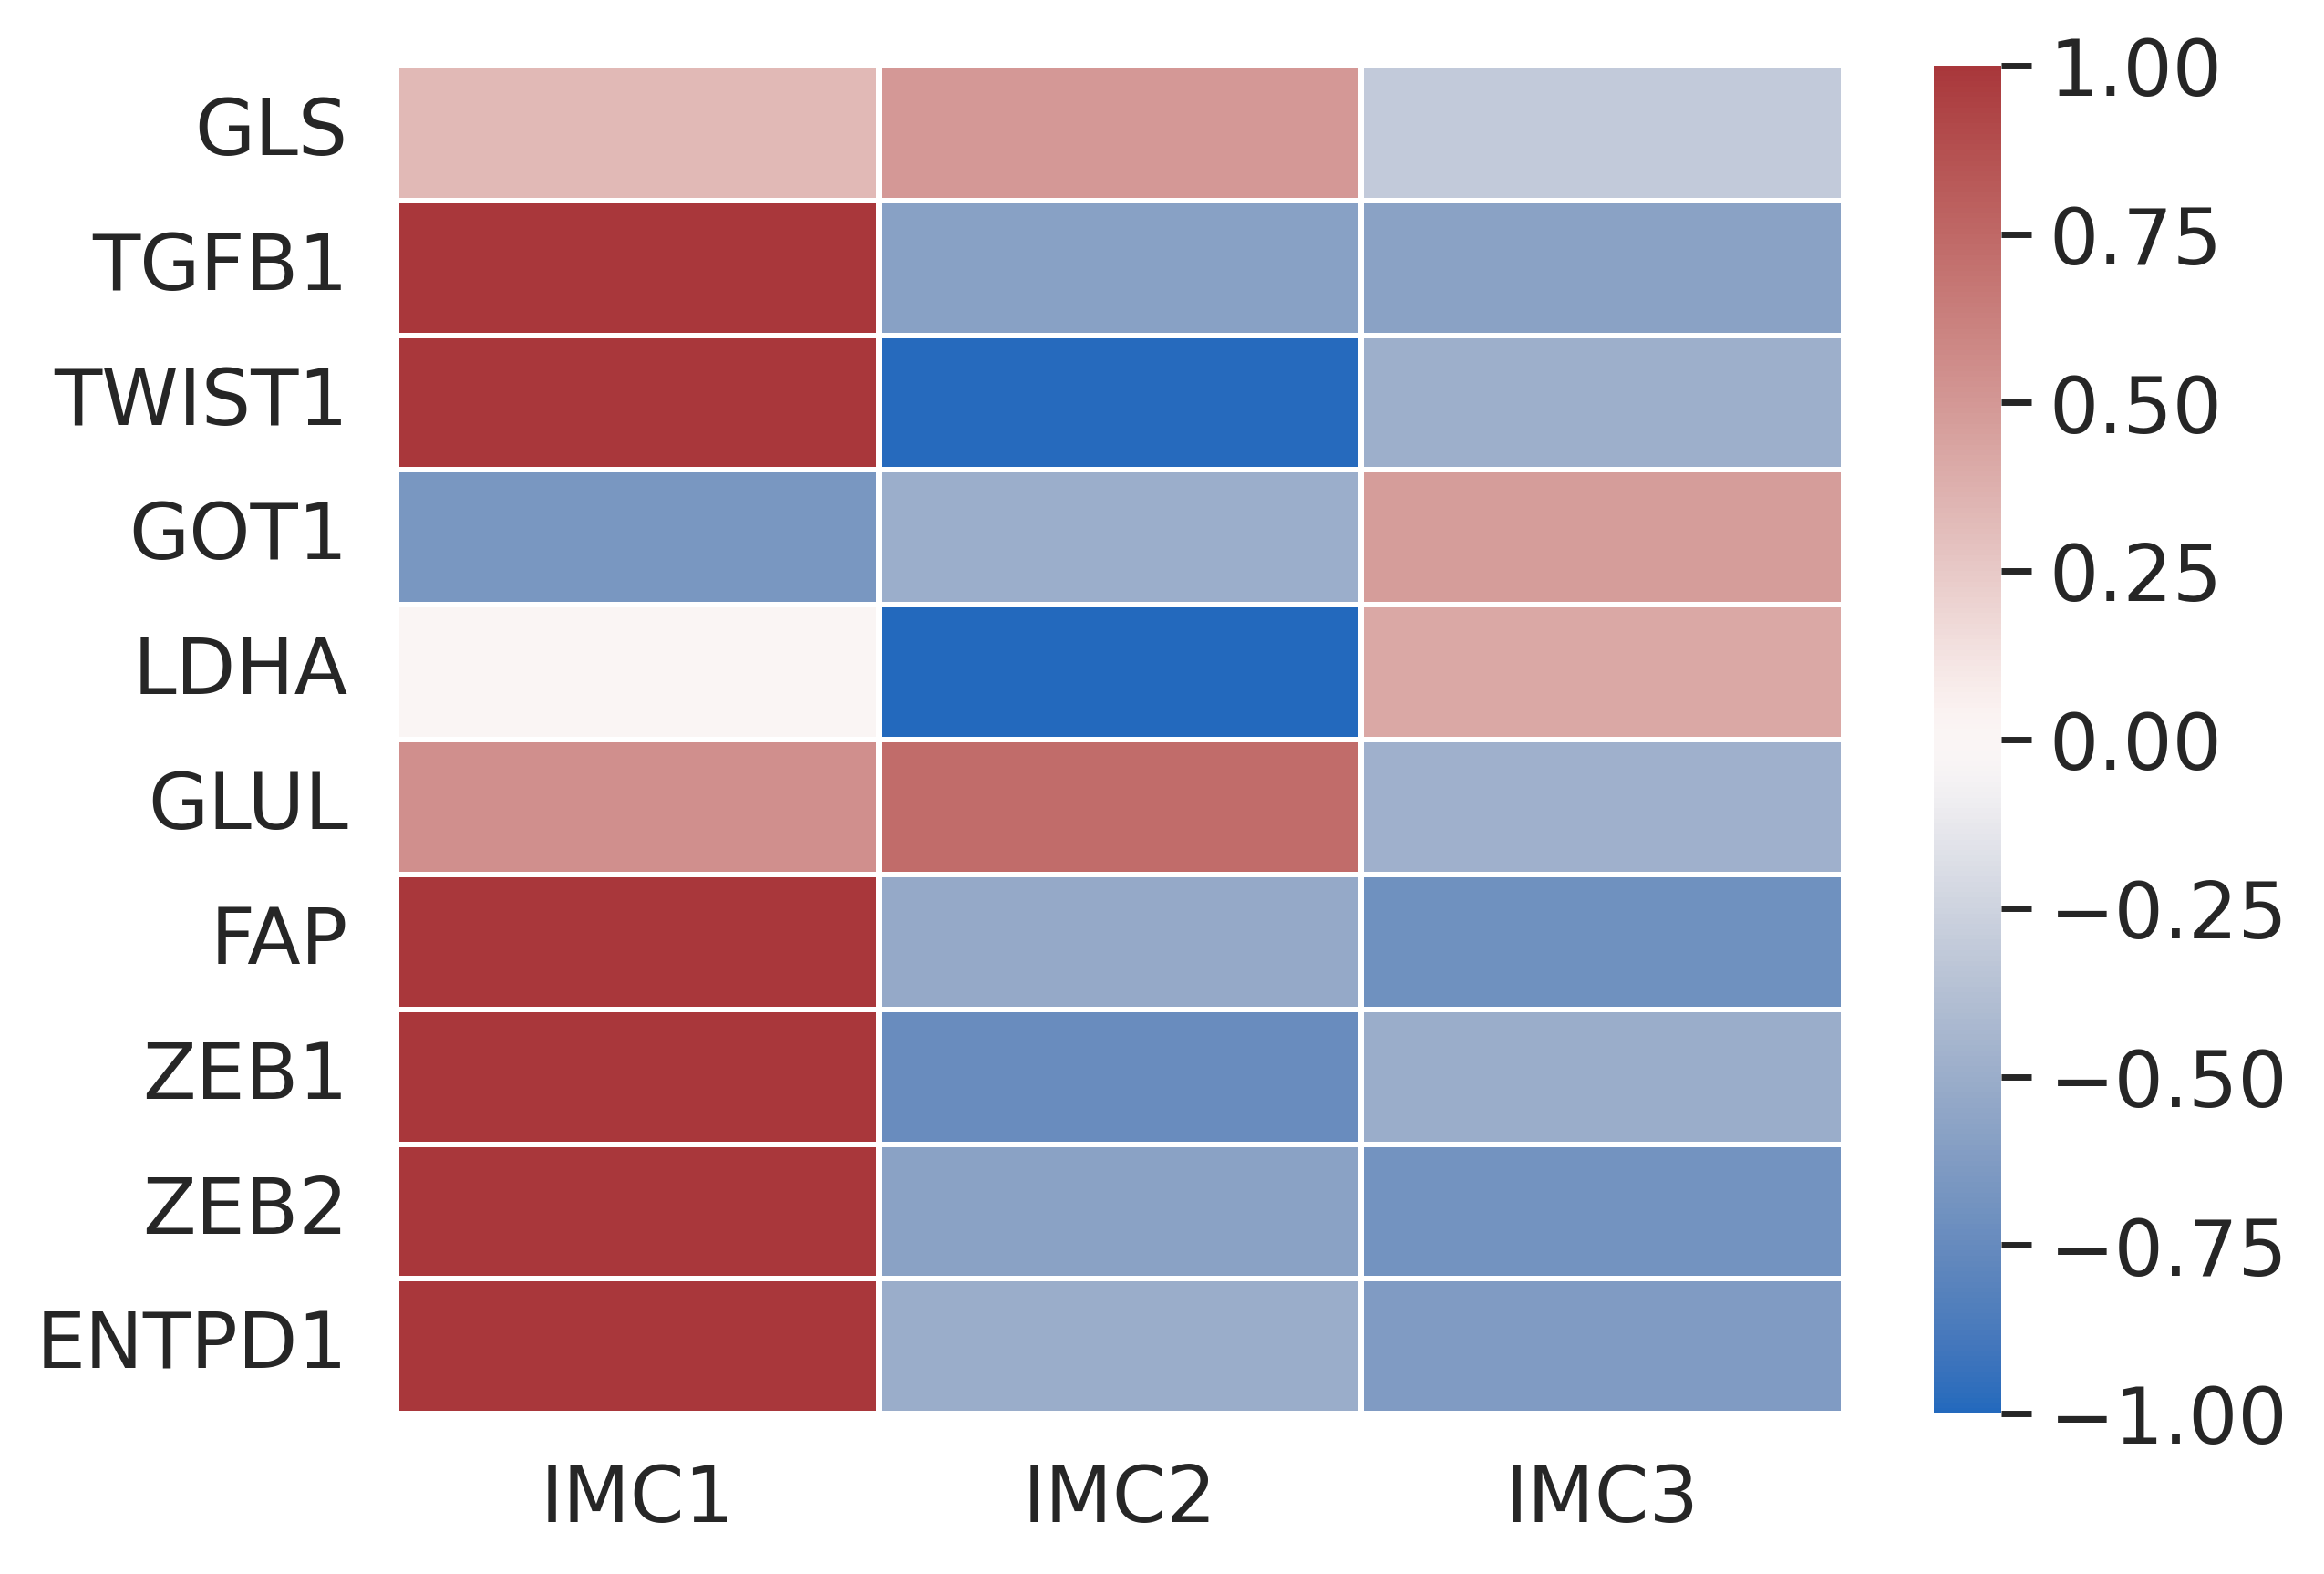

IMC1      IMC2      IMC3
GLS     0.218997  0.331375 -0.206204
TGFB1   1.009068 -0.391493 -0.387962
TWIST1  1.042038 -0.659056 -0.325980
GOT1   -0.442306 -0.331087  0.317365
LDHA    0.002161 -0.958520  0.279808
GLUL    0.360552  0.486904 -0.322298
FAP     1.154126 -0.352523 -0.471646
ZEB1    0.963006 -0.492198 -0.335505
ZEB2    1.154529 -0.387005 -0.461742
ENTPD1  1.036952 -0.336214 -0.418053

In [51]:
firmaIMC.Plot_HeatMap_IMC(df_allinfo_GSE1[index_pMMR],selected_gens)

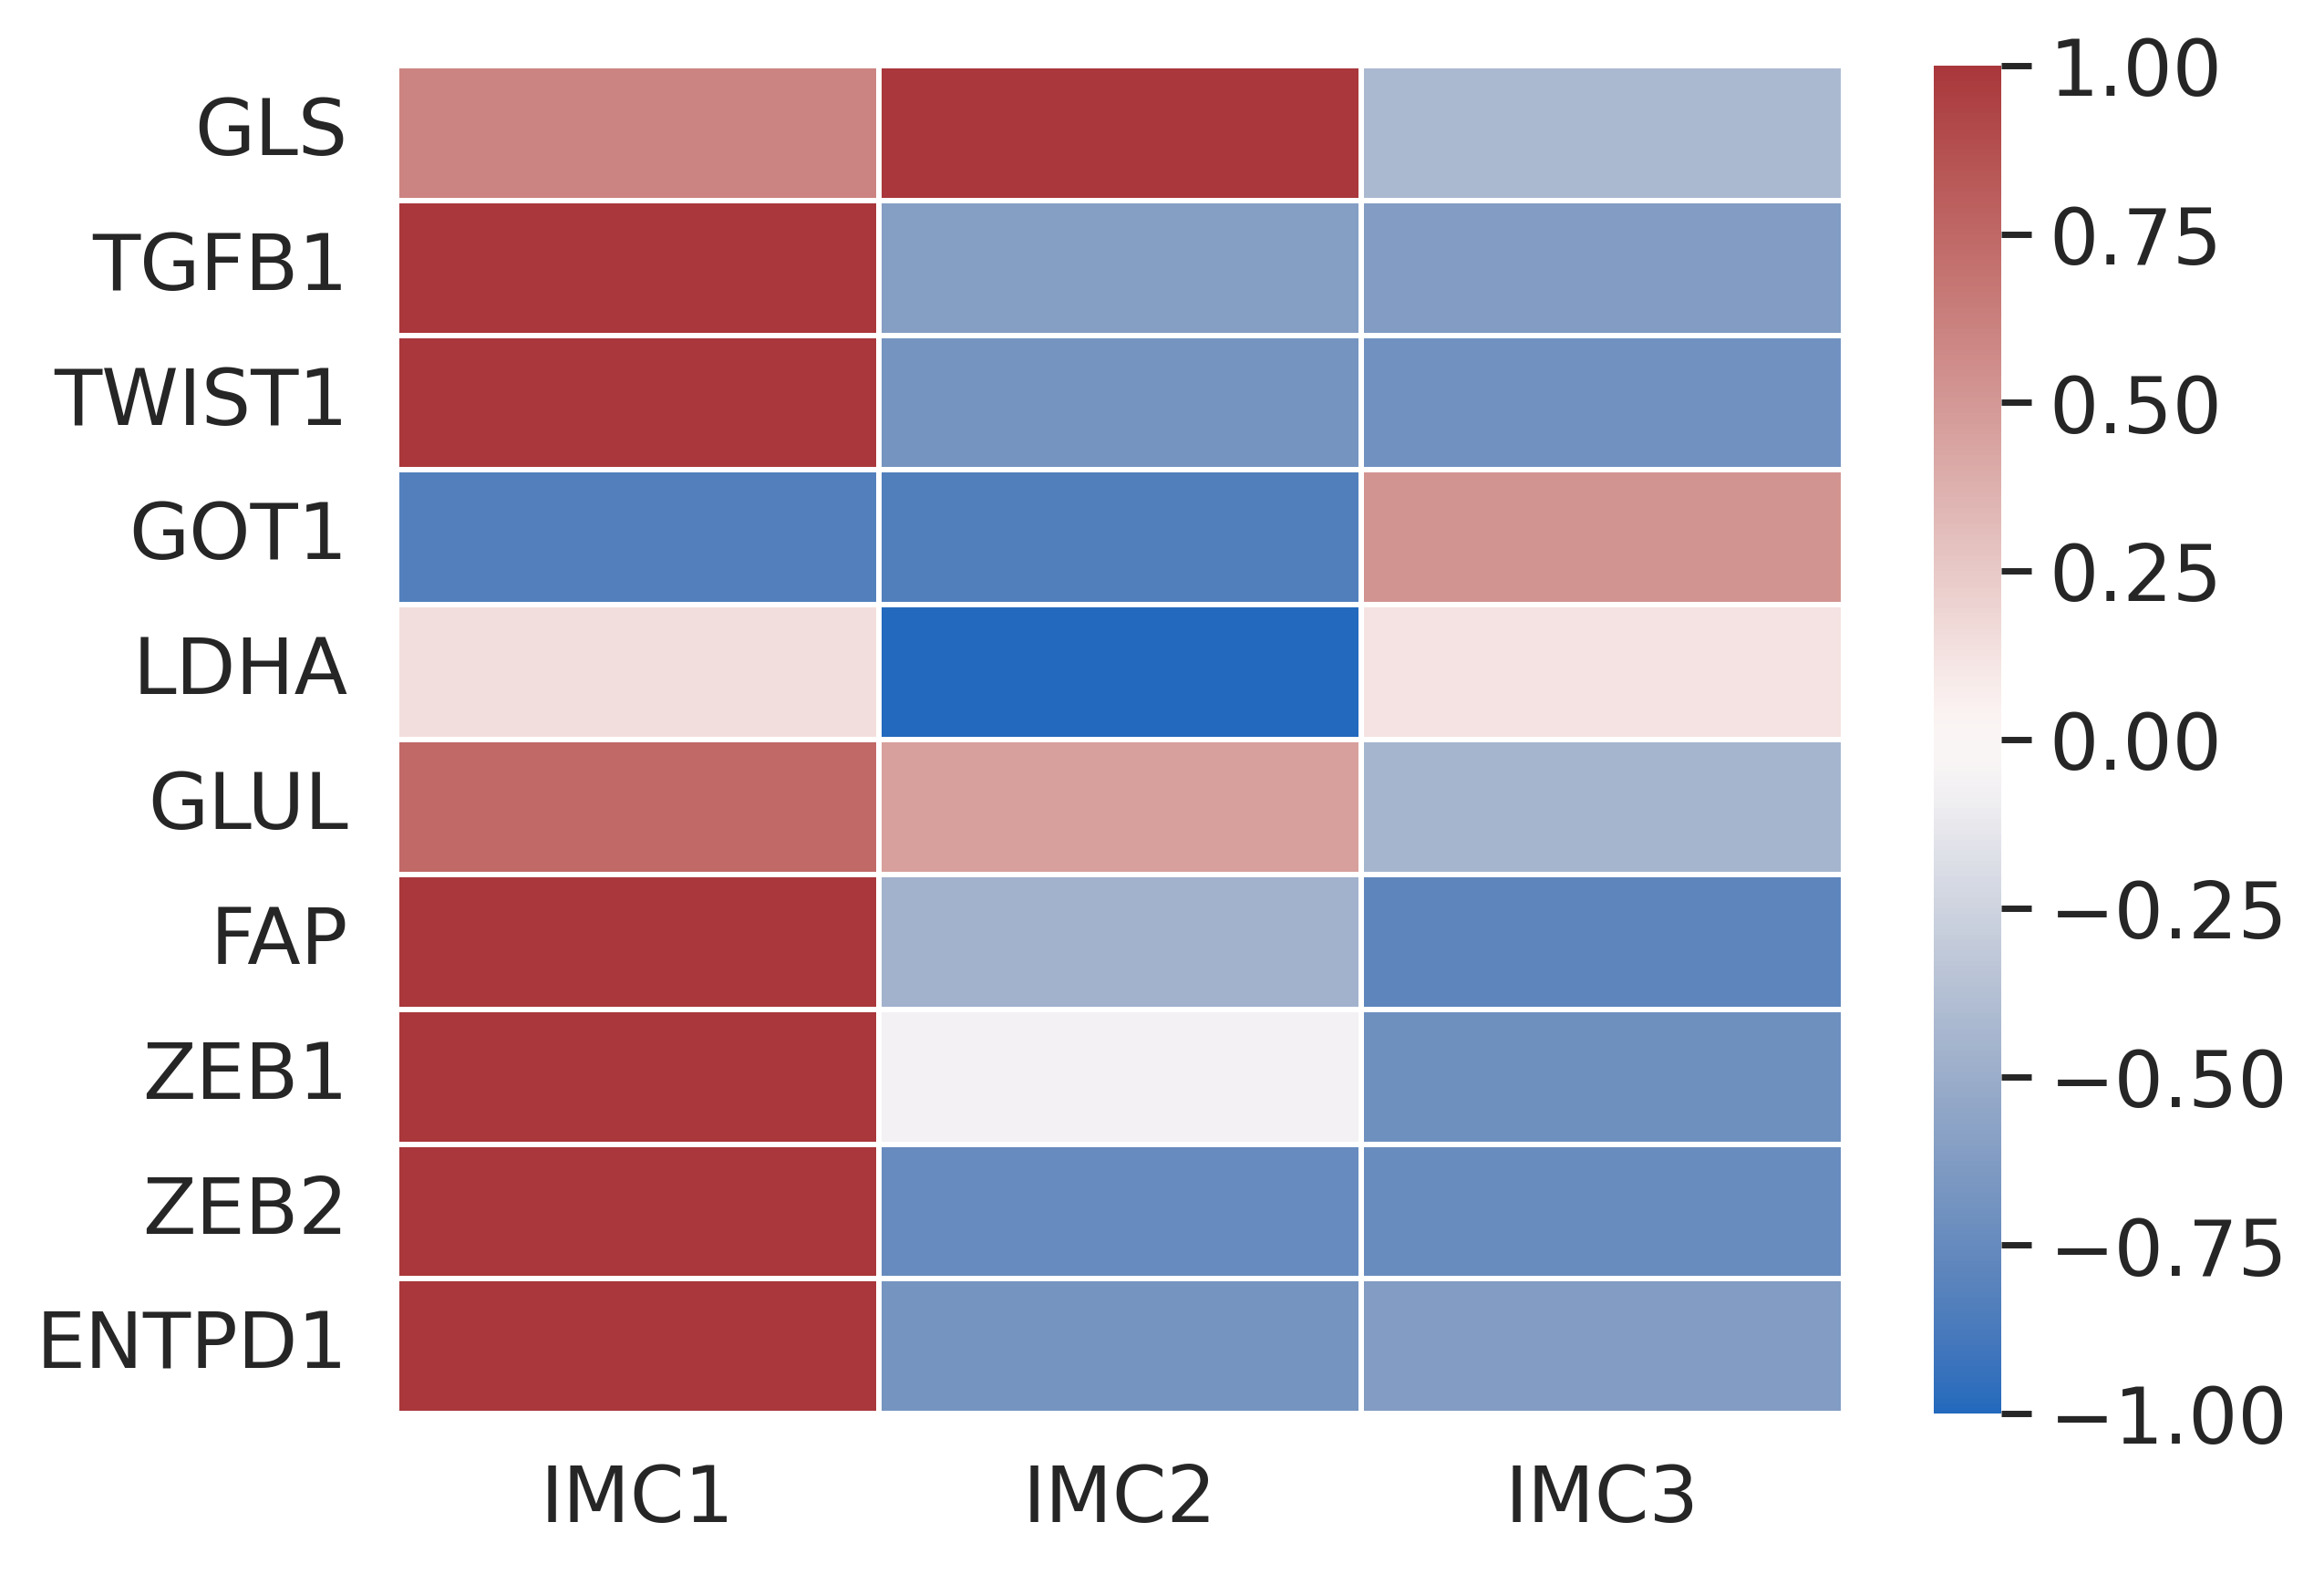

IMC1      IMC2      IMC3
GLS     0.401609  0.897596 -0.278133
TGFB1   0.773658 -0.404518 -0.415023
TWIST1  0.873171 -0.458048 -0.468320
GOT1   -0.555081 -0.558600  0.345815
LDHA    0.096727 -2.399715  0.081082
GLUL    0.495437  0.304410 -0.297667
FAP     0.954072 -0.311966 -0.522382
ZEB1    0.849211 -0.042296 -0.478291
ZEB2    0.918494 -0.499759 -0.491614
ENTPD1  0.774304 -0.456657 -0.412437

In [52]:
firmaIMC.Plot_HeatMap_IMC(df_allinfo_GSE1[index_dMMR],selected_gens)

### Pels PATHWAYS
### Fig4C

Nom path: CAF, num. gens:1
Nom path: Hypoxia, num. gens:8
Nom path: Hexosaminidase, num. gens:0
Nom path: EMT, num. gens:7
Nom path: TGFbeta signaling, num. gens:7
Nom path: Angiogenesis, num. gens:1
Nom path: ECM interactions, num. gens:5
Nom path: Colon cancer MSI up, num. gens:0
Nom path: Imflammatory resp., num. gens:2
Nom path: IFN gamma resp., num. gens:0
Nom path: IL6 signaling, num. gens:0
Nom path: T-cytotoxic pathway, num. gens:0
Nom path: PD1, num. gens:1


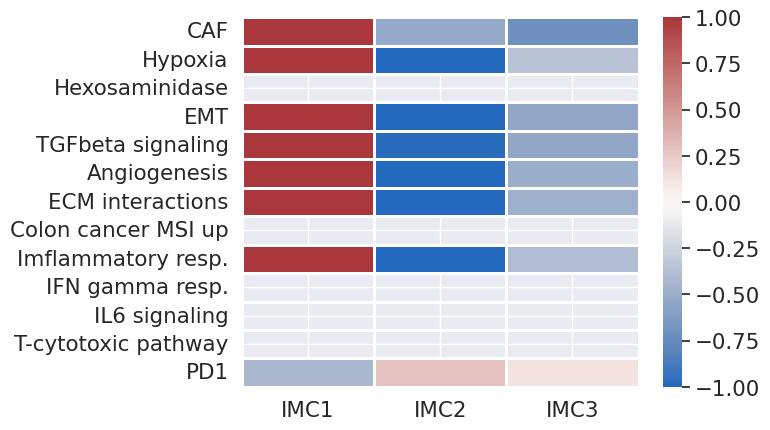

IMC1      IMC2      IMC3    avgIMC1    avgIMC2  \
CAF                  1.155308 -0.352884 -0.472129   8.437413   5.325691   
Hypoxia              0.972514 -0.841023 -0.238022   9.809781   8.546460   
Hexosaminidase            NaN       NaN       NaN        NaN        NaN   
EMT                  1.136528 -0.689010 -0.364275   9.613671   7.081005   
TGFbeta signaling    1.110954 -0.653200 -0.362028   7.793500   6.508879   
Angiogenesis         1.049812 -0.664943 -0.328128  11.249930   8.720096   
ECM interactions     1.053870 -0.693891 -0.321667   9.993733   7.262216   
Colon cancer MSI up       NaN       NaN       NaN        NaN        NaN   
Imflammatory resp.   0.945980 -0.710116 -0.263165  10.345976   7.234378   
IFN gamma resp.           NaN       NaN       NaN        NaN        NaN   
IL6 signaling             NaN       NaN       NaN        NaN        NaN   
T-cytotoxic pathway       NaN       NaN       NaN        NaN        NaN   
PD1                 -0.281101  0.188901  0.084680  11.838371  12.065575   

                       avgIMC3   stdIMC1   stdIMC2   stdIMC3    stdALL  
CAF                   5.079664  1.303802  1.540676  1.465532  2.063213  
Hypoxia               8.966515  0.477250  0.673147  0.515987  0.696606  
Hexosaminidase             NaN       NaN       NaN       NaN       NaN  
EMT                   7.531528  0.780085  1.211996  0.975862  1.387353  
TGFbeta signaling     6.720905  0.335761  0.683479  0.543059  0.728180  
Angiogenesis          9.217010  0.806779  1.460690  1.112594  1.475332  
ECM interactions      7.843952  0.803450  1.504255  1.200691  1.562867  
Colon cancer MSI up        NaN       NaN       NaN       NaN       NaN  
Imflammatory resp.    8.074144  1.024960  1.904229  1.548372  1.878876  
IFN gamma resp.            NaN       NaN       NaN       NaN       NaN  
IL6 signaling              NaN       NaN       NaN       NaN       NaN  
T-cytotoxic pathway        NaN       NaN       NaN       NaN       NaN  
PD1                  12.015194  0.481606  0.462744  0.476411  0.483412

In [53]:
#pMMR
firmaIMC.Plot_HeatMap_PATHS_IMC_stat(df_allinfo_GSE1[index_pMMR],dict_gens_Coincidents_estroma_GSE1,nom_figure='Fig4C_pMMR.png',factorAug=1.5,typeFig='')

In [54]:
pd_ANOVA_PATHWAY_Fig4C_pMMR=firmaIMC.Tukey_HeadMap_PATHS_IMC(df_allinfo_GSE1[index_pMMR],dict_gens_Coincidents_estroma_GSE1)
print('ANOVA_PATHWAYS')
taula=firmaIMC.print_ANOVA2(pd_ANOVA_PATHWAY_Fig4C_pMMR)
taula.to_excel("Anova_Fig4C_pMMR.xlsx",sheet_name='Fig4C_pMMR') 
taula

Nom path: CAF, num. gens:1
F_onewayResult(statistic=np.float64(259.09950284056197), pvalue=np.float64(2.5727950151026835e-77))
   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1    group2  meandiff p-adj   lower   upper  reject
----------------------------------------------------------
Cluster_1 Cluster_2  -3.1117    0.0 -3.5886 -2.6348   True
Cluster_1 Cluster_3  -3.3577    0.0  -3.713 -3.0025   True
Cluster_2 Cluster_3   -0.246 0.3715 -0.6763  0.1843  False
----------------------------------------------------------
Nom path: Hypoxia, num. gens:8
F_onewayResult(statistic=np.float64(169.13399318632622), pvalue=np.float64(1.7700449365898046e-56))
   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
  group1    group2  meandiff p-adj  lower   upper  reject
---------------------------------------------------------
Cluster_1 Cluster_2  -1.2633   0.0  -1.441 -1.0856   True
Cluster_1 Cluster_3  -0.8433   0.0 -0.9757 -0.7109   True
Cluster_2 Cluster_3   0.4201   0.0  0.2

/home/smadurga/RecercaGit/IMMETCOLS_GSE1_GSE2_TCGA/FIGURES_IMMETCOLS_Bioinformatics/firmaIMC_v3.py:416: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pd_Tabla['IMC1']=[pd_ANOVA.loc[0][i] for i in range(num_gens)]
/home/smadurga/RecercaGit/IMMETCOLS_GSE1_GSE2_TCGA/FIGURES_IMMETCOLS_Bioinformatics/firmaIMC_v3.py:417: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pd_Tabla['IMC2']=[pd_ANOVA.loc[1][i] for i in range(num_gens)]
/home/smadurga/RecercaGit/IMMETCOLS_GSE1_GSE2_TCGA/FIGURES_IMMETCOLS_Bioinformatics/firmaIMC_v3.py:418: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future versio

GeneName      IMC1      IMC2      IMC3  F_oneway      P_oneway  \
0                   CAF  1.155308 -0.352884 -0.472129   259.100  2.572795e-77   
1               Hypoxia  0.972514 -0.841023 -0.238022   169.134  1.770045e-56   
2        Hexosaminidase       NaN       NaN       NaN       NaN           NaN   
3                   EMT  1.136528 -0.689010 -0.364275   253.925  3.188879e-76   
4     TGFbeta signaling  1.110954 -0.653200 -0.362028   229.977  5.202689e-71   
5          Angiogenesis  1.049812 -0.664943 -0.328128   190.125  1.012505e-61   
6      ECM interactions  1.053870 -0.693891 -0.321667   195.174  6.055987e-63   
7   Colon cancer MSI up       NaN       NaN       NaN       NaN           NaN   
8    Imflammatory resp.  0.945980 -0.710116 -0.263165   142.741  1.707941e-49   
9       IFN gamma resp.       NaN       NaN       NaN       NaN           NaN   
10        IL6 signaling       NaN       NaN       NaN       NaN           NaN   
11  T-cytotoxic pathway       NaN       NaN       NaN       NaN           NaN   
12                  PD1 -0.281101  0.188901  0.084680     7.986  3.869210e-04   

    p-Tukey12  p-Tukey13  p-Tukey23  compara1  compara2  compara3  
0       0.000      0.000      0.371         1         0         0  
1       0.000      0.000      0.000         1         1         1  
2         NaN        NaN        NaN         0         0         0  
3       0.000      0.000      0.001         1         1         1  
4       0.000      0.000      0.004         1         1         1  
5       0.000      0.000      0.001         1         1         1  
6       0.000      0.000      0.000         1         1         1  
7         NaN        NaN        NaN         0         0         0  
8       0.000      0.000      0.000         1         1         1  
9         NaN        NaN        NaN         0         0         0  
10        NaN        NaN        NaN         0         0         0  
11        NaN        NaN        NaN         0         0         0  
12      0.002      0.001      0.684         1         0         0

Nom path: CAF, num. gens:1
Nom path: Hypoxia, num. gens:8
Nom path: Hexosaminidase, num. gens:0
Nom path: EMT, num. gens:7
Nom path: TGFbeta signaling, num. gens:7
Nom path: Angiogenesis, num. gens:1
Nom path: ECM interactions, num. gens:5
Nom path: Colon cancer MSI up, num. gens:0
Nom path: Imflammatory resp., num. gens:2
Nom path: IFN gamma resp., num. gens:0
Nom path: IL6 signaling, num. gens:0
Nom path: T-cytotoxic pathway, num. gens:0
Nom path: PD1, num. gens:1


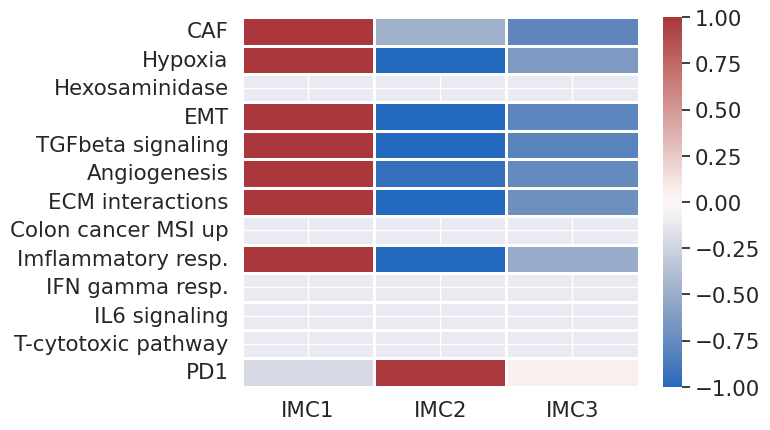

IMC1      IMC2      IMC3    avgIMC1    avgIMC2  \
CAF                  0.959668 -0.313796 -0.525446   8.222851   6.071359   
Hypoxia              0.896828 -1.461508 -0.424912  10.074800   8.660701   
Hexosaminidase            NaN       NaN       NaN        NaN        NaN   
EMT                  1.012298 -0.747619 -0.530681   9.507731   7.731384   
TGFbeta signaling    1.022238 -0.733969 -0.537080   7.911956   6.921655   
Angiogenesis         0.948014 -0.633540 -0.500751  10.910347   9.275489   
ECM interactions     0.911618 -0.740750 -0.474081   9.787059   8.083207   
Colon cancer MSI up       NaN       NaN       NaN        NaN        NaN   
Imflammatory resp.   0.680861 -0.812143 -0.339423  10.019570   8.221605   
IFN gamma resp.           NaN       NaN       NaN        NaN        NaN   
IL6 signaling             NaN       NaN       NaN        NaN        NaN   
T-cytotoxic pathway       NaN       NaN       NaN        NaN        NaN   
PD1                 -0.137885  0.653561  0.041054  11.889096  12.155076   

                       avgIMC3   stdIMC1   stdIMC2   stdIMC3    stdALL  
CAF                   5.713779  0.926212  1.346723  1.323401  1.689481  
Hypoxia               9.282262  0.354205  0.358670  0.482738  0.599617  
Hexosaminidase             NaN       NaN       NaN       NaN       NaN  
EMT                   7.950347  0.548064  0.465977  0.748801  1.009335  
TGFbeta signaling     7.032678  0.276663  0.161742  0.426204  0.563886  
Angiogenesis          9.412753  0.617628  0.401311  0.820380  1.033703  
ECM interactions      8.358185  0.671759  0.230779  0.833493  1.031157  
Colon cancer MSI up        NaN       NaN       NaN       NaN       NaN  
Imflammatory resp.    8.790882  0.895989  0.366997  1.135528  1.204261  
IFN gamma resp.            NaN       NaN       NaN       NaN       NaN  
IL6 signaling              NaN       NaN       NaN       NaN       NaN  
T-cytotoxic pathway        NaN       NaN       NaN       NaN       NaN  
PD1                  11.949231  0.287819  0.220297  0.359848  0.336068

In [55]:
# dMMR
firmaIMC.Plot_HeatMap_PATHS_IMC_stat(df_allinfo_GSE1[index_dMMR],dict_gens_Coincidents_estroma_GSE1,nom_figure='Fig4C_dMMR',factorAug=1.5,typeFig='')

In [56]:
pd_ANOVA_PATHWAY_Fig4C_dMMR=firmaIMC.Tukey_HeadMap_PATHS_IMC(df_allinfo_GSE1[index_dMMR],dict_gens_Coincidents_estroma_GSE1)
print('ANOVA_PATHWAYS')
taula=firmaIMC.print_ANOVA2(pd_ANOVA_PATHWAY_Fig4C_dMMR)
taula.to_excel("Anova_Fig4C_dMMR.xlsx",sheet_name='Fig4C_dMMR') 
taula

Nom path: CAF, num. gens:1
F_onewayResult(statistic=np.float64(40.65403636410636), pvalue=np.float64(4.919221957333188e-13))
   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1    group2  meandiff p-adj   lower   upper  reject
----------------------------------------------------------
Cluster_1 Cluster_2  -2.1515 0.0129 -3.9178 -0.3852   True
Cluster_1 Cluster_3  -2.5091    0.0 -3.1755 -1.8426   True
Cluster_2 Cluster_3  -0.3576 0.8749 -2.0887  1.3735  False
----------------------------------------------------------
Nom path: Hypoxia, num. gens:8
F_onewayResult(statistic=np.float64(36.266517648340056), pvalue=np.float64(4.798449858922904e-12))
   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1    group2  meandiff p-adj   lower   upper  reject
----------------------------------------------------------
Cluster_1 Cluster_2  -1.4141    0.0 -2.0584 -0.7698   True
Cluster_1 Cluster_3  -0.7925    0.0 -1.0357 -0.5494   True
Cluster_2 Cluster_3   0.6216 0.0547 -

/home/smadurga/RecercaGit/IMMETCOLS_GSE1_GSE2_TCGA/FIGURES_IMMETCOLS_Bioinformatics/firmaIMC_v3.py:416: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pd_Tabla['IMC1']=[pd_ANOVA.loc[0][i] for i in range(num_gens)]
/home/smadurga/RecercaGit/IMMETCOLS_GSE1_GSE2_TCGA/FIGURES_IMMETCOLS_Bioinformatics/firmaIMC_v3.py:417: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pd_Tabla['IMC2']=[pd_ANOVA.loc[1][i] for i in range(num_gens)]
/home/smadurga/RecercaGit/IMMETCOLS_GSE1_GSE2_TCGA/FIGURES_IMMETCOLS_Bioinformatics/firmaIMC_v3.py:418: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future versio

GeneName      IMC1      IMC2      IMC3  F_oneway      P_oneway  \
0                   CAF  0.959668 -0.313796 -0.525446    40.654  4.919222e-13   
1               Hypoxia  0.896828 -1.461508 -0.424912    36.267  4.798450e-12   
2        Hexosaminidase       NaN       NaN       NaN       NaN           NaN   
3                   EMT  1.012298 -0.747619 -0.530681    50.830  3.865833e-15   
4     TGFbeta signaling  1.022238 -0.733969 -0.537080    53.052  1.441293e-15   
5          Angiogenesis  0.948014 -0.633540 -0.500751    38.623  1.390318e-12   
6      ECM interactions  0.911618 -0.740750 -0.474081    33.620  2.018820e-11   
7   Colon cancer MSI up       NaN       NaN       NaN       NaN           NaN   
8    Imflammatory resp.  0.680861 -0.812143 -0.339423    14.259  4.754069e-06   
9       IFN gamma resp.       NaN       NaN       NaN       NaN           NaN   
10        IL6 signaling       NaN       NaN       NaN       NaN           NaN   
11  T-cytotoxic pathway       NaN       NaN       NaN       NaN           NaN   
12                  PD1 -0.137885  0.653561  0.041054     0.958  3.877325e-01   

    p-Tukey12  p-Tukey13  p-Tukey23  compara1  compara2  compara3  
0       0.013      0.000      0.875         1         0         0  
1       0.000      0.000      0.055         1         0         0  
2         NaN        NaN        NaN         0         0         0  
3       0.000      0.000      0.854         1         0         0  
4       0.000      0.000      0.875         1         0         0  
5       0.002      0.000      0.950         1         0         0  
6       0.002      0.000      0.824         1         0         0  
7         NaN        NaN        NaN         0         0         0  
8       0.017      0.000      0.637         1         0         0  
9         NaN        NaN        NaN         0         0         0  
10        NaN        NaN        NaN         0         0         0  
11        NaN        NaN        NaN         0         0         0  
12      0.400      0.717      0.563         0         0         0

## GSE1 per KRAS

In [57]:
df_allinfo_GSE1[ ['KRAS_mut','KRAS_mut_dna','KRAS_mut_prot','BRAF_mut','BRAF_mut_dna','BRAF_mut_prot'] ]

KRAS_mut KRAS_mut_dna KRAS_mut_prot BRAF_mut BRAF_mut_dna BRAF_mut_prot
0         NaN          NaN           NaN      NaN          NaN           NaN
1         NaN          NaN           NaN      NaN          NaN           NaN
2         NaN          NaN           NaN      NaN          NaN           NaN
3         NaN          NaN           NaN      NaN          NaN           NaN
4         NaN          NaN           NaN      NaN          NaN           NaN
...       ...          ...           ...      ...          ...           ...
1323        M      c.35G>A        p.G12D       WT          NaN           NaN
1324       WT          NaN           NaN       WT          NaN           NaN
1325       WT          NaN           NaN       WT          NaN           NaN
1326       WT          NaN           NaN       WT          NaN           NaN
1327        M      c.35G>T        p.G12V       WT          NaN           NaN

[1328 rows x 6 columns]

In [58]:
index_KRAS_M=df_allinfo_GSE1['KRAS_mut']=="M"
index_BRAF_M=df_allinfo_GSE1['BRAF_mut']=="M"

index_2WT=((df_allinfo_GSE1['KRAS_mut']=="WT") & (df_allinfo_GSE1['BRAF_mut']=="WT") )

print("Total: 2WT:",np.sum(index_2WT))
print("Total: KRAS_M:",np.sum(index_KRAS_M))
print("Total: BRAF_M:",np.sum(index_BRAF_M))


Total: 2WT: 283
Total: KRAS_M: 238
Total: BRAF_M: 57


# TCGA set

In [59]:
!ls /disc/Recerca2/Firma_Cancer_Colonorectal_HD/


ls: cannot access '/disc/Recerca2/Firma_Cancer_Colonorectal_HD/': No such file or directory


In [60]:
path_TCGA='/disc/Recerca2/Firma_Cancer_Colonorectal_HD/'

path_TCGA="TCGA/"

#pd_gens_TCGA=pd.read_csv(path_TCGA+'Results_TCCA_Carles/tcga_only_tumor/vst_coad_only_tumor_samples.csv',header=0 , sep=',')
pd_gens_TCGA=pd.read_csv(path_TCGA+'TCGA_vst_coad_only_tumor_samples.csv',header=0 , sep=',')
#Drop extra numeric colmuns from genees as they might cause issues
pd_gens_TCGA=pd_gens_TCGA.drop(['NCBI.gene.ID', 'Unnamed: 0','Unnamed: 1','Gene.stable.ID','Gene.description'], axis=1)
pd_gens_TCGA_new = pd_gens_TCGA.set_index('Gene.name').transpose()
pd_gens_TCGA_new.index.name = 'Unnamed: 0'      # Per tenir el mateix nom de index per unir


#pd_IMC_cms_TCGA=pd.read_csv(path_TCGA+"Results_TCCA_Carles/tcga_only_tumor/clusters_cms_colon_tcga_only_tumor.csv")
pd_IMC_cms_TCGA=pd.read_csv(path_TCGA+"TCGA_clusters_cms_colon_tcga_only_tumor.csv")


pd_IMC_cms_TCGA.drop(columns=['Unnamed: 0'],inplace=True)  
pd_IMC_cms_TCGA.rename(columns={'Row.names':'Unnamed: 0'},inplace=True)  # Per similar a script SET1

#pd_IMC_cms_TCGA.index=pd_IMC_cms_TCGA['Unnamed: 0']

#sel_col_firmes=['SSP.predictedCMS','prediction','Cluster_1','Cluster_2','Cluster_3']


#pd_10gens_firmes_TCGA=pd.merge(pd_gens_TCGA_new[selected_gens], pd_IMC_cms_TCGA[sel_col_firmes], on='Unnamed: 0')
#pd_10gens_firmes_TCGA


# GLOBAL:
df_allinfo_TCGA=pd.merge(pd_gens_TCGA_new,pd_IMC_cms_TCGA, on='Unnamed: 0')
df_allinfo_TCGA

Unnamed: 0     TSPAN6      TNMD       DPM1      SCYL3   C1orf112  \
0    TCGA-DM-A288-01A  10.803586  5.270941  10.977403   9.142267   8.263163   
1    TCGA-QL-A97D-01A  11.901290  7.358855  11.314792   9.170041   8.954979   
2    TCGA-CM-6164-01A  12.887506  6.417652  11.536802   8.584090   8.485045   
3    TCGA-G4-6299-01A   9.291561  4.489212  10.442121   9.382885   9.004768   
4    TCGA-AA-3542-01A  13.695680  6.841873  11.898557   8.217821   8.457690   
..                ...        ...       ...        ...        ...        ...   
466  TCGA-AA-3977-01A  12.339533  6.374069  11.014250   9.351196   8.897234   
467  TCGA-AA-3561-01A  13.361976  6.191564  11.761936  10.205814  10.289623   
468  TCGA-AA-3973-01A  13.702880  5.756713  10.896906   9.727311   8.701208   
469  TCGA-A6-6653-01A  11.147907  4.882357   9.363210   8.159294   8.284000   
470  TCGA-AA-3555-01A  11.020041  4.217922  10.317878   9.072821   8.633523   

          FGR        CFH      FUCA2       GCLC  ...  SSP.median.corToCMS2  \
0    7.157127   7.036629  12.425567  11.374134  ...              0.170474   
1    6.995277   8.592714  10.594312  10.591018  ...              0.334217   
2    7.564560   9.170131  11.584117  10.584022  ...              0.364763   
3    9.211840  10.401863  11.867101  11.252269  ...             -0.186954   
4    7.218714   8.201407  11.876843  10.371955  ...              0.393750   
..        ...        ...        ...        ...  ...                   ...   
466  7.823292   9.318378  11.543137  10.840367  ...              0.074109   
467  6.895506   8.551845  12.042953  11.033226  ...              0.379205   
468  6.882669   8.189028  11.609111  10.646428  ...              0.305138   
469  7.591730   9.084186  11.673068  10.279550  ...             -0.089812   
470  8.256593   9.352209  11.930547  10.853413  ...             -0.151166   

     SSP.median.corToCMS3  SSP.median.corToCMS4  SSP.max.corToCMS1  \
0                0.018534             -0.242887           0.083694   
1                0.018206             -0.337629          -0.053582   
2               -0.310067             -0.022949          -0.229291   
3               -0.261094              0.141563           0.335610   
4               -0.053294             -0.243163          -0.185536   
..                    ...                   ...                ...   
466              0.108126             -0.268147           0.109248   
467              0.022246             -0.348824          -0.122158   
468             -0.285215              0.030670          -0.212324   
469              0.085938             -0.223177           0.341585   
470              0.110133             -0.135780           0.246692   

     SSP.max.corToCMS2  SSP.max.corToCMS3  SSP.max.corToCMS4  SSP.nearestCMS  \
0             0.194636           0.077098          -0.238277            CMS2   
1             0.347542           0.068905          -0.328957            CMS2   
2             0.412405          -0.292329           0.036097            CMS2   
3            -0.163820          -0.229457           0.204750            CMS1   
4             0.411336          -0.027839          -0.105170            CMS2   
..                 ...                ...                ...             ...   
466           0.087174           0.165086          -0.192605            CMS3   
467           0.410343           0.067962          -0.302434            CMS2   
468           0.330072          -0.272668           0.100785            CMS2   
469          -0.036504           0.142688          -0.139350            CMS1   
470          -0.129135           0.155016          -0.022496            CMS1   

     SSP.predictedCMS              id_2  
0                CMS2  TCGA-DM-A288-01A  
1                CMS2  TCGA-QL-A97D-01A  
2                CMS2  TCGA-CM-6164-01A  
3                CMS1  TCGA-G4-6299-01A  
4                CMS2  TCGA-AA-3542-01A  
..                ...               ...  
466               NaN  TCGA-AA-3977-01A  

In [61]:
df_allinfo_TCGA['PGAM2']  # Eliminar, cte para todos los pacs

0      4.217922
1      4.217922
2      4.217922
3      4.217922
4      4.217922
         ...   
466    4.217922
467    4.217922
468    4.217922
469    4.217922
470    4.217922
Name: PGAM2, Length: 471, dtype: float64

In [62]:
df_allinfo_TCGA.drop(['PGAM2'],axis=1,inplace=True)   # Eliminar la coluna
pd_gens_TCGA = pd_gens_TCGA[pd_gens_TCGA['Gene.name'] != 'PGAM2']  # Eliminar la fila

In [63]:
# Classificació de IMC per pMMR o per dMMR

pd.crosstab(index=df_allinfo_TCGA["prediction"], columns= df_allinfo_TCGA["CDE_ID_3226963" ], margins=True)

CDE_ID_3226963  Indeterminate  MSI-H  MSI-L  MSS  All
prediction                                           
Cluster_1                   0     34     20   75  129
Cluster_2                   0      8      8   45   61
Cluster_3                   3     41     55  161  260
All                         3     83     83  281  450

### Figura 10 gens
### Figure 3C

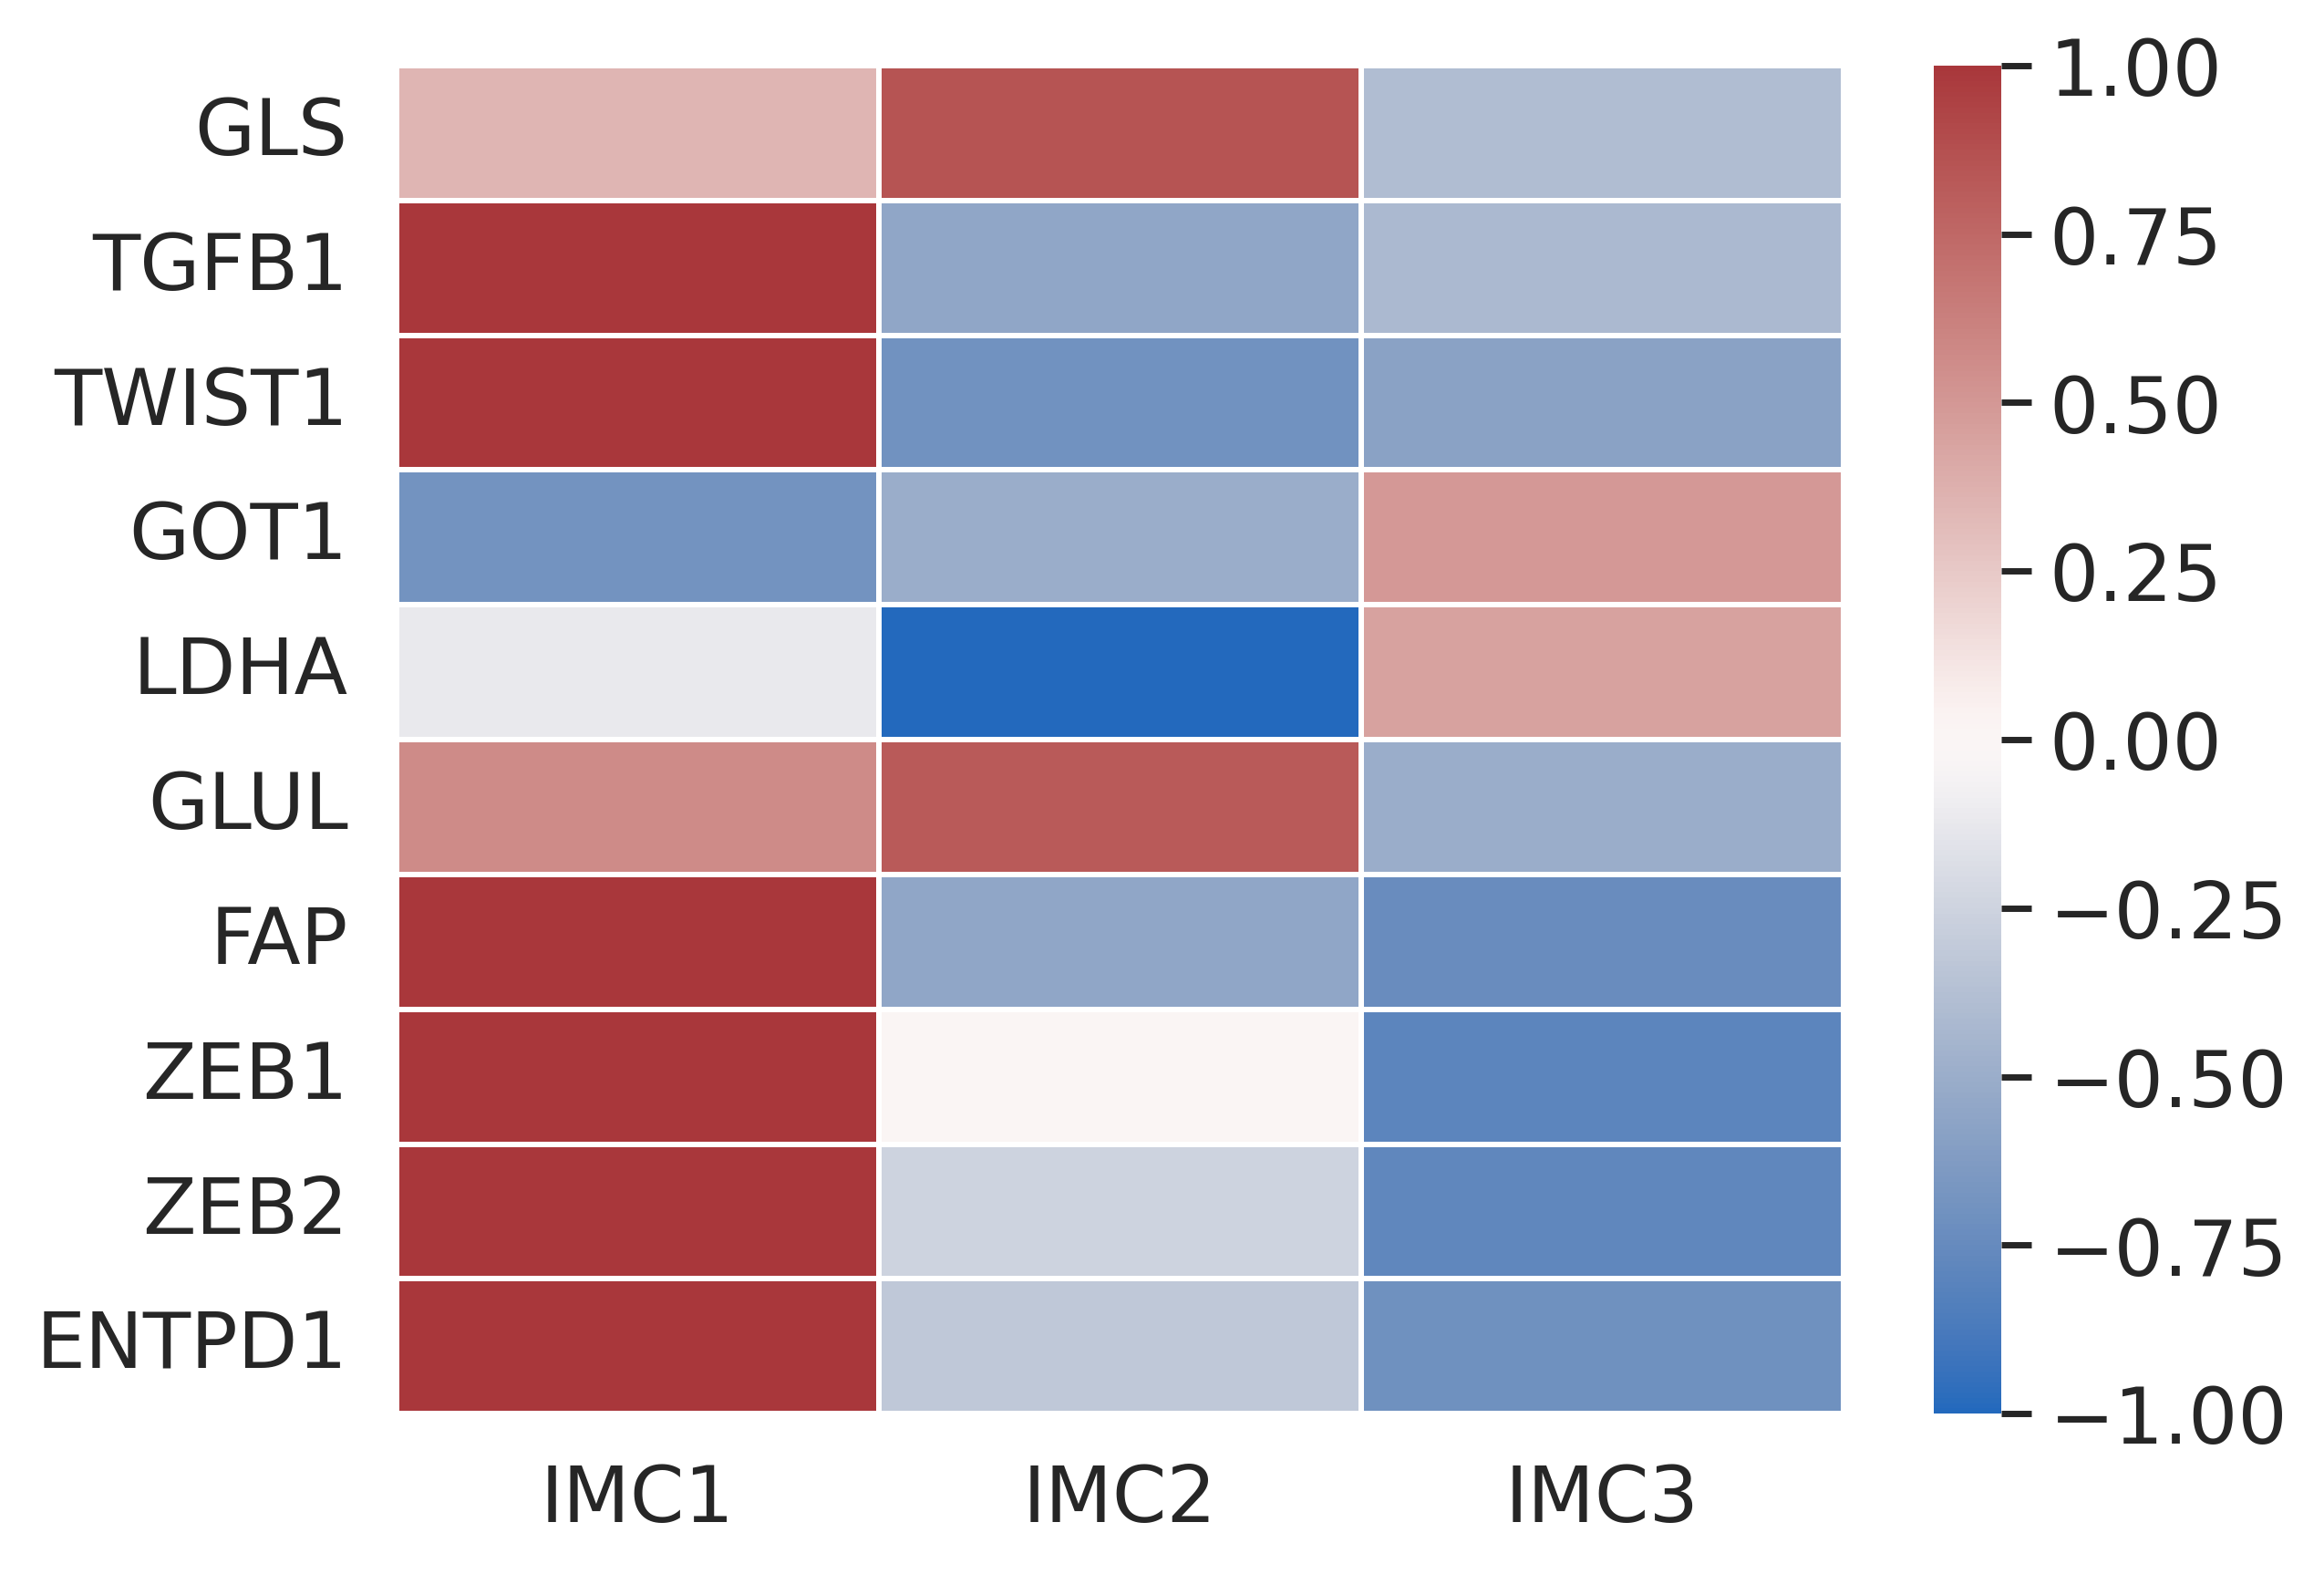

IMC1      IMC2      IMC3
GLS     0.229895  0.568093 -0.262246
TGFB1   0.676512 -0.365872 -0.277748
TWIST1  0.926050 -0.468424 -0.388053
GOT1   -0.459641 -0.335054  0.330197
LDHA   -0.083283 -1.040463  0.297345
GLUL    0.375225  0.547572 -0.335992
FAP     1.070952 -0.368879 -0.490674
ZEB1    0.978357  0.003714 -0.530844
ZEB2    1.036351 -0.168302 -0.520556
ENTPD1  0.964691 -0.218534 -0.469563

In [64]:
firmaIMC.Plot_HeatMap_IMC(df_allinfo_TCGA,selected_gens,titulo="",factorAug=1.5,nom_figure='Fig3C_TCGA.png',typeFig='Size')

In [65]:
pd_ANOVA_Fig3C_TCGA=firmaIMC.Tukey_HeadMap_IMC(df_allinfo_TCGA,selected_gens)
print('ANOVA_PATHWAYS')
taula=firmaIMC.print_ANOVA2(pd_ANOVA_Fig3C_TCGA)
taula.to_excel("Anova_Fig3C_TCGA.xlsx",sheet_name='Fig3C_TCGA') 
taula

#Gen:  GLS
F_onewayResult(statistic=np.float64(25.61248546179325), pvalue=np.float64(2.7818011323445184e-11))
   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1    group2  meandiff p-adj   lower   upper  reject
----------------------------------------------------------
Cluster_1 Cluster_2   0.2565 0.0485  0.0013  0.5118   True
Cluster_1 Cluster_3  -0.3733    0.0 -0.5495 -0.1971   True
Cluster_2 Cluster_3  -0.6299    0.0 -0.8663 -0.3934   True
----------------------------------------------------------
Valor medio del cluster_1: 0.22989519501946276
#Gen:  TGFB1
F_onewayResult(statistic=np.float64(58.79574185250825), pvalue=np.float64(1.660954067329298e-23))
   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1    group2  meandiff p-adj   lower   upper  reject
----------------------------------------------------------
Cluster_1 Cluster_2  -1.1196    0.0 -1.4598 -0.7793   True
Cluster_1 Cluster_3  -1.0249    0.0 -1.2598   -0.79   True
Cluster_2 Cluster_3   0.

/home/smadurga/RecercaGit/IMMETCOLS_GSE1_GSE2_TCGA/FIGURES_IMMETCOLS_Bioinformatics/firmaIMC_v3.py:416: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pd_Tabla['IMC1']=[pd_ANOVA.loc[0][i] for i in range(num_gens)]
/home/smadurga/RecercaGit/IMMETCOLS_GSE1_GSE2_TCGA/FIGURES_IMMETCOLS_Bioinformatics/firmaIMC_v3.py:417: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pd_Tabla['IMC2']=[pd_ANOVA.loc[1][i] for i in range(num_gens)]
/home/smadurga/RecercaGit/IMMETCOLS_GSE1_GSE2_TCGA/FIGURES_IMMETCOLS_Bioinformatics/firmaIMC_v3.py:418: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future versio

GeneName      IMC1      IMC2      IMC3  F_oneway      P_oneway  p-Tukey12  \
0      GLS  0.229895  0.568093 -0.262246    25.612  2.781801e-11      0.048   
1    TGFB1  0.676512 -0.365872 -0.277748    58.796  1.660954e-23      0.000   
2   TWIST1  0.926050 -0.468424 -0.388053   140.629  1.491962e-48      0.000   
3     GOT1 -0.459641 -0.335054  0.330197    38.349  3.775698e-16      0.646   
4     LDHA -0.083283 -1.040463  0.297345    58.203  2.669477e-23      0.000   
5     GLUL  0.375225  0.547572 -0.335992    40.351  6.806648e-17      0.431   
6      FAP  1.070952 -0.368879 -0.490674   236.566  1.007465e-71      0.000   
7     ZEB1  0.978357  0.003714 -0.530844   191.080  2.159878e-61      0.000   
8     ZEB2  1.036351 -0.168302 -0.520556   218.475  9.715197e-68      0.000   
9   ENTPD1  0.964691 -0.218534 -0.469563   164.978  5.949992e-55      0.000   

   p-Tukey13  p-Tukey23  compara1  compara2  compara3  
0        0.0      0.000         1         1         1  
1        0.0      0.760         1         0         0  
2        0.0      0.747         1         0         0  
3        0.0      0.000         0         0         1  
4        0.0      0.000         1         1         1  
5        0.0      0.000         0         0         1  
6        0.0      0.432         1         0         0  
7        0.0      0.000         1         1         1  
8        0.0      0.001         1         1         1  
9        0.0      0.050         1         0         0

### Fig3B TCGA

<Figure size 2560x1920 with 0 Axes>

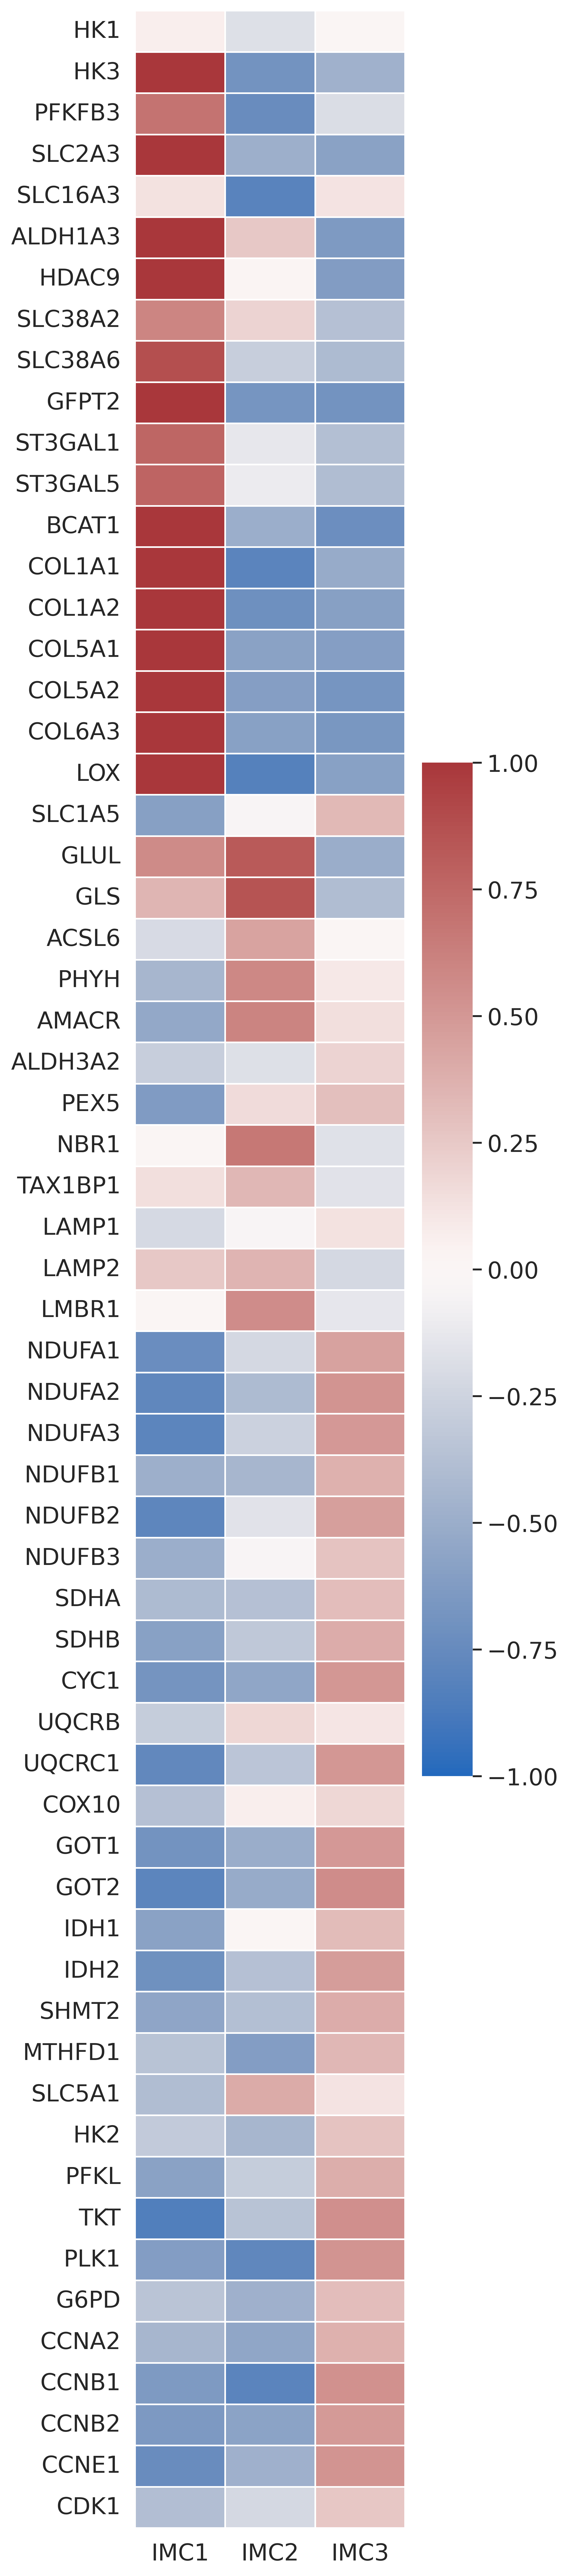

IMC1      IMC2      IMC3
HK1      0.044418 -0.119078  0.004807
HK3      0.788080 -0.461799 -0.314925
PFKFB3   0.459951 -0.490994 -0.130111
SLC2A3   0.861693 -0.323445 -0.388339
SLC16A3  0.088122 -0.539752  0.083117
...           ...       ...       ...
CCNA2   -0.293472 -0.365348  0.247533
CCNB1   -0.422778 -0.531388  0.357826
CCNB2   -0.427825 -0.380981  0.324097
CCNE1   -0.493067 -0.321267  0.344961
CDK1    -0.258273 -0.150469  0.176375

[61 rows x 3 columns]

In [66]:
firmaIMC.Plot_HeatMap_IMC(df_allinfo_TCGA,selected_gens_fig3,titulo="",factorAug=1.5,nom_figure='Fig3B_TCGA.png',typeFig='Size20')

In [67]:
pd_ANOVA_Fig3B_TCGA=firmaIMC.Tukey_HeadMap_IMC(df_allinfo_TCGA,selected_gens_fig3)
print('ANOVA_PATHWAYS')
taula=firmaIMC.print_ANOVA2(pd_ANOVA_Fig3B_TCGA)
taula.to_excel("Anova_Fig3B_TCGA.xlsx",sheet_name='Fig3B_TCGA') 
taula

#Gen:  HK1
F_onewayResult(statistic=np.float64(0.5968414053416908), pvalue=np.float64(0.5509663491532957))
   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
  group1    group2  meandiff p-adj   lower  upper  reject
---------------------------------------------------------
Cluster_1 Cluster_2  -0.0966 0.5231 -0.3056 0.1124  False
Cluster_1 Cluster_3  -0.0234 0.9231 -0.1677 0.1209  False
Cluster_2 Cluster_3   0.0732 0.6479 -0.1205 0.2668  False
---------------------------------------------------------
Valor medio del cluster_1: 0.04441837436943836
#Gen:  HK3
F_onewayResult(statistic=np.float64(88.18606938095395), pvalue=np.float64(3.1588509458988974e-33))
   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1    group2  meandiff p-adj   lower   upper  reject
----------------------------------------------------------
Cluster_1 Cluster_2  -1.4558    0.0 -1.8075  -1.104   True
Cluster_1 Cluster_3  -1.2847    0.0 -1.5275 -1.0419   True
Cluster_2 Cluster_3   0.1711 0.4335

/home/smadurga/RecercaGit/IMMETCOLS_GSE1_GSE2_TCGA/FIGURES_IMMETCOLS_Bioinformatics/firmaIMC_v3.py:416: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pd_Tabla['IMC1']=[pd_ANOVA.loc[0][i] for i in range(num_gens)]
/home/smadurga/RecercaGit/IMMETCOLS_GSE1_GSE2_TCGA/FIGURES_IMMETCOLS_Bioinformatics/firmaIMC_v3.py:417: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pd_Tabla['IMC2']=[pd_ANOVA.loc[1][i] for i in range(num_gens)]
/home/smadurga/RecercaGit/IMMETCOLS_GSE1_GSE2_TCGA/FIGURES_IMMETCOLS_Bioinformatics/firmaIMC_v3.py:418: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future versio

GeneName      IMC1      IMC2      IMC3  F_oneway      P_oneway  p-Tukey12  \
0       HK1  0.044418 -0.119078  0.004807     0.597  5.509663e-01      0.523   
1       HK3  0.788080 -0.461799 -0.314925    88.186  3.158851e-33      0.000   
2    PFKFB3  0.459951 -0.490994 -0.130111    27.951  3.412348e-12      0.000   
3    SLC2A3  0.861693 -0.323445 -0.388339   112.599  1.193733e-40      0.000   
4   SLC16A3  0.088122 -0.539752  0.083117    11.261  1.672964e-05      0.000   
..      ...       ...       ...       ...       ...           ...        ...   
56    CCNA2 -0.293472 -0.365348  0.247533    20.016  4.561786e-09      0.873   
57    CCNB1 -0.422778 -0.531388  0.357826    46.157  5.065387e-19      0.710   
58    CCNB2 -0.427825 -0.380981  0.324097    36.350  2.117584e-15      0.940   
59    CCNE1 -0.493067 -0.321267  0.344961    42.879  7.956269e-18      0.430   
60     CDK1 -0.258273 -0.150469  0.176375     9.966  5.771001e-05      0.746   

    p-Tukey13  p-Tukey23  compara1  compara2  compara3  
0       0.923      0.648         0         0         0  
1       0.000      0.434         1         0         0  
2       0.000      0.018         1         1         1  
3       0.000      0.838         1         0         0  
4       0.999      0.000         0         1         0  
..        ...        ...       ...       ...       ...  
56      0.000      0.000         0         0         1  
57      0.000      0.000         0         0         1  
58      0.000      0.000         0         0         1  
59      0.000      0.000         0         0         1  
60      0.000      0.045         0         0         1  

[61 rows x 12 columns]

### Figura 4B TCGA CD8

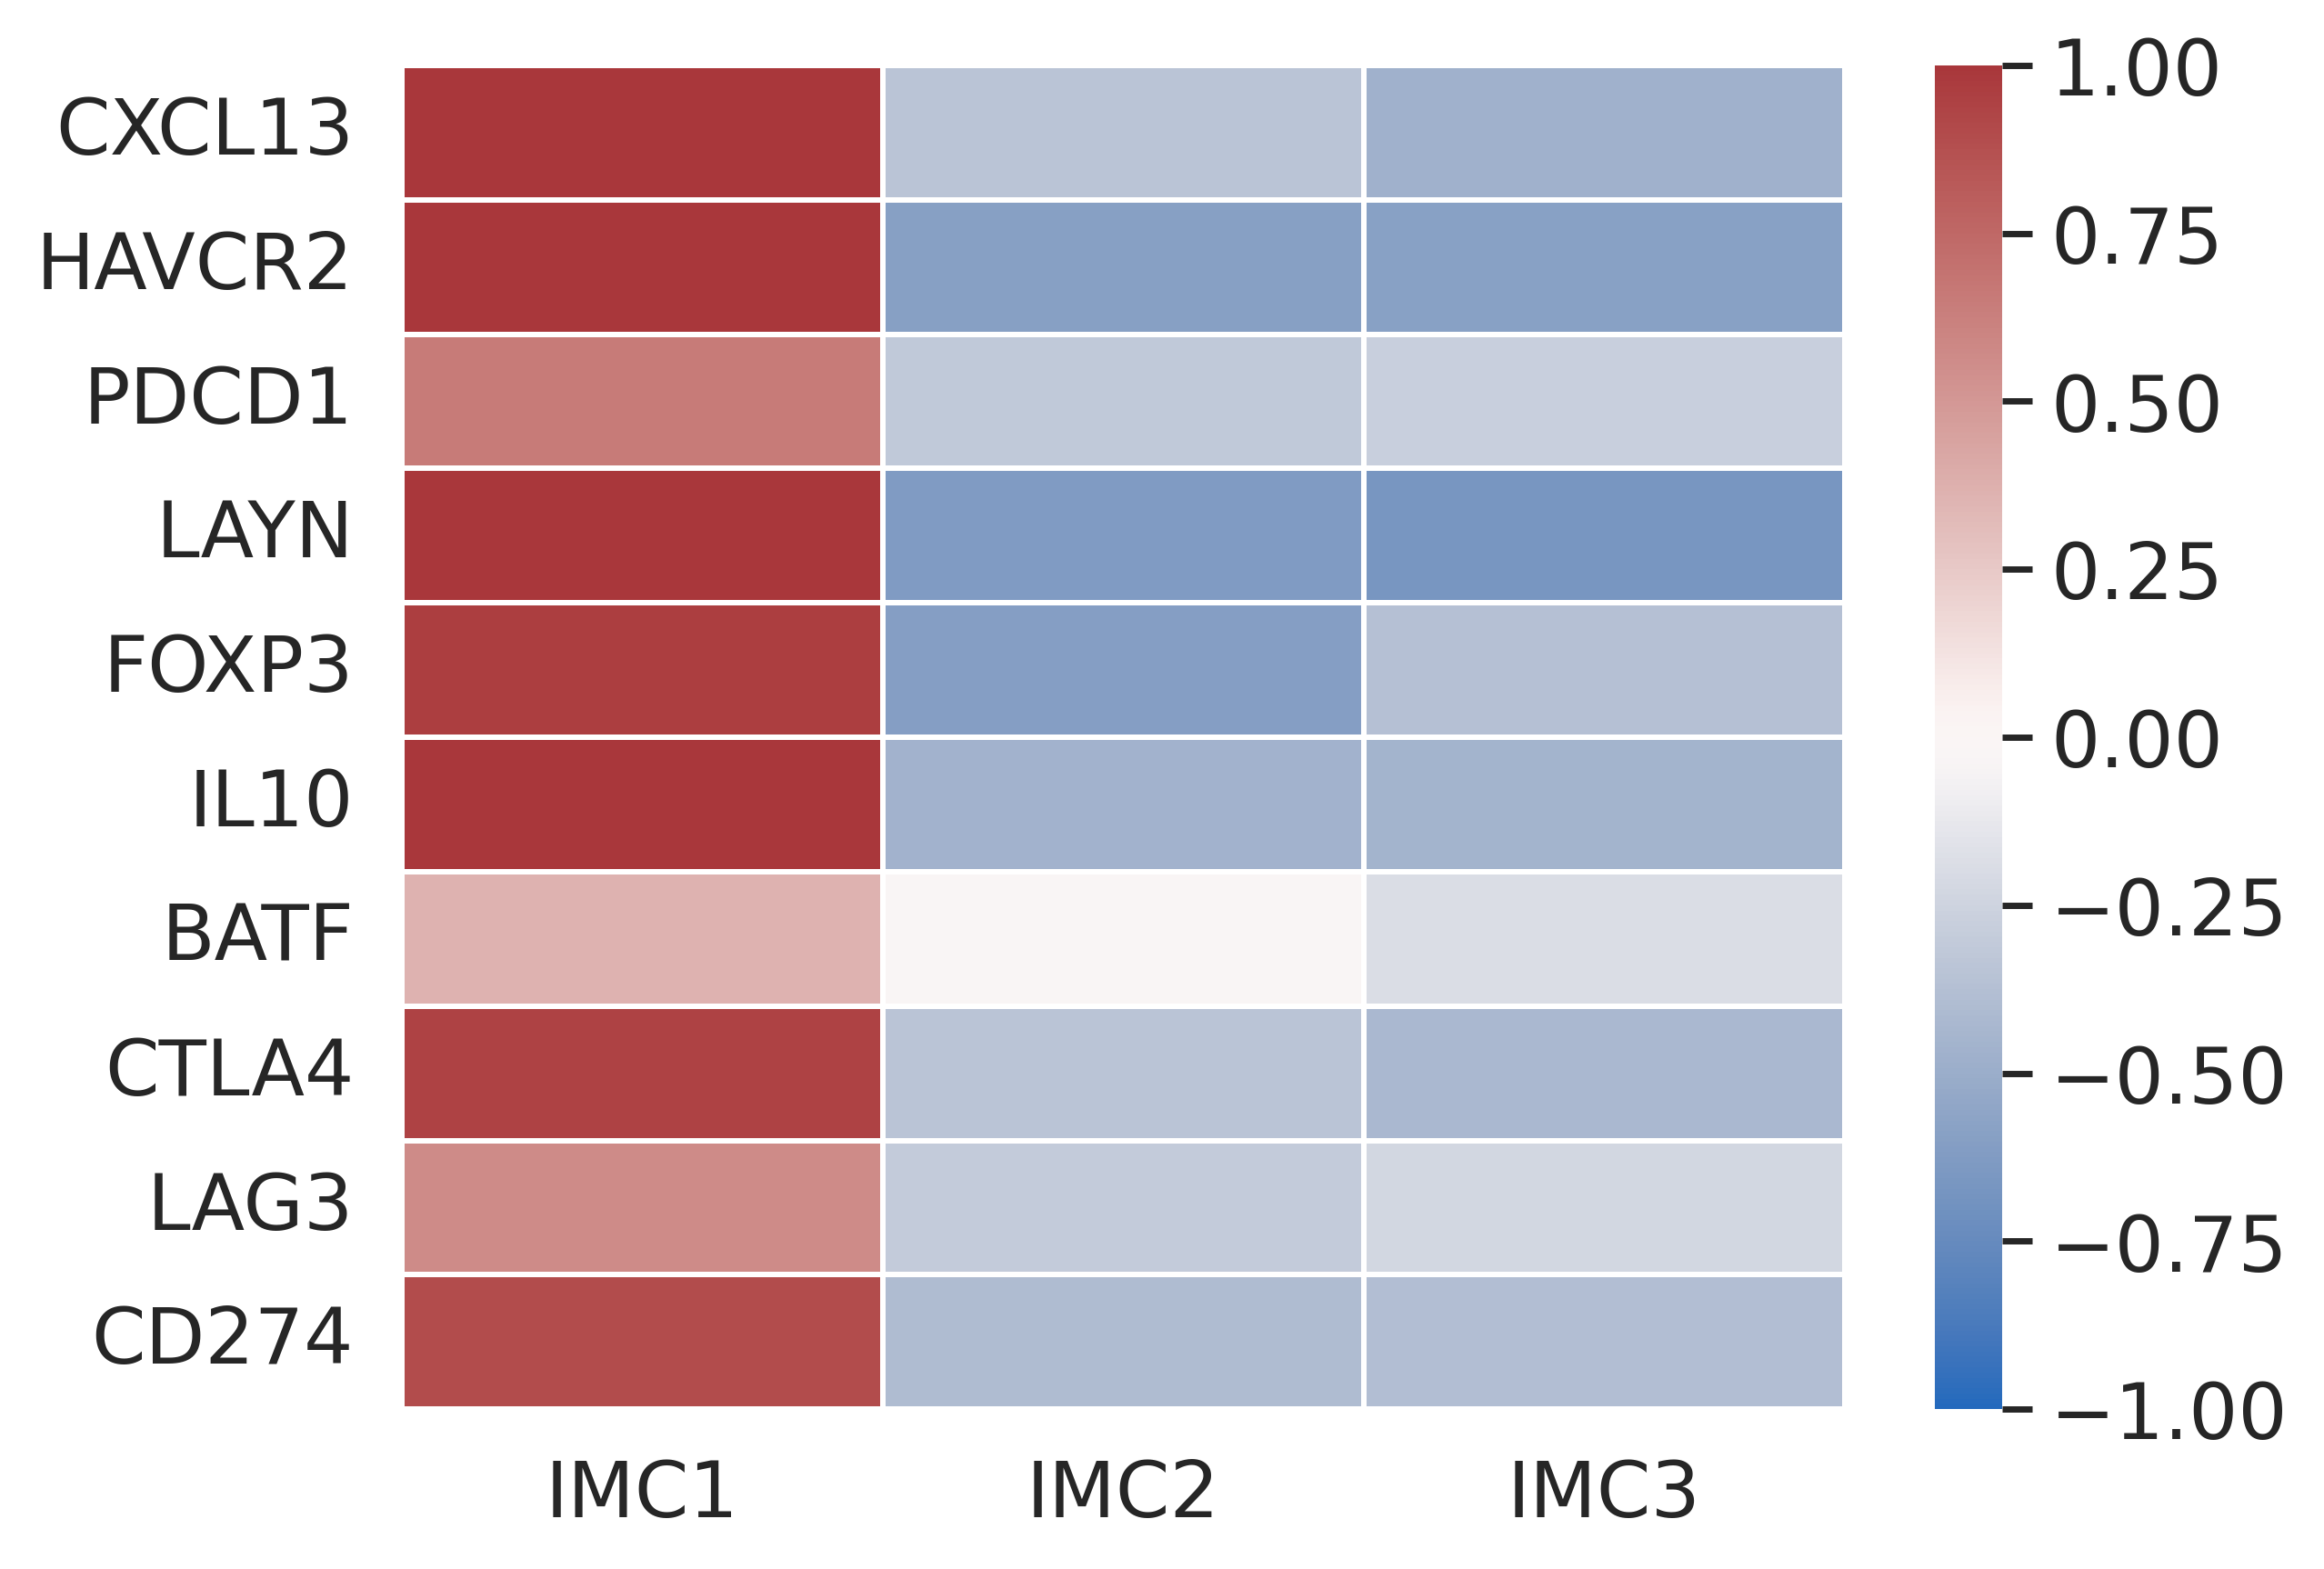

IMC1      IMC2      IMC3
CXCL13  0.680355 -0.230089 -0.312746
HAVCR2  0.901664 -0.399492 -0.391555
PDCD1   0.432537 -0.212651 -0.182739
LAYN    1.005841 -0.417929 -0.443515
FOXP3   0.640846 -0.403696 -0.249259
IL10    0.697452 -0.308123 -0.303090
BATF    0.243120 -0.014888 -0.128081
CTLA4   0.627631 -0.233593 -0.283338
LAG3    0.375393 -0.200334 -0.154772
CD274   0.598847 -0.270774 -0.258733

In [68]:
#selected_gens_CD8=['CXCL13', 'HAVCR2', 'PDCD1', 'LAYN', 'FOXP3', 'IL10', 'BATF', 'CTLA4' ,'CCR8','LAG3']
# Eliminant el CCR8 del GSE2
#selected_gens_CD8=['CXCL13', 'HAVCR2', 'PDCD1', 'LAYN', 'FOXP3', 'IL10', 'BATF', 'CTLA4', 'LAG3'] #   No en este set,'CCR8']
selected_gens_CD8=['CXCL13', 'HAVCR2', 'PDCD1', 'LAYN', 'FOXP3', 'IL10', 'BATF', 'CTLA4', 'LAG3','CD274'] #   No en este set,'CCR8']


firmaIMC.Plot_HeatMap_IMC(df_allinfo_TCGA,selected_gens_CD8,titulo="",factorAug=1.5,nom_figure='Fig4B_TCGA_CD8.png',typeFig='')

In [69]:
pd_ANOVA_Fig4B_TCGA=firmaIMC.Tukey_HeadMap_IMC(df_allinfo_TCGA,selected_gens_CD8)
print('ANOVA_PATHWAYS')
taula=firmaIMC.print_ANOVA2(pd_ANOVA_Fig4B_TCGA)
taula.to_excel("Anova_Fig4B_TCGA.xlsx",sheet_name='Fig4B_TCGA') 
taula

#Gen:  CXCL13
F_onewayResult(statistic=np.float64(59.59499608199277), pvalue=np.float64(8.776607632783974e-24))
   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
  group1    group2  meandiff p-adj  lower   upper  reject
---------------------------------------------------------
Cluster_1 Cluster_2  -1.4401   0.0 -1.9405 -0.9397   True
Cluster_1 Cluster_3  -1.5708   0.0 -1.9163 -1.2253   True
Cluster_2 Cluster_3  -0.1307 0.785 -0.5943  0.3328  False
---------------------------------------------------------
Valor medio del cluster_1: 0.6803547174478133
#Gen:  HAVCR2
F_onewayResult(statistic=np.float64(128.9079454023595), pvalue=np.float64(2.535917403088938e-45))
   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1    group2  meandiff p-adj   lower   upper  reject
----------------------------------------------------------
Cluster_1 Cluster_2  -1.4097    0.0  -1.718 -1.1014   True
Cluster_1 Cluster_3  -1.4011    0.0 -1.6139 -1.1883   True
Cluster_2 Cluster_3   0.0086 

/home/smadurga/RecercaGit/IMMETCOLS_GSE1_GSE2_TCGA/FIGURES_IMMETCOLS_Bioinformatics/firmaIMC_v3.py:416: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pd_Tabla['IMC1']=[pd_ANOVA.loc[0][i] for i in range(num_gens)]
/home/smadurga/RecercaGit/IMMETCOLS_GSE1_GSE2_TCGA/FIGURES_IMMETCOLS_Bioinformatics/firmaIMC_v3.py:417: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pd_Tabla['IMC2']=[pd_ANOVA.loc[1][i] for i in range(num_gens)]
/home/smadurga/RecercaGit/IMMETCOLS_GSE1_GSE2_TCGA/FIGURES_IMMETCOLS_Bioinformatics/firmaIMC_v3.py:418: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future versio

GeneName      IMC1      IMC2      IMC3  F_oneway      P_oneway  p-Tukey12  \
0   CXCL13  0.680355 -0.230089 -0.312746    59.595  8.776608e-24      0.000   
1   HAVCR2  0.901664 -0.399492 -0.391555   128.908  2.535917e-45      0.000   
2    PDCD1  0.432537 -0.212651 -0.182739    20.857  2.104550e-09      0.000   
3     LAYN  1.005841 -0.417929 -0.443515   185.426  4.957519e-60      0.000   
4    FOXP3  0.640846 -0.403696 -0.249259    52.079  3.792639e-21      0.000   
5     IL10  0.697452 -0.308123 -0.303090    63.154  5.233605e-25      0.000   
6     BATF  0.243120 -0.014888 -0.128081     6.550  1.565099e-03      0.193   
7    CTLA4  0.627631 -0.233593 -0.283338    48.737  5.927616e-20      0.000   
8     LAG3  0.375393 -0.200334 -0.154772    15.413  3.292763e-07      0.000   
9    CD274  0.598847 -0.270774 -0.258733    43.480  4.787962e-18      0.000   

   p-Tukey13  p-Tukey23  compara1  compara2  compara3  
0      0.000      0.785         1         0         0  
1      0.000      0.997         1         0         0  
2      0.000      0.973         1         0         0  
3      0.000      0.967         1         0         0  
4      0.000      0.440         1         0         0  
5      0.000      0.999         1         0         0  
6      0.001      0.690         0         0         0  
7      0.000      0.919         1         0         0  
8      0.000      0.939         1         0         0  
9      0.000      0.995         1         0         0

In [70]:
print("% of coincident gens")
dict_gens_Coincidents_TCGA={}
for ele in dict_gens_inicial_estroma.keys():
    print(ele)
    dict_gens_Coincidents_TCGA[ele]=firmaIMC.Commom_genes(dict_gens_inicial_estroma[ele],list(pd_gens_TCGA['Gene.name']))

% of coincident gens
CAF
Num. gens: 7 de 7  100.00 % 
Hypoxia
Num. gens: 199 de 200  99.50 % 
Hexosaminidase
Num. gens: 15 de 15  100.00 % 
EMT
Num. gens: 192 de 192  100.00 % 
TGFbeta signaling
Num. gens: 132 de 132  100.00 % 
Angiogenesis
Num. gens: 36 de 36  100.00 % 
ECM interactions
Num. gens: 59 de 59  100.00 % 
Colon cancer MSI up
Num. gens: 16 de 16  100.00 % 
Imflammatory resp.
Num. gens: 30 de 30  100.00 % 
IFN gamma resp.
Num. gens: 71 de 71  100.00 % 
IL6 signaling
Num. gens: 43 de 43  100.00 % 
T-cytotoxic pathway
Num. gens: 12 de 12  100.00 % 
PD1
Num. gens: 196 de 198  98.99 % 


In [71]:
# Eliminar gens separadors
#dict_gens_Coincidents_TCGA["---"]=[]
#dict_gens_Coincidents_TCGA["----"]=[]


In [72]:
index_MSI_H=df_allinfo_TCGA["CDE_ID_3226963"]=="MSI-H"
index_MSS=(df_allinfo_TCGA["CDE_ID_3226963"]=="MSI-L") | (df_allinfo_TCGA["CDE_ID_3226963"]=="MSS")

print("Total: MSI-H:",np.sum(index_MSI_H))
print("Total: MSS:",np.sum(index_MSS))


Total: MSI-H: 83
Total: MSS: 364


### Fig4C TCGA MSS

Nom path: CAF, num. gens:7
Nom path: Hypoxia, num. gens:199
Nom path: Hexosaminidase, num. gens:15
Nom path: EMT, num. gens:192
Nom path: TGFbeta signaling, num. gens:132
Nom path: Angiogenesis, num. gens:36
Nom path: ECM interactions, num. gens:59
Nom path: Colon cancer MSI up, num. gens:16
Nom path: Imflammatory resp., num. gens:30
Nom path: IFN gamma resp., num. gens:71
Nom path: IL6 signaling, num. gens:43
Nom path: T-cytotoxic pathway, num. gens:12
Nom path: PD1, num. gens:196


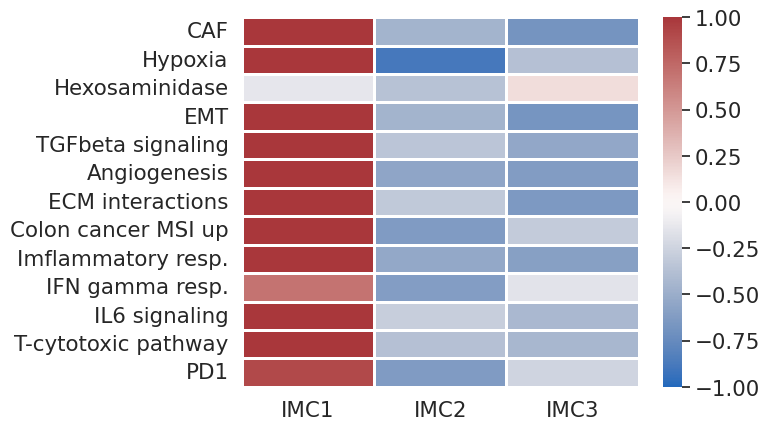

IMC1      IMC2      IMC3    avgIMC1    avgIMC2  \
CAF                  1.200967 -0.304757 -0.453425  10.538020   9.322365   
Hypoxia              0.897204 -0.592985 -0.249103  10.202248   9.861838   
Hexosaminidase      -0.091801 -0.239628  0.099173   9.685516   9.648643   
EMT                  1.190503 -0.305703 -0.448591  10.371013   9.645780   
TGFbeta signaling    0.948731 -0.224513 -0.362177  10.870969  10.683670   
Angiogenesis         1.151599 -0.372704 -0.415040  10.367337   9.656738   
ECM interactions     1.090733 -0.211061 -0.427933  11.015312  10.369044   
Colon cancer MSI up  0.695566 -0.419859 -0.202899  10.230082   9.794018   
Imflammatory resp.   1.103507 -0.358176 -0.397453   9.853878   9.174121   
IFN gamma resp.      0.463246 -0.407251 -0.103815  11.021810  10.809607   
IL6 signaling        0.757787 -0.192187 -0.286129  10.695551  10.513503   
T-cytotoxic pathway  0.797951 -0.247871 -0.290131   8.996204   8.114674   
PD1                  0.607532 -0.417261 -0.164818   9.879918   9.664238   

                       avgIMC3   stdIMC1   stdIMC2   stdIMC3    stdALL  
CAF                   9.202337  0.554168  0.598277  0.559639  0.807356  
Hypoxia               9.940393  0.202002  0.178280  0.189674  0.228434  
Hexosaminidase        9.733151  0.226046  0.226424  0.260910  0.249432  
EMT                   9.576520  0.331515  0.355273  0.342786  0.484714  
TGFbeta signaling    10.661693  0.136323  0.120116  0.132238  0.159642  
Angiogenesis          9.637003  0.303740  0.373267  0.346214  0.466179  
ECM interactions     10.261380  0.383764  0.399447  0.366901  0.496444  
Colon cancer MSI up   9.878837  0.335280  0.340561  0.366375  0.390940  
Imflammatory resp.    9.155855  0.342346  0.350419  0.354937  0.465051  
IFN gamma resp.      10.883576  0.212595  0.226794  0.242848  0.243772  
IL6 signaling        10.495501  0.164562  0.191824  0.168323  0.191634  
T-cytotoxic pathway   8.079053  0.654854  0.796873  0.763809  0.842906  
PD1                   9.717367  0.177064  0.193650  0.203391  0.210462

In [73]:
#MSS
firmaIMC.Plot_HeatMap_PATHS_IMC_stat(df_allinfo_TCGA[index_MSS],dict_gens_Coincidents_TCGA,nom_figure='Fig4C_TCGA_MSS.png',factorAug=1.5,typeFig='')

In [74]:
pd_ANOVA_PATHWAY_Fig4C_TCGA_MSS=firmaIMC.Tukey_HeadMap_PATHS_IMC(df_allinfo_TCGA[index_MSS],dict_gens_Coincidents_TCGA)
print('ANOVA_PATHWAYS')
taula=firmaIMC.print_ANOVA2(pd_ANOVA_PATHWAY_Fig4C_TCGA_MSS)
taula.to_excel("Anova_Fig4C_TCGA_MSS.xlsx",sheet_name='Fig4C_TCGA_MSS') 
taula

Nom path: CAF, num. gens:7
F_onewayResult(statistic=np.float64(189.3422116136846), pvalue=np.float64(5.850076476551063e-57))
   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1    group2  meandiff p-adj   lower   upper  reject
----------------------------------------------------------
Cluster_1 Cluster_2  -1.2157    0.0 -1.4442 -0.9871   True
Cluster_1 Cluster_3  -1.3357    0.0 -1.4998 -1.1716   True
Cluster_2 Cluster_3    -0.12 0.3511 -0.3243  0.0843  False
----------------------------------------------------------
Nom path: Hypoxia, num. gens:199
F_onewayResult(statistic=np.float64(76.66315358063585), pvalue=np.float64(1.7842579521442428e-28))
   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1    group2  meandiff p-adj   lower   upper  reject
----------------------------------------------------------
Cluster_1 Cluster_2  -0.3404    0.0 -0.4179 -0.2629   True
Cluster_1 Cluster_3  -0.2619    0.0 -0.3175 -0.2062   True
Cluster_2 Cluster_3   0.0786 0.0218

/home/smadurga/RecercaGit/IMMETCOLS_GSE1_GSE2_TCGA/FIGURES_IMMETCOLS_Bioinformatics/firmaIMC_v3.py:416: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pd_Tabla['IMC1']=[pd_ANOVA.loc[0][i] for i in range(num_gens)]
/home/smadurga/RecercaGit/IMMETCOLS_GSE1_GSE2_TCGA/FIGURES_IMMETCOLS_Bioinformatics/firmaIMC_v3.py:417: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pd_Tabla['IMC2']=[pd_ANOVA.loc[1][i] for i in range(num_gens)]
/home/smadurga/RecercaGit/IMMETCOLS_GSE1_GSE2_TCGA/FIGURES_IMMETCOLS_Bioinformatics/firmaIMC_v3.py:418: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future versio

GeneName      IMC1      IMC2      IMC3  F_oneway      P_oneway  \
0                   CAF  1.200967 -0.304757 -0.453425   189.342  5.850076e-57   
1               Hypoxia  0.897204 -0.592985 -0.249103    76.663  1.784258e-28   
2        Hexosaminidase -0.091801 -0.239628  0.099173     3.009  5.058388e-02   
3                   EMT  1.190503 -0.305703 -0.448591   182.621  1.603105e-55   
4     TGFbeta signaling  0.948731 -0.224513 -0.362177    84.977  5.718462e-31   
5          Angiogenesis  1.151599 -0.372704 -0.415040   159.145  2.779974e-50   
6      ECM interactions  1.090733 -0.211061 -0.427933   133.770  3.396233e-44   
7   Colon cancer MSI up  0.695566 -0.419859 -0.202899    38.651  6.166154e-16   
8    Imflammatory resp.  1.103507 -0.358176 -0.397453   136.296  8.005683e-45   
9       IFN gamma resp.  0.463246 -0.407251 -0.103815    17.103  8.006343e-08   
10        IL6 signaling  0.757787 -0.192187 -0.286129    46.211  1.353485e-18   
11  T-cytotoxic pathway  0.797951 -0.247871 -0.290131    52.426  1.026570e-20   
12                  PD1  0.607532 -0.417261 -0.164818    28.848  2.383413e-12   

    p-Tukey12  p-Tukey13  p-Tukey23  compara1  compara2  compara3  
0       0.000      0.000      0.351         1         0         0  
1       0.000      0.000      0.022         1         1         1  
2       0.662      0.265      0.069         0         0         0  
3       0.000      0.000      0.387         1         0         0  
4       0.000      0.000      0.524         1         0         0  
5       0.000      0.000      0.925         1         0         0  
6       0.000      0.000      0.152         1         0         0  
7       0.000      0.000      0.268         1         0         0  
8       0.000      0.000      0.939         1         0         0  
9       0.000      0.000      0.099         1         0         0  
10      0.000      0.000      0.773         1         0         0  
11      0.000      0.000      0.948         1         0         0  
12      0.000      0.000      0.182         1         0         0

Nom path: CAF, num. gens:7
Nom path: Hypoxia, num. gens:199
Nom path: Hexosaminidase, num. gens:15
Nom path: EMT, num. gens:192
Nom path: TGFbeta signaling, num. gens:132
Nom path: Angiogenesis, num. gens:36
Nom path: ECM interactions, num. gens:59
Nom path: Colon cancer MSI up, num. gens:16
Nom path: Imflammatory resp., num. gens:30
Nom path: IFN gamma resp., num. gens:71
Nom path: IL6 signaling, num. gens:43
Nom path: T-cytotoxic pathway, num. gens:12
Nom path: PD1, num. gens:196


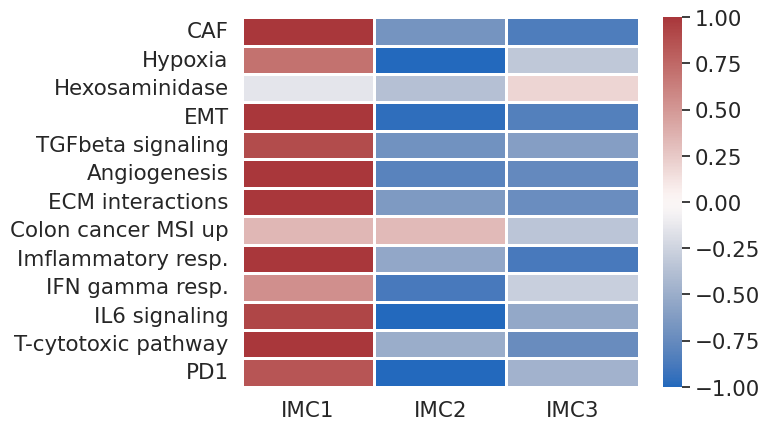

IMC1      IMC2      IMC3    avgIMC1    avgIMC2  \
CAF                  0.795327 -0.457004 -0.570368  10.380116   9.424676   
Hypoxia              0.467042 -0.886573 -0.214313  10.227403   9.926423   
Hexosaminidase      -0.095842 -0.246436  0.127564   9.759617   9.722521   
EMT                  0.820698 -0.645244 -0.554678  10.283927   9.562819   
TGFbeta signaling    0.597520 -0.464601 -0.404850  10.895405  10.710279   
Angiogenesis         0.742188 -0.541311 -0.509851  10.277860   9.694003   
ECM interactions     0.686246 -0.425833 -0.485992  10.878058  10.325927   
Colon cancer MSI up  0.225221  0.216937 -0.229098  11.040293  11.037042   
Imflammatory resp.   0.789791 -0.361432 -0.584425  10.015089   9.476101   
IFN gamma resp.      0.363538 -0.585268 -0.187272  11.363699  11.068802   
IL6 signaling        0.619146 -0.800220 -0.357297  10.789551  10.503654   
T-cytotoxic pathway  0.674524 -0.334423 -0.494108   9.665645   8.816002   
PD1                  0.563413 -0.814851 -0.308225  10.047724   9.759212   

                       avgIMC3   stdIMC1   stdIMC2   stdIMC3    stdALL  
CAF                   9.338188  0.674622  0.496348  0.484191  0.762930  
Hypoxia              10.075902  0.220714  0.117728  0.195420  0.222353  
Hexosaminidase        9.814650  0.251737  0.235847  0.239309  0.246336  
EMT                   9.607369  0.444757  0.201107  0.297761  0.491908  
TGFbeta signaling    10.720693  0.176067  0.112009  0.134507  0.174298  
Angiogenesis          9.708314  0.395717  0.294554  0.334624  0.454895  
ECM interactions     10.296058  0.479105  0.267986  0.362543  0.496486  
Colon cancer MSI up  10.861993  0.337840  0.456818  0.400569  0.392456  
Imflammatory resp.    9.371698  0.379756  0.343627  0.327523  0.468187  
IFN gamma resp.      11.192503  0.300006  0.374364  0.270455  0.310809  
IL6 signaling        10.592870  0.161530  0.169834  0.178108  0.201426  
T-cytotoxic pathway   8.681531  0.608011  0.857590  0.727566  0.842108  
PD1                   9.865264  0.199019  0.152720  0.173018  0.209330

In [75]:
#MSI-H
firmaIMC.Plot_HeatMap_PATHS_IMC_stat(df_allinfo_TCGA[index_MSI_H],dict_gens_Coincidents_TCGA,nom_figure='Fig4C_TCGA_MSI-H.png',factorAug=1.5,typeFig='')

In [76]:
pd_ANOVA_PATHWAY_Fig4C_TCGA_MSIH=firmaIMC.Tukey_HeadMap_PATHS_IMC(df_allinfo_TCGA[index_MSI_H],dict_gens_Coincidents_TCGA)
print('ANOVA_PATHWAYS')
taula=firmaIMC.print_ANOVA2(pd_ANOVA_PATHWAY_Fig4C_TCGA_MSIH)
taula.to_excel("Anova_Fig4C_TCGA_MSIH.xlsx",sheet_name='Fig4C_TCGA_MSIH') 
taula

Nom path: CAF, num. gens:7
F_onewayResult(statistic=np.float64(31.421554744123526), pvalue=np.float64(8.496257302005856e-11))
   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1    group2  meandiff p-adj   lower   upper  reject
----------------------------------------------------------
Cluster_1 Cluster_2  -0.9554 0.0002 -1.5012 -0.4097   True
Cluster_1 Cluster_3  -1.0419    0.0 -1.3641 -0.7198   True
Cluster_2 Cluster_3  -0.0865 0.9217 -0.6233  0.4503  False
----------------------------------------------------------
Nom path: Hypoxia, num. gens:199
F_onewayResult(statistic=np.float64(9.249083645462681), pvalue=np.float64(0.00024348571416183082))
   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1    group2  meandiff p-adj   lower   upper  reject
----------------------------------------------------------
Cluster_1 Cluster_2   -0.301  0.001 -0.4925 -0.1094   True
Cluster_1 Cluster_3  -0.1515 0.0055 -0.2646 -0.0384   True
Cluster_2 Cluster_3   0.1495 0.146

/home/smadurga/RecercaGit/IMMETCOLS_GSE1_GSE2_TCGA/FIGURES_IMMETCOLS_Bioinformatics/firmaIMC_v3.py:416: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pd_Tabla['IMC1']=[pd_ANOVA.loc[0][i] for i in range(num_gens)]
/home/smadurga/RecercaGit/IMMETCOLS_GSE1_GSE2_TCGA/FIGURES_IMMETCOLS_Bioinformatics/firmaIMC_v3.py:417: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pd_Tabla['IMC2']=[pd_ANOVA.loc[1][i] for i in range(num_gens)]
/home/smadurga/RecercaGit/IMMETCOLS_GSE1_GSE2_TCGA/FIGURES_IMMETCOLS_Bioinformatics/firmaIMC_v3.py:418: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future versio

GeneName      IMC1      IMC2      IMC3  F_oneway      P_oneway  \
0                   CAF  0.795327 -0.457004 -0.570368    31.422  8.496257e-11   
1               Hypoxia  0.467042 -0.886573 -0.214313     9.249  2.434857e-04   
2        Hexosaminidase -0.095842 -0.246436  0.127564     0.719  4.904210e-01   
3                   EMT  0.820698 -0.645244 -0.554678    35.191  1.085987e-11   
4     TGFbeta signaling  0.597520 -0.464601 -0.404850    13.193  1.117343e-05   
5          Angiogenesis  0.742188 -0.541311 -0.509851    24.756  4.277371e-09   
6      ECM interactions  0.686246 -0.425833 -0.485992    19.441  1.315247e-07   
7   Colon cancer MSI up  0.225221  0.216937 -0.229098     2.160  1.219634e-01   
8    Imflammatory resp.  0.789791 -0.361432 -0.584425    31.027  1.060650e-10   
9       IFN gamma resp.  0.363538 -0.585268 -0.187272     4.667  1.210764e-02   
10        IL6 signaling  0.619146 -0.800220 -0.357297    15.696  1.776167e-06   
11  T-cytotoxic pathway  0.674524 -0.334423 -0.494108    18.630  2.277814e-07   
12                  PD1  0.563413 -0.814851 -0.308225    12.698  1.623944e-05   

    p-Tukey12  p-Tukey13  p-Tukey23  compara1  compara2  compara3  
0       0.000      0.000      0.922         1         0         0  
1       0.001      0.006      0.147         1         0         0  
2       0.924      0.608      0.605         0         0         0  
3       0.000      0.000      0.947         1         0         0  
4       0.008      0.000      0.983         1         0         0  
5       0.000      0.000      0.994         1         0         0  
6       0.003      0.000      0.981         1         0         0  
7       1.000      0.125      0.479         0         0         0  
8       0.001      0.000      0.732         1         0         0  
9       0.038      0.042      0.536         1         0         0  
10      0.000      0.000      0.384         1         0         0  
11      0.009      0.000      0.876         1         0         0  
12      0.000      0.000      0.307         1         0         0

## TCGA per Mutacions

In [77]:
df_allinfo_TCGA[ ["kras_mutation_found.x", "braf_gene_analysis_result.x"] ]

kras_mutation_found.x braf_gene_analysis_result.x
0                     YES                         NaN
1                     NaN                         NaN
2                     NaN                         NaN
3                     NaN                         NaN
4                     NaN                         NaN
..                    ...                         ...
466                   NaN                         NaN
467                   NaN                         NaN
468                   NaN                         NaN
469                   NaN                    Abnormal
470                   NaN                         NaN

[471 rows x 2 columns]

In [78]:
index_KRAS_Mut=df_allinfo_TCGA["kras_mutation_found.x"]=="YES"
index_BRAF_Mut=df_allinfo_TCGA["braf_gene_analysis_result.x"]=="Abnormal"

index_2WT=((df_allinfo_TCGA["kras_mutation_found.x"]=="YES") & (df_allinfo_TCGA["braf_gene_analysis_result.x"]=="Abnormal") )

print("Total: 2WT:",np.sum(index_2WT))
print("Total: KRAS_M:",np.sum(index_KRAS_Mut))
print("Total: BRAF_M:",np.sum(index_BRAF_Mut))

Total: 2WT: 0
Total: KRAS_M: 22
Total: BRAF_M: 4


### Figure 3A TCGA

In [79]:
print("% of coincident gens TCGA")
dict_gens_Coincidents_metabol_TCGA={}
for ele in dict_gens_inicial_metabol.keys():
    print(ele,' ')
    dict_gens_Coincidents_metabol_TCGA[ele]=firmaIMC.Commom_genes(dict_gens_inicial_metabol[ele],list(pd_gens_TCGA['Gene.name']))

% of coincident gens TCGA
Collagen biosynthesis  
Num. gens: 47 de 50  94.00 % 
Phagocytosis  
Num. gens: 102 de 104  98.08 % 
Fructose-6P metabolic  
Num. gens: 11 de 11  100.00 % 
Amino sugar metabolic  
Num. gens: 41 de 41  100.00 % 
Regulation Glycolysis  
Num. gens: 47 de 47  100.00 % 
Lactate transport  
Num. gens: 7 de 7  100.00 % 
Glutamine transport  
Num. gens: 9 de 9  100.00 % 
Autophagy of peroxisome  
Num. gens: 6 de 6  100.00 % 
Long Chain Fatty Acs.  
Num. gens: 5 de 5  100.00 % 
Glutamine catabolic  
Num. gens: 25 de 27  92.59 % 
Glutamine biosynthesis  
Num. gens: 18 de 18  100.00 % 
Oxphos  
Num. gens: 103 de 103  100.00 % 
G2M checkpoint  
Num. gens: 200 de 200  100.00 % 
E2F targets  
Num. gens: 200 de 200  100.00 % 
Pentose Phosphate  
Num. gens: 27 de 27  100.00 % 
Folate metabolism  
Num. gens: 17 de 17  100.00 % 


Nom path: Collagen biosynthesis, num. gens:47
Nom path: Phagocytosis, num. gens:102
Nom path: Fructose-6P metabolic, num. gens:11
Nom path: Amino sugar metabolic, num. gens:41
Nom path: Regulation Glycolysis, num. gens:47
Nom path: Lactate transport, num. gens:7
Nom path: Glutamine transport, num. gens:9
Nom path: Autophagy of peroxisome, num. gens:6
Nom path: Long Chain Fatty Acs., num. gens:5
Nom path: Glutamine catabolic, num. gens:25
Nom path: Glutamine biosynthesis, num. gens:18
Nom path: Oxphos, num. gens:103
Nom path: G2M checkpoint, num. gens:200
Nom path: E2F targets, num. gens:200
Nom path: Pentose Phosphate, num. gens:27
Nom path: Folate metabolism, num. gens:17


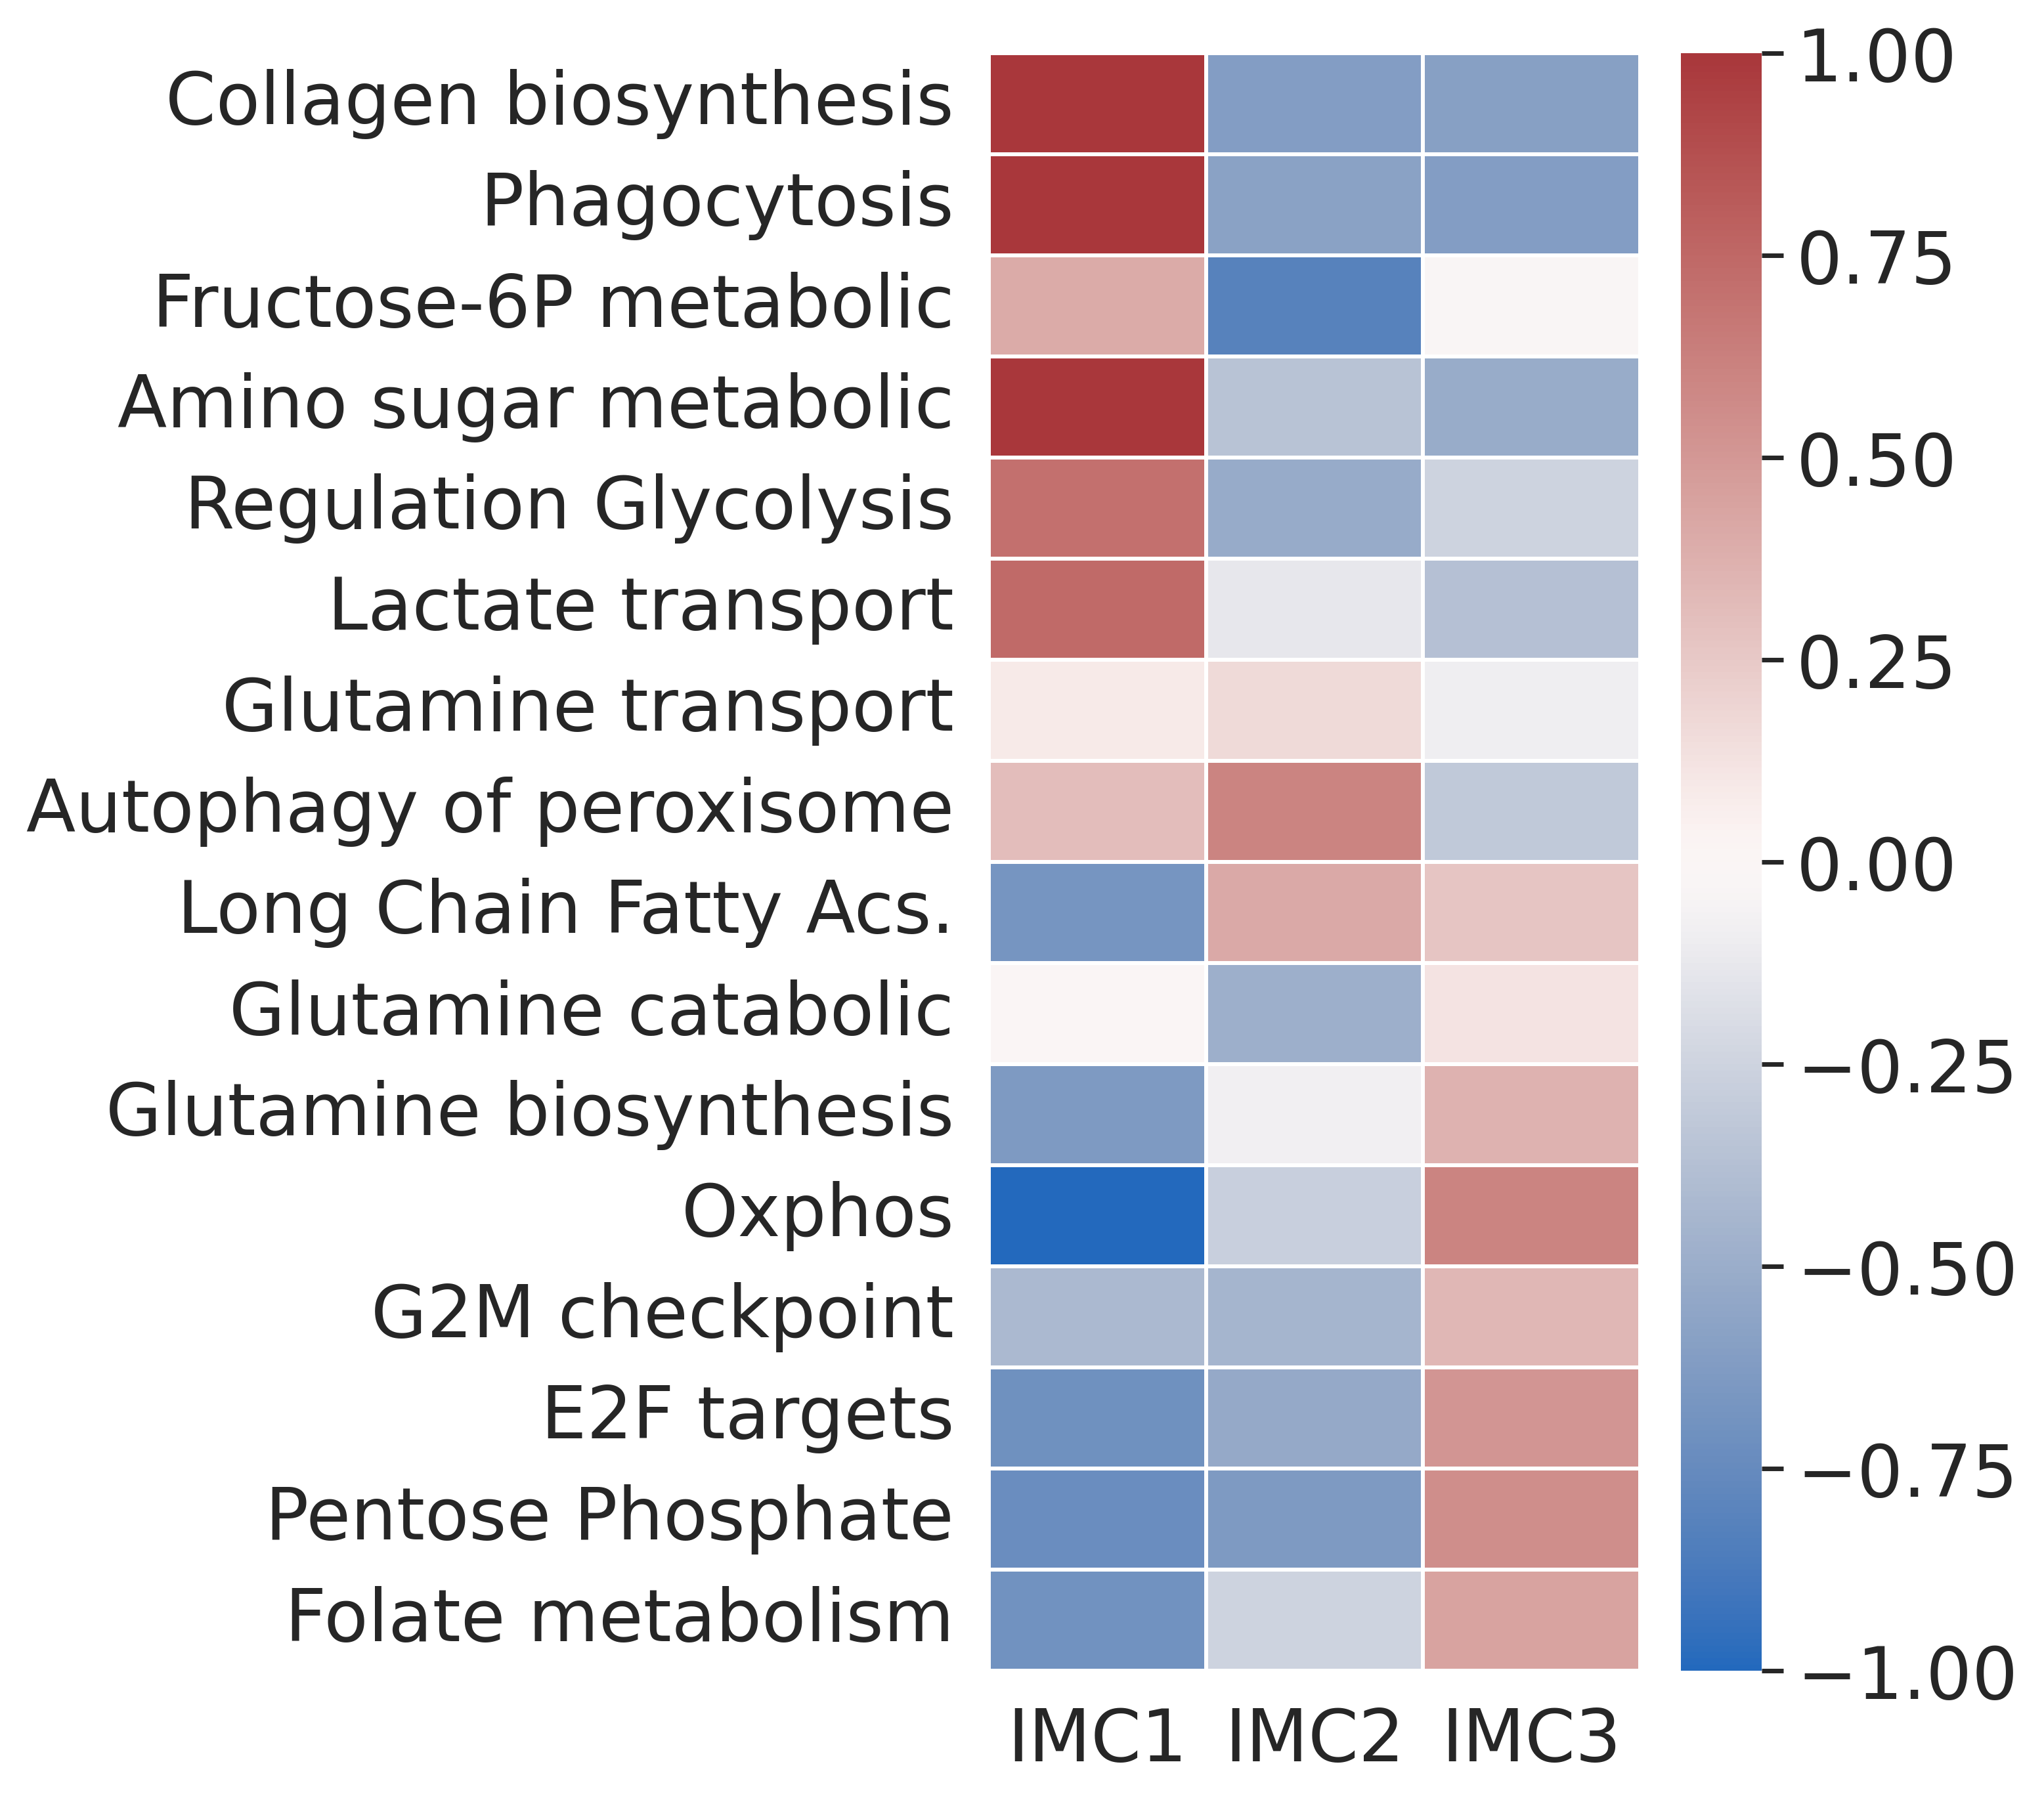

IMC1      IMC2      IMC3    avgIMC1    avgIMC2  \
Collagen biosynthesis    0.920823 -0.410458 -0.399274   9.286533   8.759513   
Phagocytosis             0.932691 -0.387105 -0.411364   8.944363   8.497981   
Fructose-6P metabolic    0.267492 -0.545667 -0.012609  10.681096  10.394728   
Amino sugar metabolic    0.739962 -0.238870 -0.342905   9.200047   8.952936   
Regulation Glycolysis    0.469778 -0.346720 -0.170409   9.256080   9.135462   
Lactate transport        0.494482 -0.084204 -0.247431   7.915115   7.676071   
Glutamine transport      0.059573  0.109861 -0.058902   9.712219   9.727313   
Autophagy of peroxisome  0.205479  0.406000 -0.209725   9.404277   9.467346   
Long Chain Fatty Acs.   -0.450951  0.275503  0.177477  10.145739  10.322914   
Glutamine catabolic     -0.001917 -0.323372  0.079432   8.574546   8.516205   
Glutamine biosynthesis  -0.425555 -0.057171  0.244369   9.537076   9.624533   
Oxphos                  -0.662440 -0.182488  0.403061  11.586611  11.769385   
G2M checkpoint          -0.279569 -0.300309  0.224235  10.725890  10.720913   
E2F targets             -0.469577 -0.352181  0.339731  10.654197  10.689241   
Pentose Phosphate       -0.485054 -0.424611  0.365674   9.985633  10.003120   
Folate metabolism       -0.467297 -0.170857  0.294539   9.667915   9.743826   

                           avgIMC3   stdIMC1   stdIMC2   stdIMC3    stdALL  
Collagen biosynthesis     8.763940  0.300264  0.288990  0.327341  0.395874  
Phagocytosis              8.489776  0.243076  0.264584  0.278740  0.338220  
Fructose-6P metabolic    10.582453  0.383578  0.299783  0.325582  0.352167  
Amino sugar metabolic     8.926672  0.210001  0.238261  0.220858  0.252455  
Regulation Glycolysis     9.161508  0.136414  0.126311  0.145287  0.147726  
Lactate transport         7.608644  0.386917  0.432445  0.380350  0.413082  
Glutamine transport       9.676660  0.298676  0.290782  0.301917  0.300143  
Autophagy of peroxisome   9.273685  0.325929  0.254662  0.304405  0.314524  
Long Chain Fatty Acs.    10.299006  0.263661  0.267044  0.204104  0.243889  
Glutamine catabolic       8.589310  0.188394  0.167065  0.178132  0.181489  
Glutamine biosynthesis    9.696122  0.267432  0.226210  0.201177  0.237409  
Oxphos                   11.992371  0.423440  0.284883  0.287633  0.380816  
G2M checkpoint           10.846782  0.228322  0.242808  0.231530  0.239958  
E2F targets              10.895788  0.295895  0.280312  0.262492  0.298516  
Pentose Phosphate        10.231762  0.334622  0.219538  0.226896  0.289317  
Folate metabolism         9.863001  0.277538  0.245227  0.216284  0.256073

In [80]:
resTCGA=firmaIMC.Plot_HeatMap_PATHS_IMC_stat(df_allinfo_TCGA,dict_gens_Coincidents_metabol_TCGA,nom_figure='Fig3A_TCGA',factorAug=1.5,typeFig='Llarga2')
resTCGA

In [81]:
pd_ANOVA_PATHWAY_Fig3A_TCGA=firmaIMC.Tukey_HeadMap_PATHS_IMC(df_allinfo_TCGA,dict_gens_Coincidents_metabol_TCGA)
print('ANOVA_PATHWAYS')
taula=firmaIMC.print_ANOVA2(pd_ANOVA_PATHWAY_Fig3A_TCGA)
taula.to_excel("Anova_Fig3A_TCGA.xlsx",sheet_name='Fig3A_TCGA') 
taula

Nom path: Collagen biosynthesis, num. gens:47
F_onewayResult(statistic=np.float64(137.2424578808999), pvalue=np.float64(1.2491742660591397e-47))
   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1    group2  meandiff p-adj   lower   upper  reject
----------------------------------------------------------
Cluster_1 Cluster_2   -0.527    0.0 -0.6385 -0.4155   True
Cluster_1 Cluster_3  -0.5226    0.0 -0.5996 -0.4456   True
Cluster_2 Cluster_3   0.0044 0.9944 -0.0989  0.1077  False
----------------------------------------------------------
Nom path: Phagocytosis, num. gens:102
F_onewayResult(statistic=np.float64(143.0090244225588), pvalue=np.float64(3.390018534866545e-49))
   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1    group2  meandiff p-adj   lower   upper  reject
----------------------------------------------------------
Cluster_1 Cluster_2  -0.4464    0.0 -0.5409 -0.3519   True
Cluster_1 Cluster_3  -0.4546    0.0 -0.5198 -0.3893   True
Cluster_2 C

/home/smadurga/RecercaGit/IMMETCOLS_GSE1_GSE2_TCGA/FIGURES_IMMETCOLS_Bioinformatics/firmaIMC_v3.py:416: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pd_Tabla['IMC1']=[pd_ANOVA.loc[0][i] for i in range(num_gens)]
/home/smadurga/RecercaGit/IMMETCOLS_GSE1_GSE2_TCGA/FIGURES_IMMETCOLS_Bioinformatics/firmaIMC_v3.py:417: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pd_Tabla['IMC2']=[pd_ANOVA.loc[1][i] for i in range(num_gens)]
/home/smadurga/RecercaGit/IMMETCOLS_GSE1_GSE2_TCGA/FIGURES_IMMETCOLS_Bioinformatics/firmaIMC_v3.py:418: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future versio

GeneName      IMC1      IMC2      IMC3  F_oneway  \
0     Collagen biosynthesis  0.920823 -0.410458 -0.399274   137.242   
1              Phagocytosis  0.932691 -0.387105 -0.411364   143.009   
2     Fructose-6P metabolic  0.267492 -0.545667 -0.012609    15.539   
3     Amino sugar metabolic  0.739962 -0.238870 -0.342905    73.854   
4     Regulation Glycolysis  0.469778 -0.346720 -0.170409    25.889   
5         Lactate transport  0.494482 -0.084204 -0.247431    28.778   
6       Glutamine transport  0.059573  0.109861 -0.058902     1.096   
7   Autophagy of peroxisome  0.205479  0.406000 -0.209725    14.902   
8     Long Chain Fatty Acs. -0.450951  0.275503  0.177477    23.061   
9       Glutamine catabolic -0.001917 -0.323372  0.079432     4.228   
10   Glutamine biosynthesis -0.425555 -0.057171  0.244369    22.832   
11                   Oxphos -0.662440 -0.182488  0.403061    69.430   
12           G2M checkpoint -0.279569 -0.300309  0.224235    16.045   
13              E2F targets -0.469577 -0.352181  0.339731    40.807   
14        Pentose Phosphate -0.485054 -0.424611  0.365674    48.227   
15        Folate metabolism -0.467297 -0.170857  0.294539    31.574   

        P_oneway  p-Tukey12  p-Tukey13  p-Tukey23  compara1  compara2  \
0   1.249174e-47      0.000      0.000      0.994         1         0   
1   3.390019e-49      0.000      0.000      0.974         1         0   
2   2.924118e-07      0.000      0.016      0.000         1         1   
3   1.329874e-28      0.000      0.000      0.670         1         0   
4   2.168398e-11      0.000      0.000      0.380         1         0   
5   1.631536e-12      0.000      0.000      0.432         1         0   
6   3.350441e-01      0.940      0.490      0.448         0         0   
7   5.319629e-07      0.357      0.000      0.000         0         0   
8   2.806187e-10      0.000      0.000      0.743         1         0   
9   1.514635e-02      0.081      0.711      0.011         0         0   
10  3.456463e-10      0.029      0.000      0.063         1         0   
11  3.934829e-27      0.001      0.000      0.000         1         1   
12  1.821244e-07      0.989      0.000      0.000         0         0   
13  4.613968e-17      0.676      0.000      0.000         0         0   
14  9.044453e-20      0.899      0.000      0.000         0         0   
15  1.370749e-13      0.092      0.000      0.001         0         0   

    compara3  
0          0  
1          0  
2          1  
3          0  
4          0  
5          0  
6          0  
7          1  
8          0  
9          0  
10         0  
11         1  
12         1  
13         1  
14         1  
15         1

### Figure 4A TCGA

In [82]:
print("% of coincident gens TCGA")
dict_gens_Coincidents_estroma_TCGA={}
for ele in dict_gens_inicial_estroma.keys():
    print(ele,' ')
    dict_gens_Coincidents_estroma_TCGA[ele]=firmaIMC.Commom_genes(dict_gens_inicial_estroma[ele],list(pd_gens_TCGA['Gene.name']))

% of coincident gens TCGA
CAF  
Num. gens: 7 de 7  100.00 % 
Hypoxia  
Num. gens: 199 de 200  99.50 % 
Hexosaminidase  
Num. gens: 15 de 15  100.00 % 
EMT  
Num. gens: 192 de 192  100.00 % 
TGFbeta signaling  
Num. gens: 132 de 132  100.00 % 
Angiogenesis  
Num. gens: 36 de 36  100.00 % 
ECM interactions  
Num. gens: 59 de 59  100.00 % 
Colon cancer MSI up  
Num. gens: 16 de 16  100.00 % 
Imflammatory resp.  
Num. gens: 30 de 30  100.00 % 
IFN gamma resp.  
Num. gens: 71 de 71  100.00 % 
IL6 signaling  
Num. gens: 43 de 43  100.00 % 
T-cytotoxic pathway  
Num. gens: 12 de 12  100.00 % 
PD1  
Num. gens: 196 de 198  98.99 % 


Nom path: CAF, num. gens:7
Nom path: Hypoxia, num. gens:199
Nom path: Hexosaminidase, num. gens:15
Nom path: EMT, num. gens:192
Nom path: TGFbeta signaling, num. gens:132
Nom path: Angiogenesis, num. gens:36
Nom path: ECM interactions, num. gens:59
Nom path: Colon cancer MSI up, num. gens:16
Nom path: Imflammatory resp., num. gens:30
Nom path: IFN gamma resp., num. gens:71
Nom path: IL6 signaling, num. gens:43
Nom path: T-cytotoxic pathway, num. gens:12
Nom path: PD1, num. gens:196


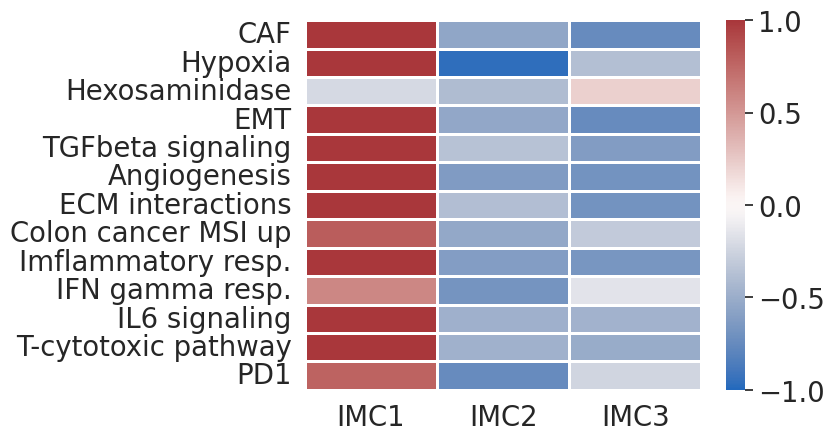

IMC1      IMC2      IMC3    avgIMC1    avgIMC2  \
CAF                  1.085898 -0.366465 -0.499355  10.519271   9.323284   
Hypoxia              0.754353 -0.643045 -0.252718  10.194115   9.863347   
Hexosaminidase      -0.144026 -0.267437  0.142847   9.668397   9.635615   
EMT                  1.079198 -0.362845 -0.496603  10.365882   9.639398   
TGFbeta signaling    0.872891 -0.244698 -0.413495  10.890658  10.698614   
Angiogenesis         1.037181 -0.420197 -0.459941  10.357002   9.657002   
ECM interactions     0.966901 -0.257749 -0.461254  10.980113  10.363288   
Colon cancer MSI up  0.538742 -0.355661 -0.205598  10.439196   9.941251   
Imflammatory resp.   1.003255 -0.408239 -0.444463   9.885365   9.195614   
IFN gamma resp.      0.392530 -0.455228 -0.102262  11.074754  10.817250   
IL6 signaling        0.714476 -0.319170 -0.309633  10.711585  10.506300   
T-cytotoxic pathway  0.768641 -0.316723 -0.339566   9.156444   8.174663   
PD1                  0.517962 -0.498935 -0.159609   9.891869   9.653993   

                       avgIMC3   stdIMC1   stdIMC2   stdIMC3    stdALL  
CAF                   9.213852  0.602051  0.576093  0.555636  0.823477  
Hypoxia               9.955738  0.220376  0.172221  0.199995  0.236703  
Hexosaminidase        9.744602  0.271162  0.252568  0.259120  0.265638  
EMT                   9.572013  0.379924  0.332956  0.341965  0.503788  
TGFbeta signaling    10.669608  0.153337  0.129588  0.134945  0.171838  
Angiogenesis          9.637912  0.339992  0.356302  0.353689  0.480315  
ECM interactions     10.260788  0.423825  0.377047  0.366487  0.503674  
Colon cancer MSI up  10.024797  0.490857  0.544206  0.528529  0.556734  
Imflammatory resp.    9.177913  0.360468  0.367850  0.368558  0.488667  
IFN gamma resp.      10.924462  0.316182  0.290447  0.276953  0.303747  
IL6 signaling        10.508194  0.171829  0.187430  0.173778  0.198603  
T-cytotoxic pathway   8.153999  0.694762  0.835058  0.808210  0.904564  
PD1                   9.733369  0.230420  0.216085  0.211895  0.233924

In [83]:
resTCGA2=firmaIMC.Plot_HeatMap_PATHS_IMC_stat(df_allinfo_TCGA,dict_gens_Coincidents_estroma_TCGA,nom_figure='Fig4A_TCGA',factorAug=1.5,typeFig='')
resTCGA2

In [84]:
pd_ANOVA_PATHWAY_Fig4A_TCGA=firmaIMC.Tukey_HeadMap_PATHS_IMC(df_allinfo_TCGA,dict_gens_Coincidents_estroma_TCGA)
print('ANOVA_PATHWAYS')
taula=firmaIMC.print_ANOVA2(pd_ANOVA_PATHWAY_Fig4A_TCGA)
taula.to_excel("Anova_Fig4A_TCGA.xlsx",sheet_name='Fig4A_TCGA') 
taula

Nom path: CAF, num. gens:7
F_onewayResult(statistic=np.float64(249.4939766801244), pvalue=np.float64(1.774192377490149e-74))
   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1    group2  meandiff p-adj   lower   upper  reject
----------------------------------------------------------
Cluster_1 Cluster_2   -1.196    0.0 -1.3992 -0.9928   True
Cluster_1 Cluster_3  -1.3054    0.0 -1.4457 -1.1651   True
Cluster_2 Cluster_3  -0.1094 0.3593 -0.2977  0.0788  False
----------------------------------------------------------
Nom path: Hypoxia, num. gens:199
F_onewayResult(statistic=np.float64(84.26084417532905), pvalue=np.float64(5.562107800275346e-32))
   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1    group2  meandiff p-adj   lower   upper  reject
----------------------------------------------------------
Cluster_1 Cluster_2  -0.3308    0.0 -0.4028 -0.2588   True
Cluster_1 Cluster_3  -0.2384    0.0 -0.2881 -0.1887   True
Cluster_2 Cluster_3   0.0924 0.0035 

/home/smadurga/RecercaGit/IMMETCOLS_GSE1_GSE2_TCGA/FIGURES_IMMETCOLS_Bioinformatics/firmaIMC_v3.py:416: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pd_Tabla['IMC1']=[pd_ANOVA.loc[0][i] for i in range(num_gens)]
/home/smadurga/RecercaGit/IMMETCOLS_GSE1_GSE2_TCGA/FIGURES_IMMETCOLS_Bioinformatics/firmaIMC_v3.py:417: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pd_Tabla['IMC2']=[pd_ANOVA.loc[1][i] for i in range(num_gens)]
/home/smadurga/RecercaGit/IMMETCOLS_GSE1_GSE2_TCGA/FIGURES_IMMETCOLS_Bioinformatics/firmaIMC_v3.py:418: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future versio

GeneName      IMC1      IMC2      IMC3  F_oneway      P_oneway  \
0                   CAF  1.085898 -0.366465 -0.499355   249.494  1.774192e-74   
1               Hypoxia  0.754353 -0.643045 -0.252718    84.261  5.562108e-32   
2        Hexosaminidase -0.144026 -0.267437  0.142847     6.606  1.482512e-03   
3                   EMT  1.079198 -0.362845 -0.496603   243.282  3.657894e-73   
4     TGFbeta signaling  0.872891 -0.244698 -0.413495   118.040  3.119074e-42   
5          Angiogenesis  1.037181 -0.420197 -0.459941   206.820  4.358379e-65   
6      ECM interactions  0.966901 -0.257749 -0.461254   164.042  1.030820e-54   
7   Colon cancer MSI up  0.538742 -0.355661 -0.205598    34.657  9.205461e-15   
8    Imflammatory resp.  1.003255 -0.408239 -0.444463   183.084  1.837450e-59   
9       IFN gamma resp.  0.392530 -0.455228 -0.102262    20.569  2.740892e-09   
10        IL6 signaling  0.714476 -0.319170 -0.309633    66.990  2.602683e-26   
11  T-cytotoxic pathway  0.768641 -0.316723 -0.339566    81.209  5.301800e-31   
12                  PD1  0.517962 -0.498935 -0.159609    34.829  7.926597e-15   

    p-Tukey12  p-Tukey13  p-Tukey23  compara1  compara2  compara3  
0       0.000      0.000      0.359         1         0         0  
1       0.000      0.000      0.003         1         1         1  
2       0.685      0.015      0.009         0         0         1  
3       0.000      0.000      0.359         1         0         0  
4       0.000      0.000      0.301         1         0         0  
5       0.000      0.000      0.919         1         0         0  
6       0.000      0.000      0.140         1         0         0  
7       0.000      0.000      0.484         1         0         0  
8       0.000      0.000      0.936         1         0         0  
9       0.000      0.000      0.024         1         1         1  
10      0.000      0.000      0.997         1         0         0  
11      0.000      0.000      0.980         1         0         0  
12      0.000      0.000      0.026         1         1         1